 <center> <font size="6"> Group 26
    </font> </center>

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |     Pedro Cerejeira     |        20230442     | 
| 2    |     Diogo Reis   |       20230481       |
| 3    |     Marta Jesus      |       20230464        |

# 1.Imports & Reading the Data

In [1]:
# Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import MinMaxScaler
from math import ceil 
import os
from sklearn.impute import KNNImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from minisom import MiniSom
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Ignore DataConversion warnings for LinearRegression later on
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", module="sklearn.cluster._kmeans")




deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'neato_no_op', 'quiet'])
deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'neato_no_op', 'quiet'])
deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding'])
deprecate positional args: graphviz.backend.viewing.view(['quiet'])
deprecate positional args: graphviz.quoting.quote(['is_html_string', 'is_valid_id', 'dot_keywords', 'endswith_odd_number_of_backslashes', 'escape_unescaped_quotes'])
deprecate positional args: graphviz.quoting.a_list(['kwargs', 'attributes'])
deprecate positional args: graphviz.quoting.attr_list(['kwargs', 'attributes'])
deprecate positional args: graphviz.dot.Dot.clear(['keep_attrs'])
deprecate positional args: graphviz.dot.Dot.__iter__(['subgraph'])
deprecate positional args: graphviz.dot.Dot.node(['_attributes'])
deprecate positional args: graphviz.dot.Dot.edge(['_attributes'])
deprecate posi

In [2]:
# Read/Import dataset
data = pd.read_csv(r"C:\Users\carla\OneDrive\Ambiente de Trabalho\DM PROJECT\XYZ_sports_dataset.csv", delimiter = ';')

In [3]:
df = data.copy()
df.set_index("ID", inplace=True)
df

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   
...    ...     ...     ...             ...              ...             ...   
24937   14    Male     0.0      2016-09-08       2016-09-08      2019-07-01   
24938   39    Male     NaN      2015-09-17       2016-06-04      2016-01-01   
24939   20    Male  1810.0      2017-03-01       2017-03-31      2017-01-01   
24940   55    Male  4800.0      2018-03-01       2018-03-01      2019-07-01   
24941   32  Female  3700.0      2016-04-01       2019-06-11      2019-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10004       2018-06-30    2017-11-09                   210         373.20   
...                ...           ...                   ...            ...   
24937       2019-12-31    2019-10-29                     2        1460.45   
24938       2016-06-30    2016-04-27                    38         343.85   
24939       2017-06-30    2017-03-29                     2          43.60   
24940       2019-12-31    2019-10-28                     3         788.60   
24941       2019-06-30    2019-05-28                    14         919.60   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10000  ...              0.0                  9.0                7   
10001  ...              0.0                 23.0                1   
10002  ...              0.0                  6.0                0   
10003  ...              0.0                 20.0                2   
10004  ...              NaN                 41.0                0   
...    ...              ...                  ...              ...   
24937  ...              0.0                112.0               96   
24938  ...              0.0                 57.0                0   
24939  ...              0.0                  6.0                0   
24940  ...              0.0                185.0              155   
24941  ...              0.0                169.0                1   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                       NaN                        6.28   
10001                       2.0                       17.42   
10002                       7.0                       30.03   
10003                       2.0                       17.72   
10004                       7.0                       60.97   
...                         ...                         ...   
24937                       4.0                       34.84   
24938                       7.0                       60.97   
24939                       7.0                       30.03   
24940                       3.0                       15.87   
24941                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10000                   2                 0            0.0   
10001                   1                 2            0.0   
10002      

## Metadata

- ID: Unique identifier of the record
- *Age*: Age of the user at October 31st 2019 if it is not a dropout, or age of the user at date specified in attribute EnrollmentFinish if it is a dropout
- *Gender*: Gender of the user (Male or Female)
- *Income*: Monthly salary of user
- *EnrollmentStart*: Date of first enrollment
- *EnrollmentFinish*: Finish date of last enrollment
- *LastPeriodStart*: Start date of the last activity or the last two months if less
- *LastPeriodFinish*: End date of last activity or last two months if less
- *DateLastVisit*: Date and time of the user’s last visit to the sport facility
- *DaysWithoutFrequency*: Number of days the user did not visit the facilty before being considered a dropout
- *LifetimeValue*: Total amount paid by the customer during the period in which he was enrolled (between EnrollmentStart and EnrollmentFinish)
- *UseByTime*: Indicates whether the user was enrolled in this form of use (True if he was, False otherwise)
- *AthleticsActivities*: Indicates if the user was ever enrolled in athletics activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *WaterActivities*: Indicates if the user was ever enrolled in water activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *FitnessActivities*: Indicates if the user was ever enrolled in fitness activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *DanceActivities*: Indicates if the user was ever enrolled in dance activites during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *TeamActivities*: Indicates if the user was ever enrolled in team activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *RacketActivities*: Indicates if the user was ever enrolled in racket activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *CombatActivities*: Indicates if the user was ever enrolled in combat sports activites during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *NatureActivities*: Indicates if the user was ever enrolled in nature activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *SpecialActivities*: Indicates if the user was enrolled in sports for disabled people during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *OtherActivities*: Indicates if the user was ever enrolled in other activities that does not fall into the other categories during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
- *NumberOfFrequencies*: Number of visits to the sports facility since the date indicated in EnrollmentStart and the date indicated in EnrollmentFinish
- *AttendedClasses*: Number of classes the user attended between EnrollmentStart and EnrollmentFinish
- *AllowedWeeklyVisitsBySLA*: Indicates the number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
- *AllowedNumberOfVisitsBySLA*: Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
- *RealNumberOfVisits*: Indicates the actual number of visits that the user made to the facilities in the last period his registration (between LastPeriodStart and LastPeriodFinish)
- *NumberOfRenewals*: Number of renewals during the registration period (between EnrollmentStart and EnrollmentFinish)
- *HasReferences*: This field contains the value True if NumberOfReferences> 0, or False otherwise
- *NumberOfReferences*: Number of people with which the user is related by family relationship or friendship
- *Dropout*: Represents the user’s enrollment status,

# 2.Data Exploration

In [4]:
df.duplicated().sum()

1

Dropping duplicated rows

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10000   60  Female  5500.0      2019-09-03       2019-10-31      2019-07-01   
10001   29  Female  2630.0      2014-08-12       2015-09-14      2015-01-01   
10002   23    Male  1980.0      2017-05-02       2017-06-01      2017-01-01   
10003    9    Male     0.0      2018-09-05       2019-02-12      2018-07-01   
10004   35    Male  4320.0      2016-04-20       2018-06-07      2018-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10000       2019-12-31    2019-10-30                     1          89.35   
10001       2015-12-31    2015-07-16                    60         479.20   
10002       2017-06-30    2017-05-25                     7          37.60   
10003       2019-06-30    2019-01-21                    22         155.40   
10004       2018-06-30    2017-11-09                   210         373.20   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10000  ...              0.0                  9.0                7   
10001  ...              0.0                 23.0                1   
10002  ...              0.0                  6.0                0   
10003  ...              0.0                 20.0                2   
10004  ...              NaN                 41.0                0   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10000                       NaN                        6.28   
10001                       2.0                       17.42   
10002                       7.0                       30.03   
10003                       2.0                       17.72   
10004                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10000                   2                 0            0.0   
10001                   1                 2            0.0   
10002                   6                 0            0.0   
10003                   3                 0            0.0   
10004                   0                 3            0.0   

       NumberOfReferences  Dropout  
ID                                  
10000                   0        0  
10001                   0        1  
10002                   0        1  
10003                   0        1  
10004                   0        1  

[5 rows x 30 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14941 entries, 10000 to 24941
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14941 non-null  int64  
 1   Gender                      14941 non-null  object 
 2   Income                      14446 non-null  float64
 3   EnrollmentStart             14941 non-null  object 
 4   EnrollmentFinish            14941 non-null  object 
 5   LastPeriodStart             14941 non-null  object 
 6   LastPeriodFinish            14941 non-null  object 
 7   DateLastVisit               14941 non-null  object 
 8   DaysWithoutFrequency        14941 non-null  int64  
 9   LifetimeValue               14941 non-null  float64
 10  UseByTime                   14941 non-null  int64  
 11  AthleticsActivities         14905 non-null  float64
 12  WaterActivities             14904 non-null  float64
 13  FitnessActivities           1490

In [8]:
df.describe(include = 'all').T

count unique         top  freq         mean  \
Age                         14941.0    NaN         NaN   NaN    26.016732   
Gender                        14941      2      Female  8930          NaN   
Income                      14446.0    NaN         NaN   NaN  2230.970511   
EnrollmentStart               14941   1490  2015-03-02    92          NaN   
EnrollmentFinish              14941   1300  2015-09-16  1684          NaN   
LastPeriodStart               14941     12  2019-07-01  3171          NaN   
LastPeriodFinish              14941     11  2019-12-31  3693          NaN   
DateLastVisit                 14941   1384  2019-10-31   475          NaN   
DaysWithoutFrequency        14941.0    NaN         NaN   NaN    81.227629   
LifetimeValue               14941.0    NaN         NaN   NaN   302.577212   
UseByTime                   14941.0    NaN         NaN   NaN     0.047119   
AthleticsActivities         14905.0    NaN         NaN   NaN      0.00738   
WaterActivities             14904.0    NaN         NaN   NaN     0.296162   
FitnessActivities           14906.0    NaN         NaN   NaN     0.576077   
DanceActivities             14905.0    NaN         NaN   NaN          0.0   
TeamActivities              14906.0    NaN         NaN   NaN     0.055548   
RacketActivities            14904.0    NaN         NaN   NaN     0.023417   
CombatActivities            14908.0    NaN         NaN   NaN     0.107929   
NatureActivities            14894.0    NaN         NaN   NaN          0.0   
SpecialActivities           14897.0    NaN         NaN   NaN     0.026515   
OtherActivities             14906.0    NaN         NaN   NaN     0.001878   
NumberOfFrequencies         14915.0    NaN         NaN   NaN    40.122293   
AttendedClasses             14941.0    NaN         NaN   NaN    10.152667   
AllowedWeeklyVisitsBySLA    14406.0    NaN         NaN   NaN     5.759614   
AllowedNumberOfVisitsBySLA  14941.0    NaN         NaN   NaN    41.636121   
RealNumberOfVisits          14941.0    NaN         NaN   NaN     5.320394   
NumberOfRenewals            14941.0    NaN         NaN   NaN     1.205274   
HasReferences               14929.0    NaN         NaN   NaN     0.019894   
NumberOfReferences          14941.0    NaN         NaN   NaN     0.022288   
Dropout                     14941.0    NaN         NaN   NaN      0.80095   

                                    std   min     25%     50%     75%      max  
Age                           14.156592   0.0    19.0    23.0    31.0     87.0  
Gender                              NaN   NaN     NaN     NaN     NaN      NaN  
Income                      1566.471988   0.0  1470.0  1990.0  2790.0  10890.0  
EnrollmentStart                     NaN   NaN     NaN     NaN     NaN      NaN  
EnrollmentFinish                    NaN   NaN     NaN     NaN     NaN      NaN  
LastPeriodStart                     NaN   NaN     NaN     NaN     NaN      NaN  
LastPeriodFinish                    NaN   NaN     NaN     NaN     NaN      NaN  
DateLastVisit                       NaN   NaN     NaN     NaN     NaN      NaN  
DaysWithoutFrequency         144.204026   0.0    13.0    41.0    84.0   1745.0  
LifetimeValue                364.326932   0.0    83.6   166.2   355.1   6727.8  
UseByTime                        0.2119   0.0     0.0     0.0     0.0      1.0  
AthleticsActivities            0.085593   0.0     0.0     0.0     0.0      1.0  
WaterActivities                0.456579   0.0     0.0     0.0     1.0      1.0  
FitnessActivities              0.494195   0.0     0.0     1.0     1.0      1.0  
DanceActivities                     0.0   0.0     0.0     0.0     0.0      0.0  
TeamActivities                 0.229055   0.0     0.0     0.0     0.0      1.0  
RacketActivities               0.151227   0.0     0.0     0.0     0.0      1.0  
CombatActivities               0.310301   0.0     0.0     0.0     0.0      1.0  
NatureActivities                    0.0   0.0     0.0     0.0     0.0      0.0  
SpecialActivities     

In [9]:
df.shape

(14941, 30)

In [10]:
activities_df = df[['Gender', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']]

grouped_activities = activities_df.groupby('Gender').sum()

print(grouped_activities)

        AthleticsActivities  WaterActivities  FitnessActivities  \
Gender                                                            
Female                 51.0           2630.0             5509.0   
Male                   59.0           1784.0             3078.0   

        TeamActivities  RacketActivities  CombatActivities  SpecialActivities  \
Gender                                                                          
Female           335.0             185.0             699.0              200.0   
Male             493.0             164.0             910.0              195.0   

        OtherActivities  
Gender                   
Female             28.0  
Male                0.0  


Water & Fitness are the most looked for activities by women (and more frequented by both genders)

In [11]:
grouped2 = df.groupby('Gender')['LifetimeValue'].mean()
print(grouped2)

Gender
Female    277.943272
Male      339.173633
Name: LifetimeValue, dtype: float64


Men have an higher LifetimeValue

In [12]:
lifetime_value = df.groupby('NumberOfFrequencies')['LifetimeValue'].sum().reset_index()
print(lifetime_value)

     NumberOfFrequencies  LifetimeValue
0                    1.0       59084.63
1                    2.0       67183.16
2                    3.0       59242.28
3                    4.0       55714.42
4                    5.0       60945.23
..                   ...            ...
410                888.0        1888.95
411                893.0        2457.80
412                954.0        3137.35
413                961.0        3145.85
414               1031.0        1734.60

[415 rows x 2 columns]


Less visits = More money spent?

In [13]:
activities_df1 = df[['Age','DanceActivities', 'NatureActivities']]
grouped_activities = activities_df1.groupby('Age').sum()
grouped_activities

DanceActivities  NatureActivities
Age                                   
0                0.0               0.0
1                0.0               0.0
2                0.0               0.0
3                0.0               0.0
4                0.0               0.0
..               ...               ...
83               0.0               0.0
84               0.0               0.0
85               0.0               0.0
86               0.0               0.0
87               0.0               0.0

[88 rows x 2 columns]

In [14]:
total_sum = grouped_activities.sum().sum()
print(total_sum)

0.0


**DanceActivities and NatureActivities are False all the time, we can remove them**

In [15]:
df = df.drop(['DanceActivities', 'NatureActivities'], axis=1)

## Checking & fixing Types

In [16]:
df_types = df.copy()

In [17]:
# Exploring Types
df_types.dtypes

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits              int64
NumberOfRenewals                int64
HasReferences                 float64
NumberOfRefe

Here we can conclude that some columns' types must be changed:

note: for the column **Income**, we are keeping the float type, even though it could be converted to integer


In [18]:
# Change the data types of the columns
columns_to_change = {
    'NumberOfFrequencies': 'Int64',
    'AllowedWeeklyVisitsBySLA': 'Int64',
    'HasReferences': 'Int64',
}
df_types = df_types.astype(columns_to_change)

In [19]:
# Confirm the new column types
df_types.dtypes

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies             Int64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA        Int64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits              int64
NumberOfRenewals                int64
HasReferences                   Int64
NumberOfRefe

## Visual Exploration

In [20]:
df_visualization = df_types.copy()

In [21]:
# Define metric and non-metric features, to use later on
non_metric_features = []

for col in df_visualization.columns:
    if df_visualization[col].dtype == 'object':
        non_metric_features.append(col)

print("Non-metric:", non_metric_features)

metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'AttendedClasses', 'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences']
print("Metric:", metric_features)


Non-metric: ['Gender', 'EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']
Metric: ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'AttendedClasses', 'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences']


Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', 

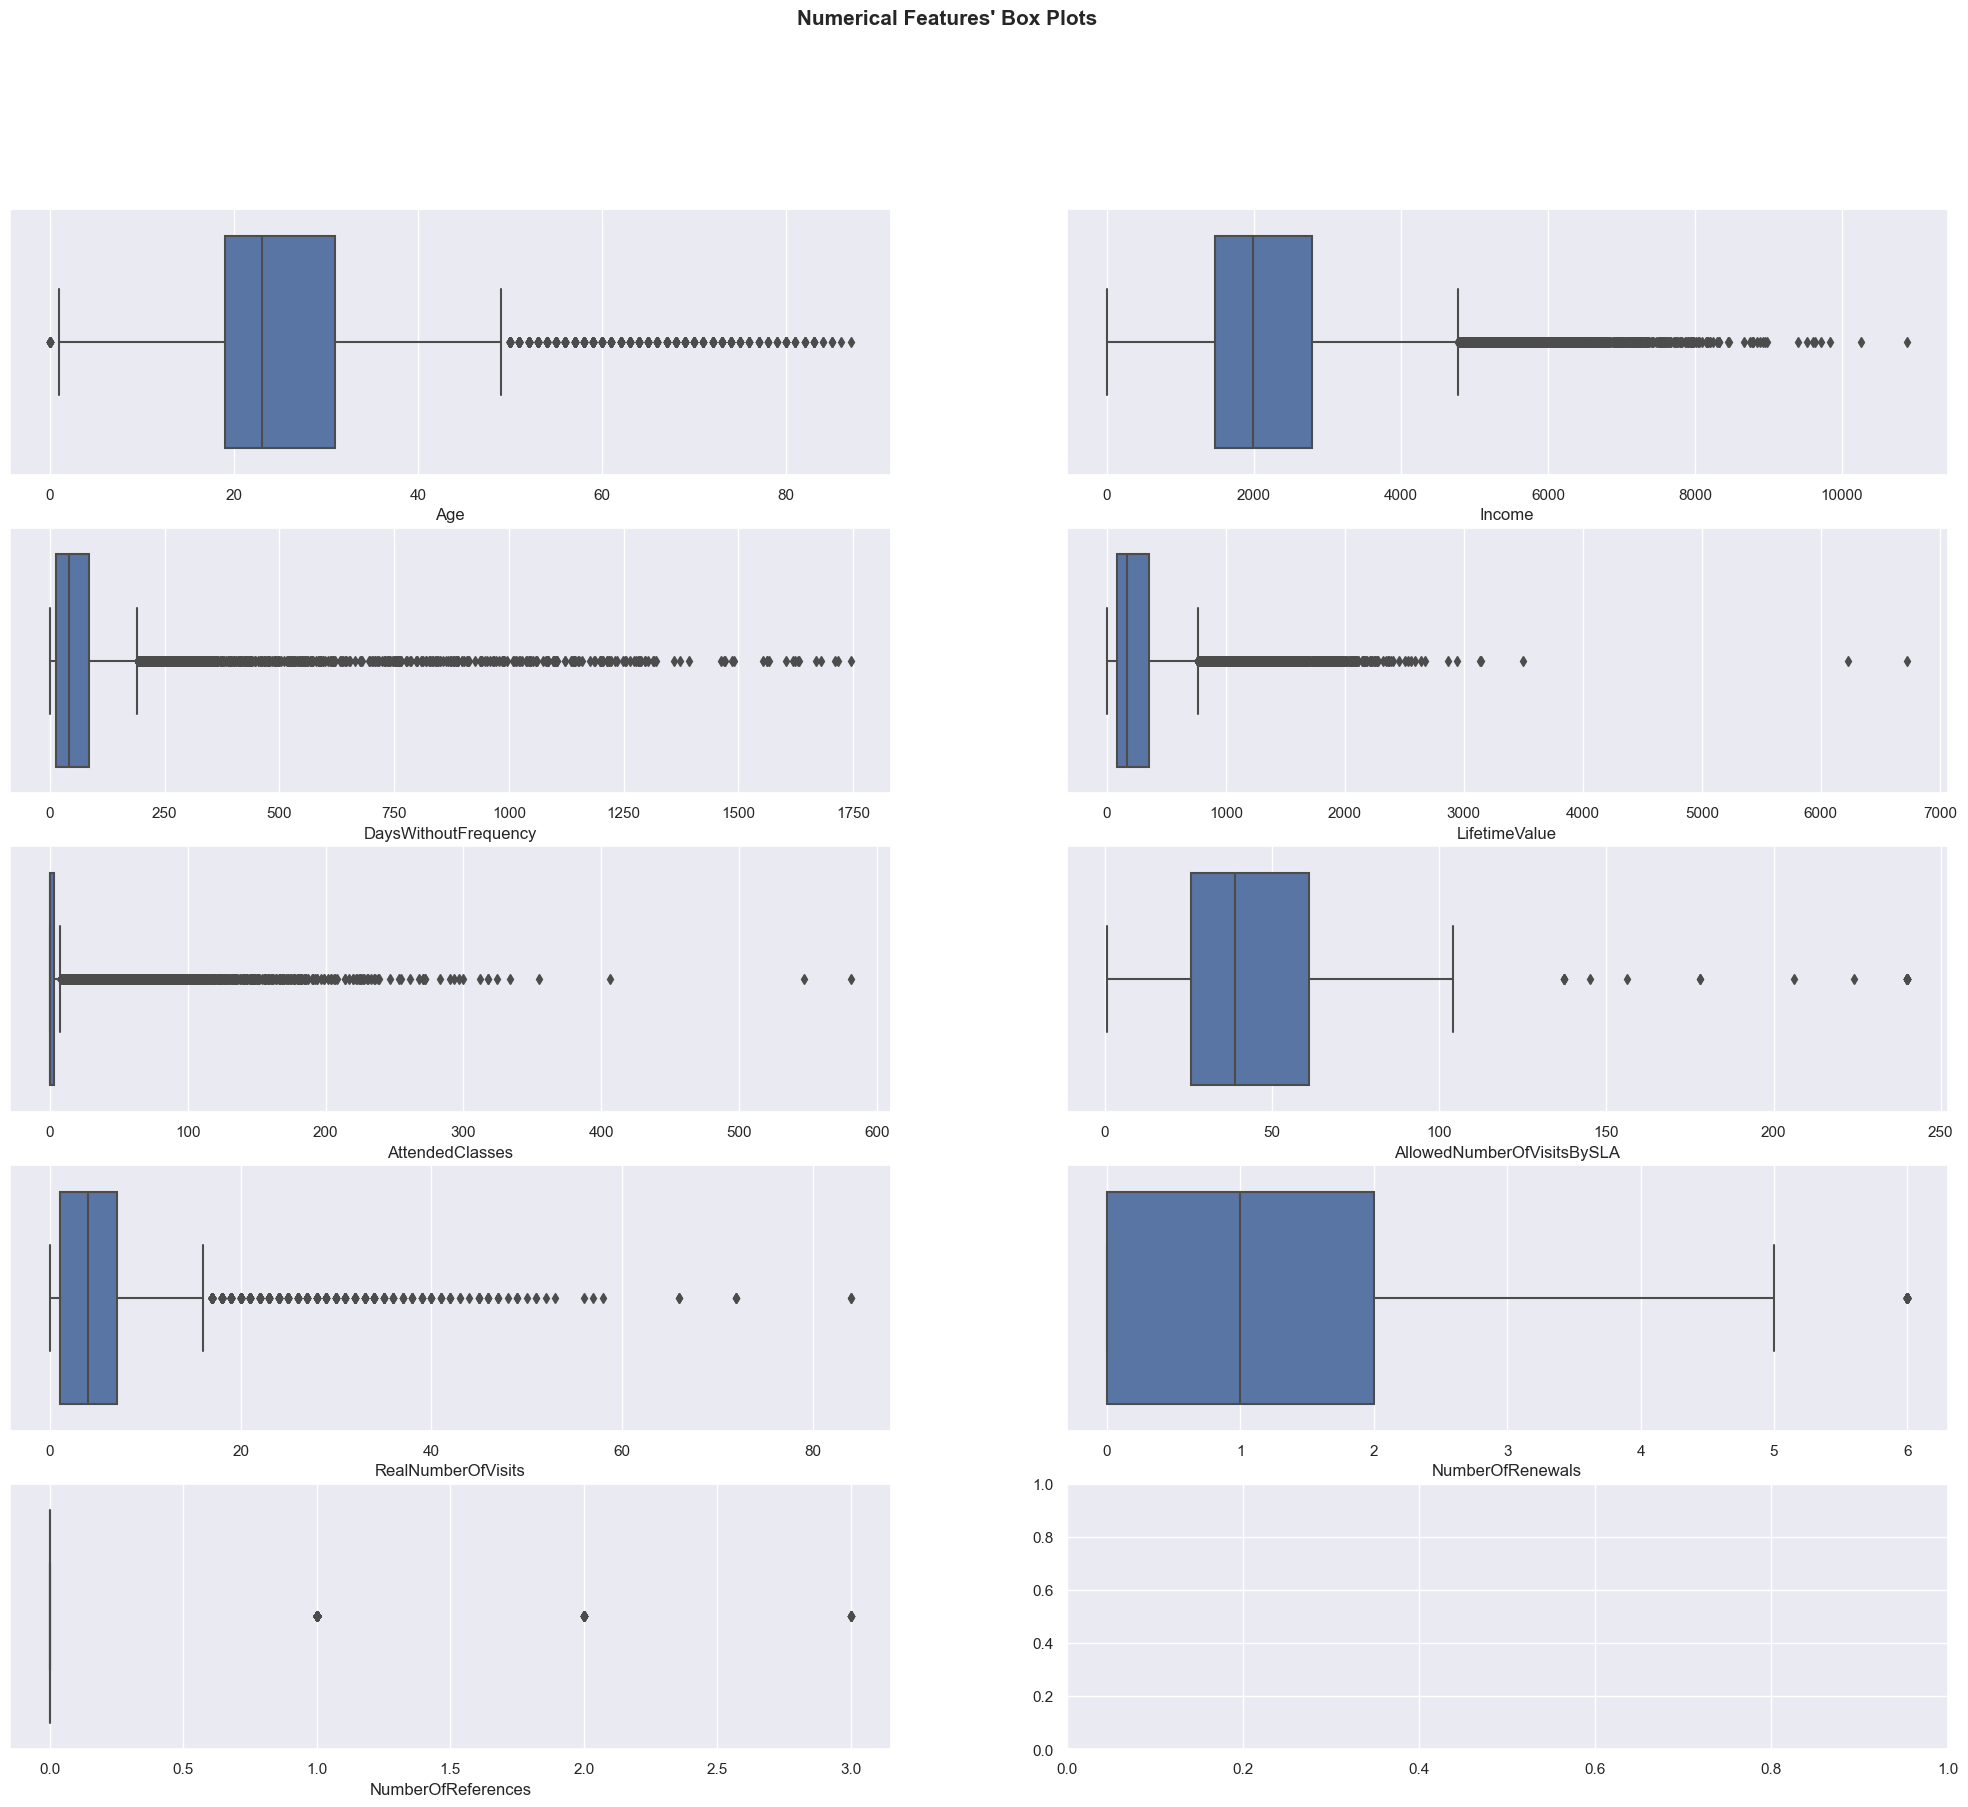

In [22]:
# Plot all variables in Boxplots to check the outliers of each variable

sns.set()

# Prepare the figures
fig, axes = plt.subplots(5, ceil(len(metric_features) / 5), figsize=(25, 20))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=df_visualization[feat], ax=ax)
    
# Layout

title = "Numerical Features' Box Plots"

plt.suptitle(title, size=15, weight='bold', family='Arial')
    
plt.show()

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999.
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', st

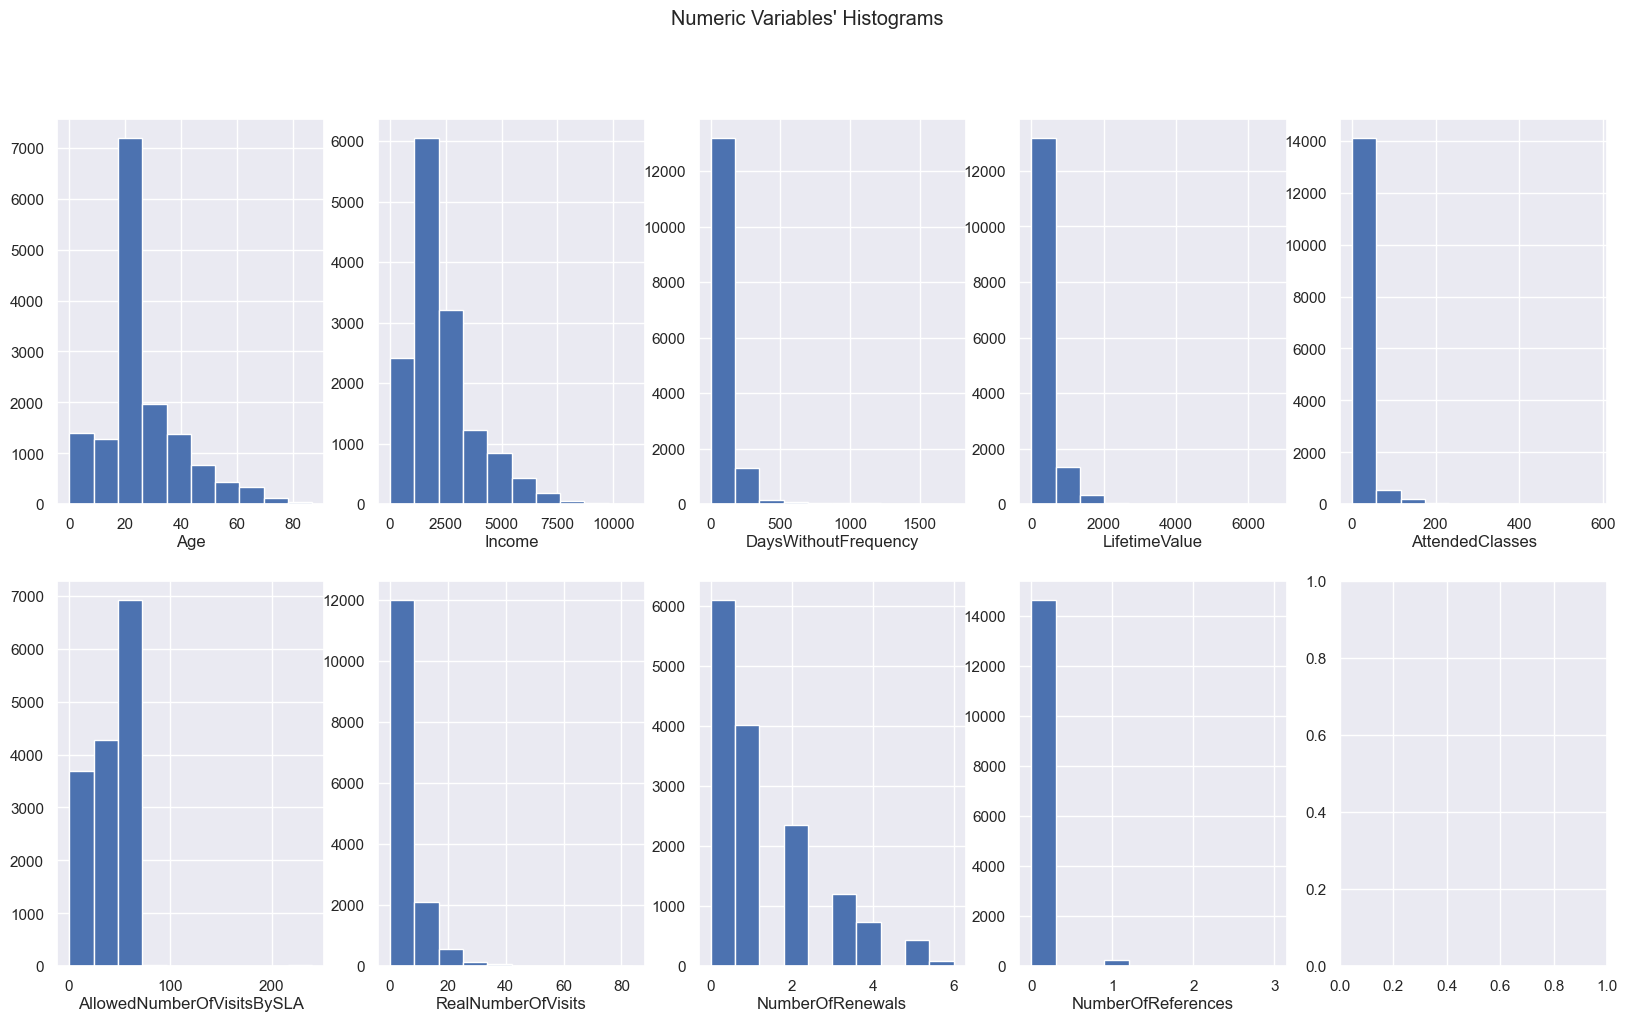

In [23]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df_visualization[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

c:\Users\carla\anaconda3\envs\DM2324\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', w

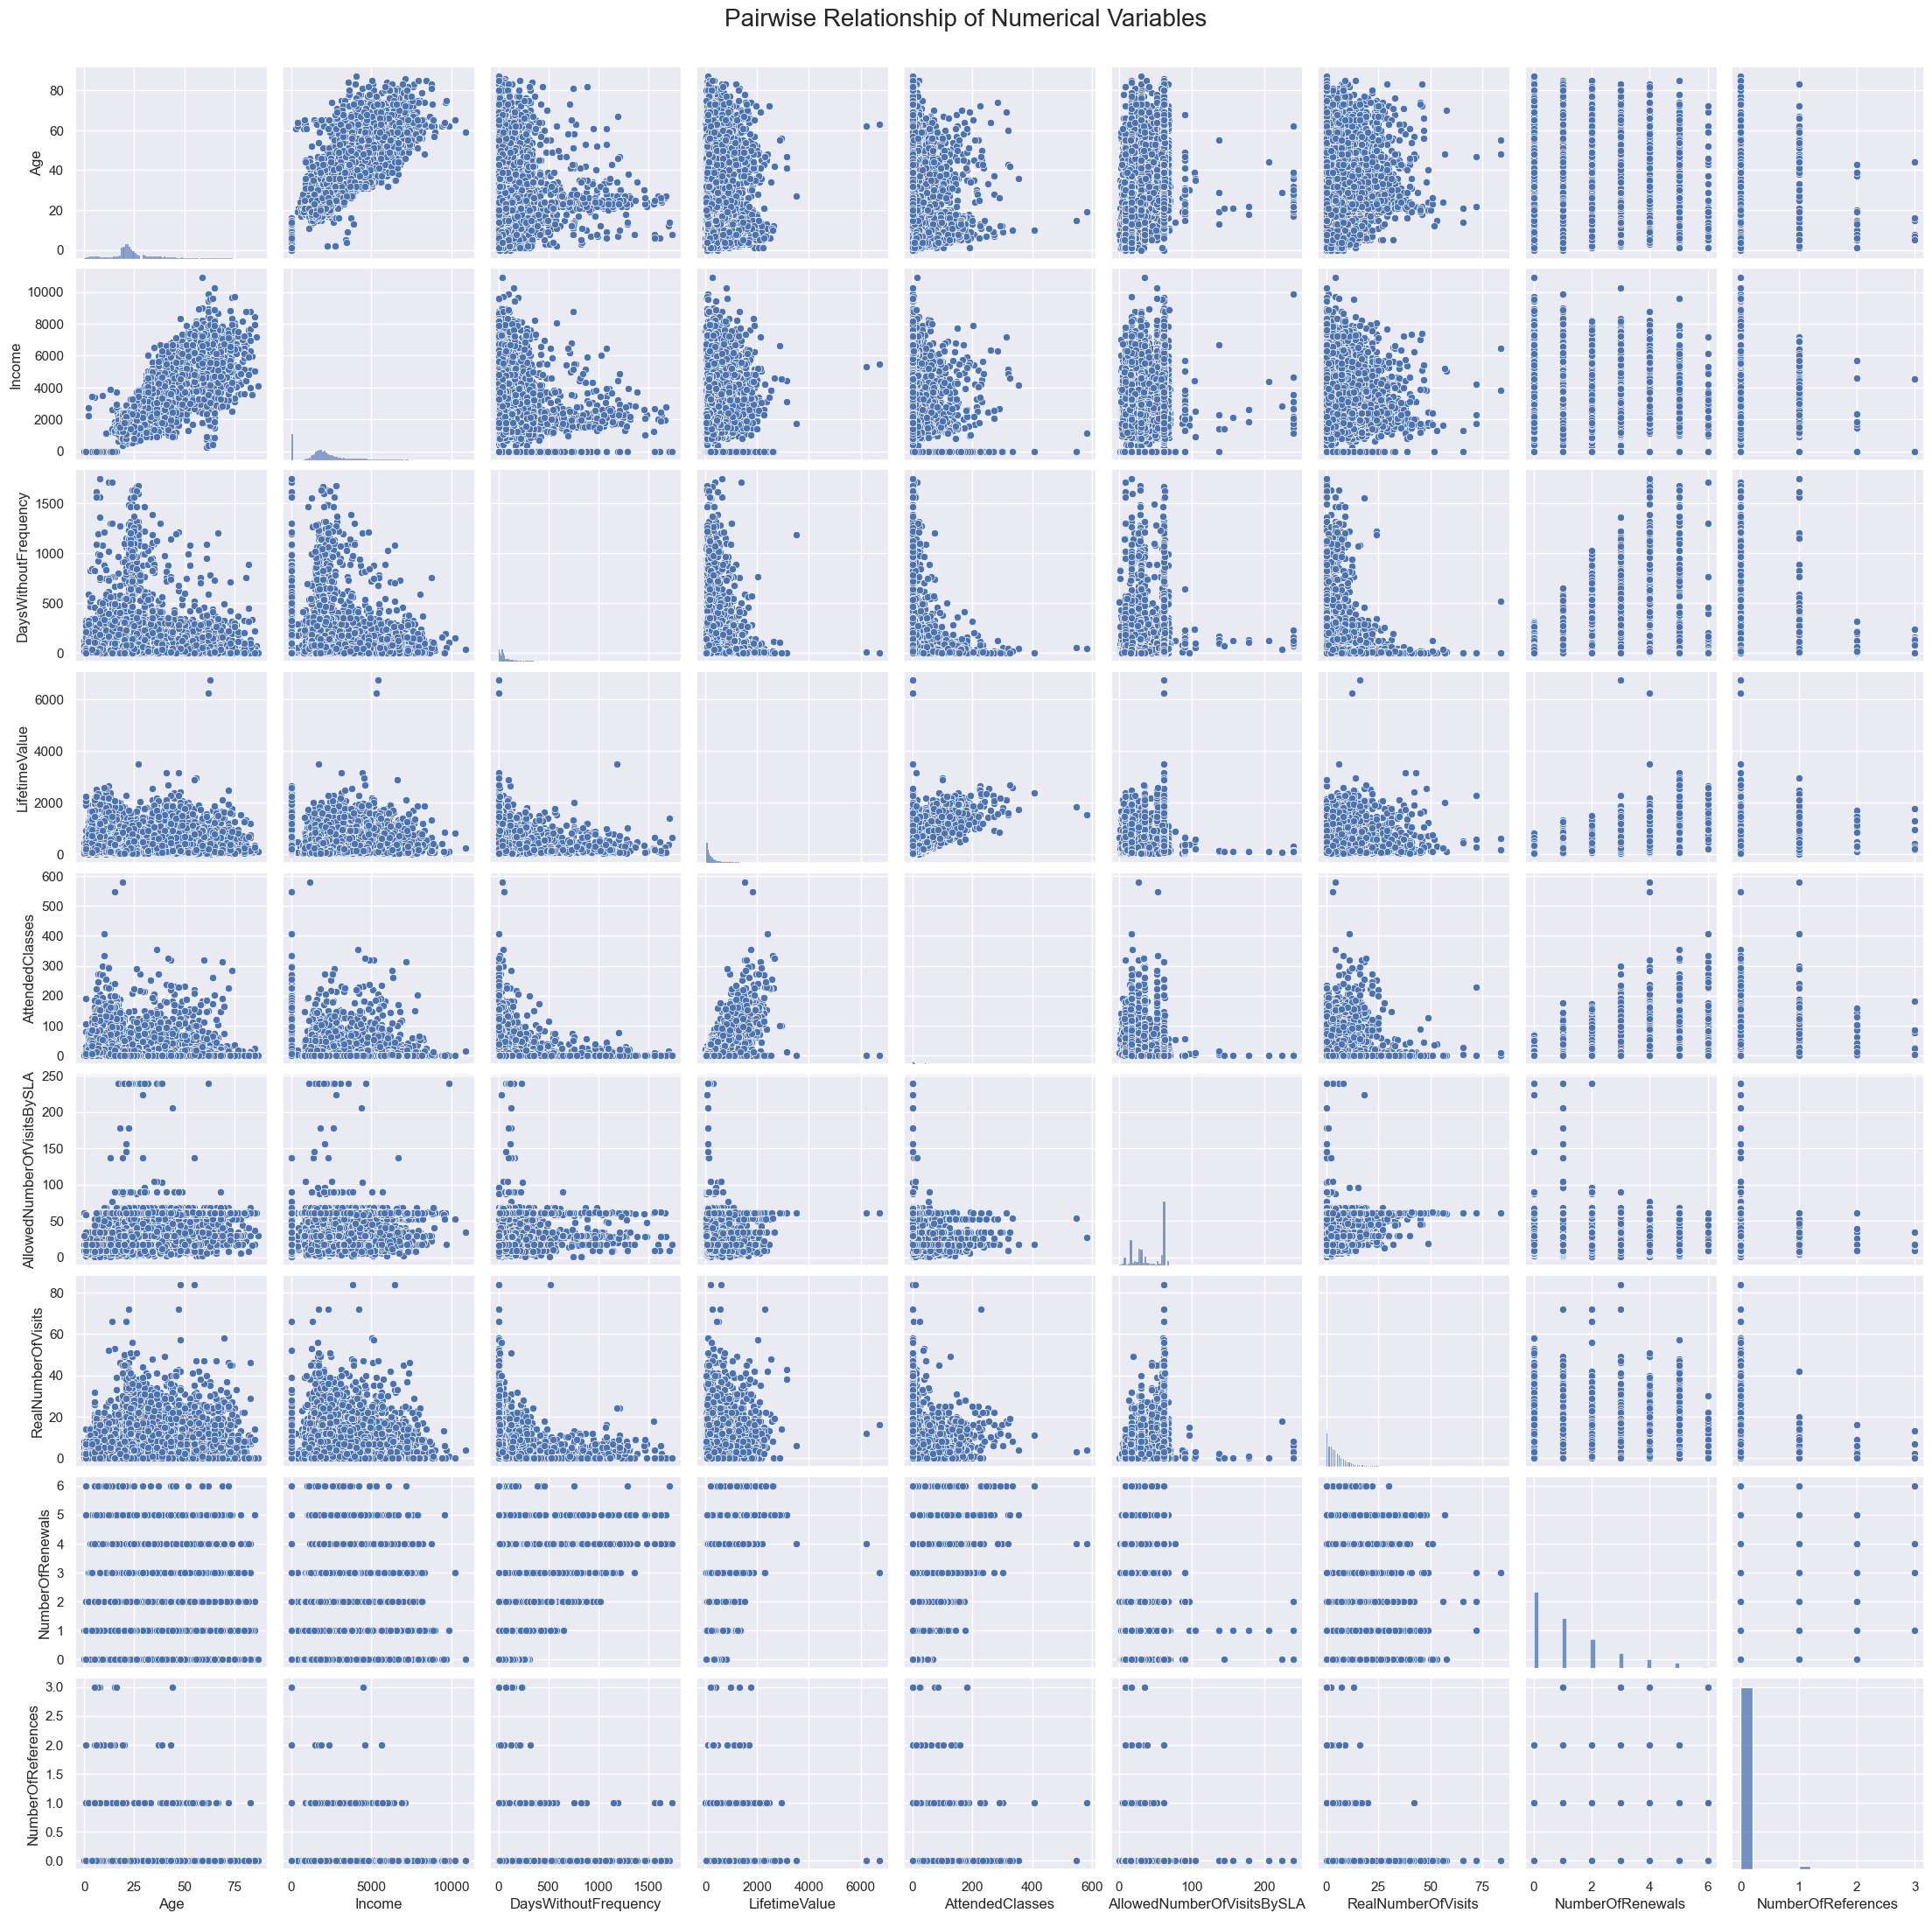

In [24]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df_visualization[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
    
plt.show()

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manu

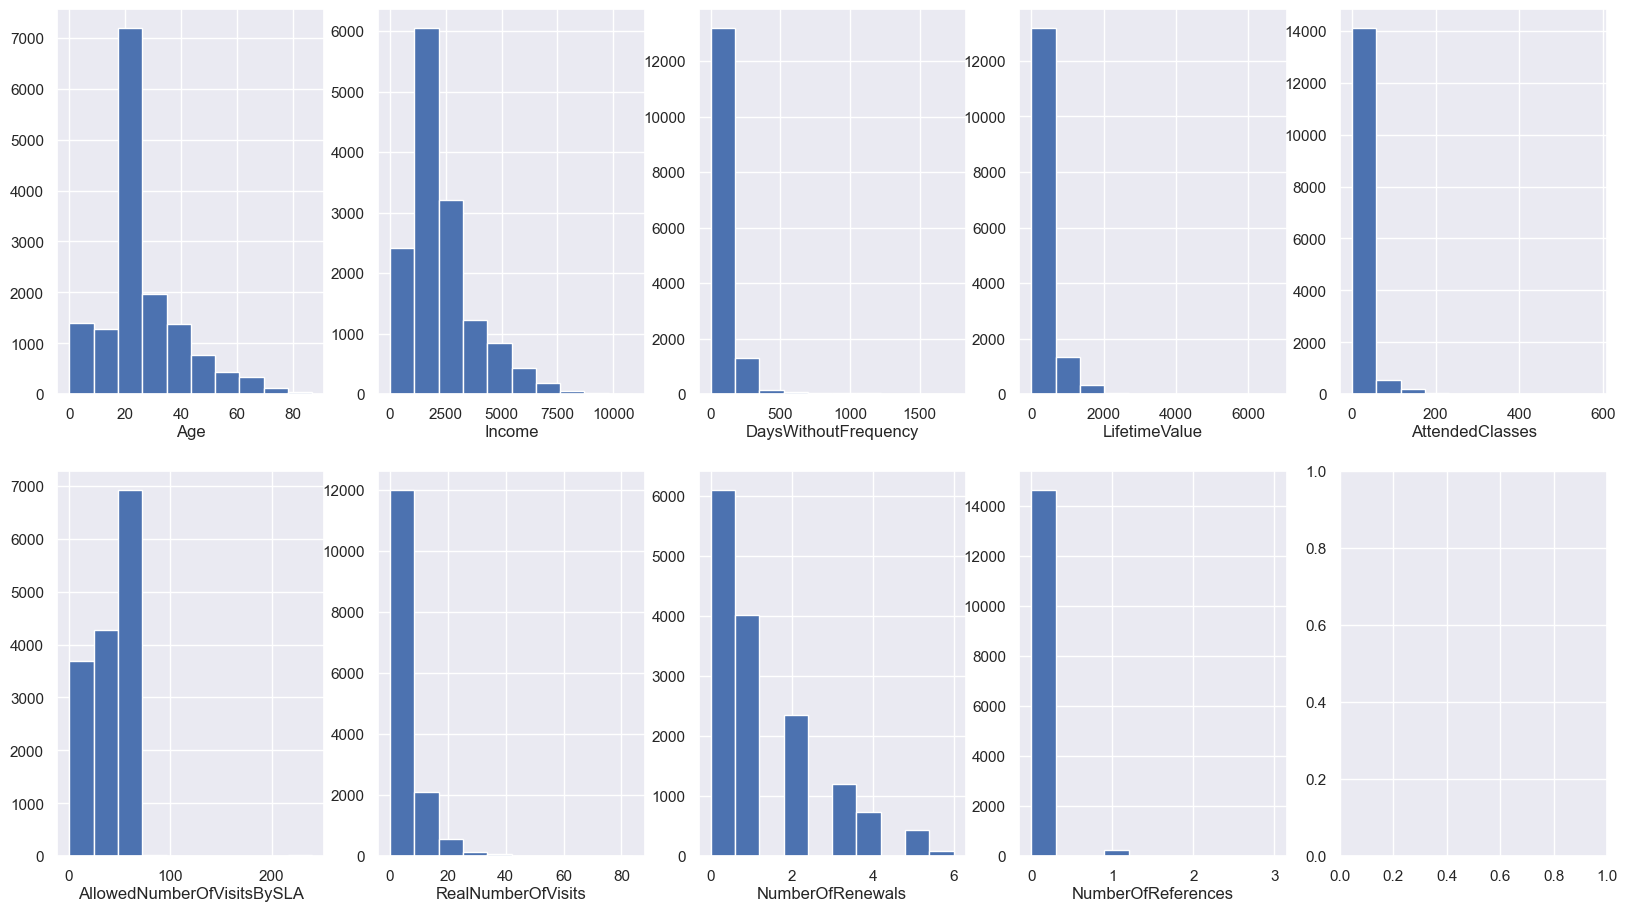

In [25]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df_visualization[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

**From this histograms, we can observe that:**
1. Most of our clients are <=25 years old
2. <1 year without frequenting until DROPOUT
3. Actual visits number <25
4. Few Renewals & References

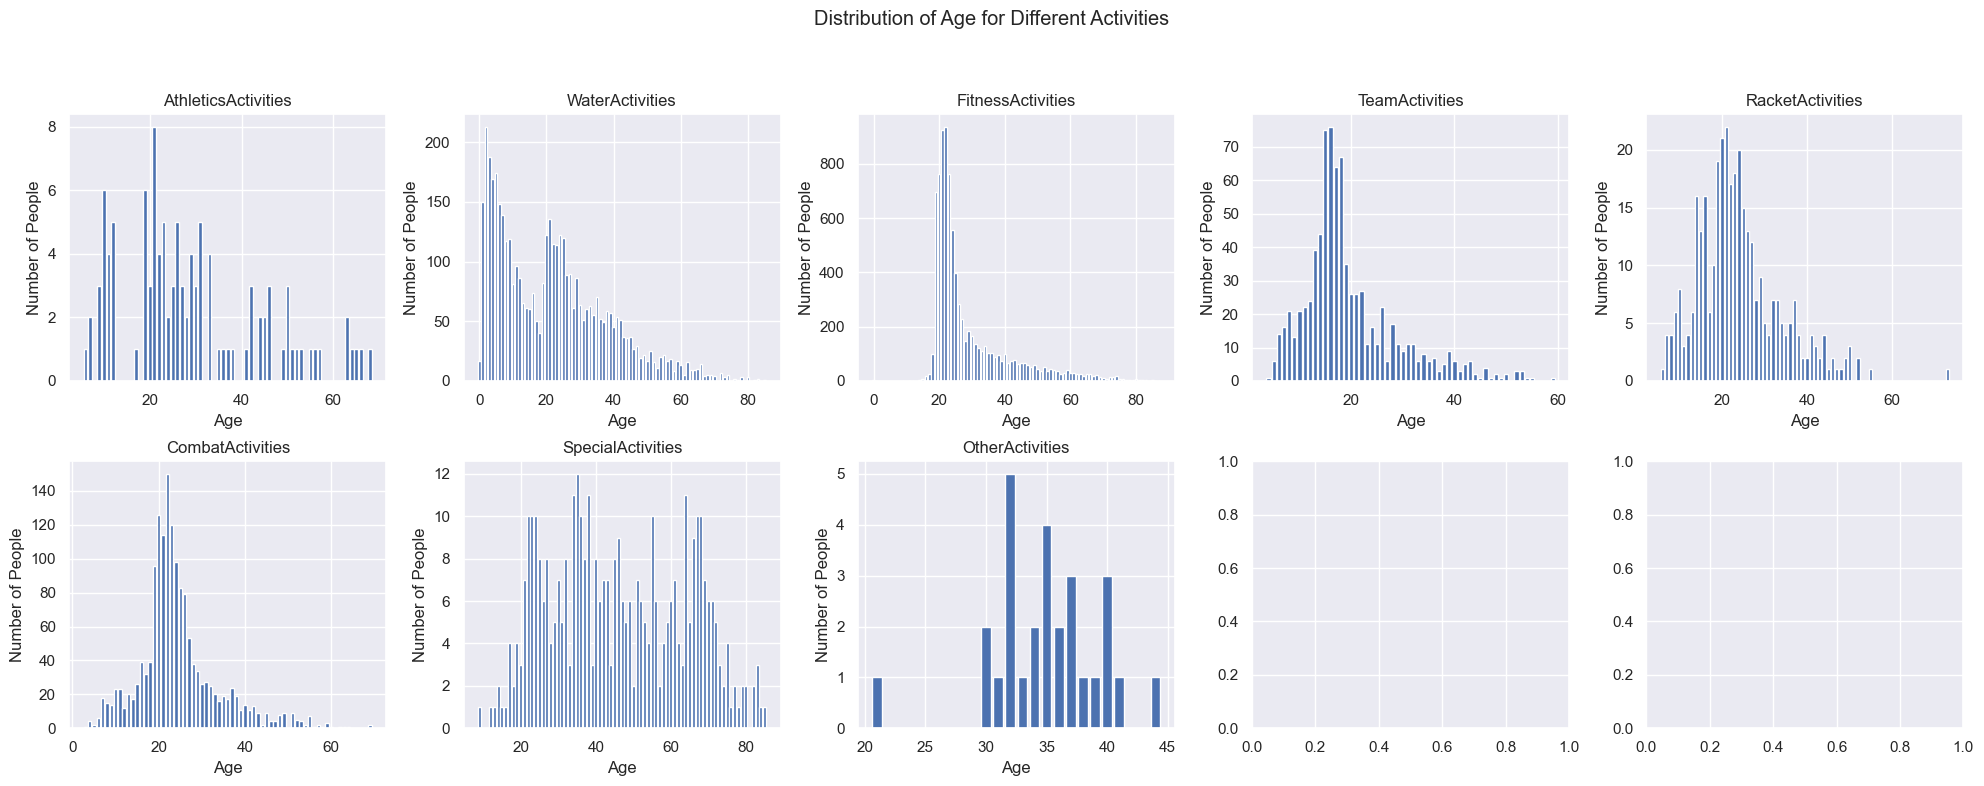

In [26]:
activities = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.suptitle('Distribution of Age for Different Activities')

for i, activity in enumerate(activities):
    row, col = i // 5, i % 5
    activity_df = df_visualization[df_visualization[activity] == True]
    age_counts = activity_df['Age'].value_counts().sort_index()
    
    ax = axes[row, col]
    ax.bar(age_counts.index, age_counts.values)
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of People')
    ax.set_title(f'{activity}')
    
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Most of the activities participants are: 

- OTHER ACTIVITIES mostly >30 years old
- WATER ACTIVITIES mostly kids
- TEAM ACTIVITIES more frequent between 10-20 years old
- SPECIAL ACTIVITIES have a bigger participant age range

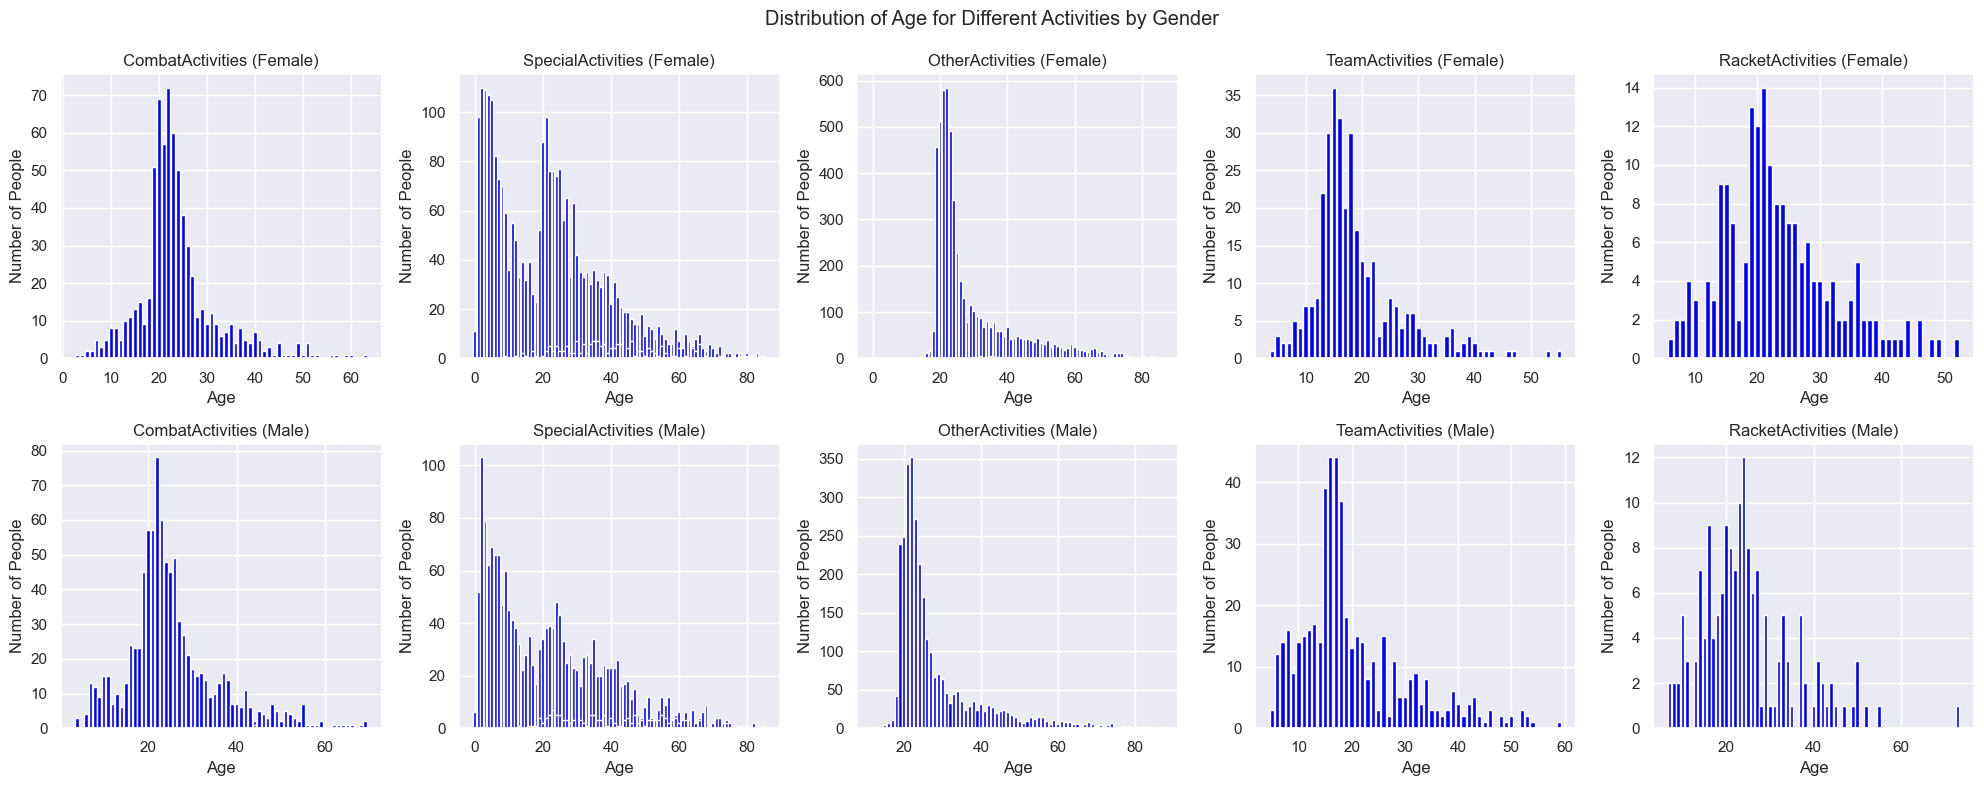

In [27]:
# Create a list of genders
genders = df_visualization['Gender'].unique()

activities = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']

num_columns = 5
num_rows = len(genders)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 8))
fig.suptitle('Distribution of Age for Different Activities by Gender')

for i, gender in enumerate(genders):
    for j, activity in enumerate(activities):
        row = i
        col = j % num_columns
        
        activity_df = df_visualization[(df_visualization[activity] == True) & (df_visualization['Gender'] == gender)]
        age_counts = activity_df['Age'].value_counts().sort_index()
        
        ax = axes[row, col]
        ax.bar(age_counts.index, age_counts.values, color='blue')
        ax.set_xlabel('Age')
        ax.set_ylabel('Number of People')
        ax.set_title(f'{activity} ({gender})')

# Remove any unused subplots
for i in range(len(genders)):
    for j in range(len(activities), num_columns):
        fig.delaxes(axes[i, j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()    

- OTHER ACTIVITIES mostly Woman > 20 years old
- WATER - many kids from both genders
- FITNESS - peak between 20-30 years old, both genders
- TEAM - men practice more and begin earlier
- RACKET - approximately same distribution, but more women
- COMBAT - approximately same distribution, but more men

# 3.Fill missing values

In [28]:
df_nan = df_types.copy()

In [29]:
# count of missing values
df_nan.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
TeamActivities                 35
RacketActivities               37
CombatActivities               33
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout                         0
dtype: int64

**a) Income nans**

Income and Age should have a high correlation, lets check.

In [30]:
# Finding the correlation between Income and Age
df_nan['Income'].corr(df_nan['Age'])

0.8753445839724253

Okay, 0.875 is a very high correlation, lets use Age in order to estimate the 'nans' in Income<br>

In order to best compute Income estimations, can we assume that individuals under 16 years old have no Income?

In [31]:
# Filter the DataFrame to select individuals under 16 with non-zero income
under_16_percentage_with_income = len(df_nan[(df_nan['Age'] < 16) & (df_nan['Income'] > 0)]) / len(df_nan[df_nan['Age'] < 16]) * 100
print(under_16_percentage_with_income)

0.8587376556462001


Roughly 0.86% of individuals under 16 have an income, this is residual, we will study them later as outliers. For now lets fill the nan values

For individuals under 16 years old, lets fill nan Incomes as 0. 

For the ones above 16 years old, we could use the mean for each age, although, **given the high correlation, a linear regression model can provide a more precise estimation for the missing income values based on age**. It can capture the linear trend between the two variables more effectively.

In [32]:
len(df_nan[(df_nan['Age'] < 16) & df_nan['Income'].isna()])

340

Lets fill all these rows with 0 Income

In [33]:
df_nan.loc[(df_nan['Age'] < 16) & df_nan['Income'].isna(), 'Income'] = 0

Lets now check the correlation once again

In [34]:
# Finding the new correlation between Income and Age

df_nan['Income'].corr(df_nan['Age'])

0.8797399192399378

Okay the correlation is better, ~ 0.88 now, lets see how many nans are still in Income, we only handled under 16 years old

In [35]:
# count of missing values
df_nan.isna().sum()

Age                             0
Gender                          0
Income                        155
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
TeamActivities                 35
RacketActivities               37
CombatActivities               33
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout                         0
dtype: int64

Now for the **individuals above 15 years old, who can receive income**, lets compute a LinearRegression with X = Age, Y = Income

We assuming that people older then 64 years old are retired so can not have linearly higher income values

In [36]:
# Filter the data for individuals with valid 'Age' and 'Income' values, LinearRegression requires no nans
regression_data = df_nan.dropna(subset=['Age', 'Income'])

# Filter further for individuals 16+ years old
regression_data = regression_data[regression_data['Age'] >= 16]
regression_data = regression_data[regression_data['Age'] <= 64]

X = regression_data[['Age']]
y = regression_data['Income']

model = LinearRegression()
model.fit(X, y)

# Create a range of ages from the minimum to the maximum age in the dataset (16+ years old)
ages_to_estimate = range(regression_data['Age'].min(), regression_data['Age'].max() + 1)

estimated_incomes = model.predict(np.array(ages_to_estimate).reshape(-1, 1))

income_estimates_df = pd.DataFrame({
    'Age': ages_to_estimate,
    'Estimated_Income': estimated_incomes
})

print(income_estimates_df)

    Age  Estimated_Income
0    16       1253.002069
1    17       1354.460016
2    18       1455.917963
3    19       1557.375910
4    20       1658.833857
5    21       1760.291804
6    22       1861.749751
7    23       1963.207698
8    24       2064.665645
9    25       2166.123592
10   26       2267.581539
11   27       2369.039486
12   28       2470.497433
13   29       2571.955380
14   30       2673.413327
15   31       2774.871274
16   32       2876.329221
17   33       2977.787168
18   34       3079.245115
19   35       3180.703062
20   36       3282.161009
21   37       3383.618956
22   38       3485.076903
23   39       3586.534850
24   40       3687.992797
25   41       3789.450743
26   42       3890.908690
27   43       3992.366637
28   44       4093.824584
29   45       4195.282531
30   46       4296.740478
31   47       4398.198425
32   48       4499.656372
33   49       4601.114319
34   50       4702.572266
35   51       4804.030213
36   52       4905.488160
37   53     

**Fill the values of individuals with 65 years or more with the average income of them, we assume that these individual are in the retirement age 
and don't have increasing income**

In [37]:
df_nan.loc[df_nan['Age'] >=65 , 'Income'] = df_nan[df_nan['Age'] >= 65]['Income'].mean()

Lets now fill the nan values with this estimatives

In [38]:
# Lets use our income estimates to fill the nan values. First we need this as a dict
age_to_income_map = income_estimates_df.set_index('Age')['Estimated_Income'].to_dict()

# Now, fill NaN values in the 'Income' column based on the 'Age' column
df_nan['Income'] = df_nan['Income'].fillna(df_nan['Age'].map(age_to_income_map))

**b) NumberOfFrequencies & Activities nans**

For these columns, since the number of nan values is low, lets use the mode to better fill null values

In [39]:
columns_to_check = ['NumberOfFrequencies', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences']
for col in columns_to_check:
    mode = df_nan[col].mode()[0]
    df_nan[col].fillna(mode, inplace=True)

In [40]:
df_nan.isna().sum()

Age                             0
Gender                          0
Income                          0
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities             0
WaterActivities                 0
FitnessActivities               0
TeamActivities                  0
RacketActivities                0
CombatActivities                0
SpecialActivities               0
OtherActivities                 0
NumberOfFrequencies             0
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                   0
NumberOfReferences              0
Dropout                         0
dtype: int64

**c) AllowedWeeklyVisitsBySLA nans**

Lets see the correlations of all features with the 'AllowedWeeklyVisitsBySLA'

In [41]:
correlation = df_nan.corr(numeric_only = True)
print(correlation['AllowedWeeklyVisitsBySLA'])

Age                           0.324997
Income                        0.343349
DaysWithoutFrequency         -0.010752
LifetimeValue                -0.313995
UseByTime                     0.111203
AthleticsActivities           0.014368
WaterActivities              -0.509184
FitnessActivities             0.590179
TeamActivities               -0.222520
RacketActivities             -0.246980
CombatActivities              0.139860
SpecialActivities            -0.006795
OtherActivities              -0.073839
NumberOfFrequencies           0.018914
AttendedClasses              -0.457609
AllowedWeeklyVisitsBySLA      1.000000
AllowedNumberOfVisitsBySLA    0.674755
RealNumberOfVisits            0.161626
NumberOfRenewals             -0.186784
HasReferences                -0.163235
NumberOfReferences           -0.166551
Dropout                       0.184511
Name: AllowedWeeklyVisitsBySLA, dtype: float64


Since 'AllowedWeeklyVisitsBySLA' doesn't have a high correlation with another feature

In [42]:
df_nan["AllowedWeeklyVisitsBySLA"].isna().sum() / len(df_nan) * 100

3.5807509537514224

Missing values only totalize 3.6% of all values, so median should be relevant (median is more resistant to outliers)

In [43]:
df_nan["AllowedWeeklyVisitsBySLA"].fillna(round(df_nan["AllowedWeeklyVisitsBySLA"].median(), 0), inplace=True)

In [44]:
df_nan.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
TeamActivities                0
RacketActivities              0
CombatActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

# 4.Checking Outliers

In [45]:
df_outliers = df_nan.copy()

**a) "Manually" filtering the dataset's outliers.** 

Lets go back to the Age/Income relationship outliers

Remember that "Roughly 0.86% of individuals under 16 have an income", lets try to find some outliers here

In [46]:
# Filter the DataFrame to select individuals under 18 years old with non-zero income
under_18_with_income = df_outliers[(df_outliers['Age'] <= 18) & (df_outliers['Income'] > 0)]

# From the found individuals, group the data by 'Age', count the entries. How many kids(total) have income per age
age_groups = under_18_with_income.groupby('Age').size()

# How many individuals exist for each age group (total)
total_counts = df_outliers[df_outliers['Age'] <= 18].groupby('Age').size()

# Calculate the percentage of individuals with income for each age group
percentage_by_age = (age_groups / total_counts * 100).fillna(0)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Percentage': percentage_by_age})
result_df.index.name = 'Age'

# Print or display the result
print(result_df)

     Percentage
Age            
0      0.000000
1      0.000000
2      0.938967
3      0.000000
4      0.574713
5      1.111111
6      0.000000
7      0.000000
8      0.000000
9      0.675676
10     0.000000
11     0.793651
12     0.000000
13     1.694915
14     1.492537
15     5.325444
16    21.134021
17   100.000000
18   100.000000


We found some outliers for sure, it is almost impossible for a 2 year old to have an Income.

We need to make a decision here. Lets assume that, if the percentage of individuals with Income in an age group is **less than 2%**, they are **outliers**. Lets drop them

In [47]:
filters1 = ~((df_outliers['Age'] < 15) & (df_outliers['Income'] > 0))
df_1 = df_outliers[filters1]

In [48]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 3) * 100, '%')

Percentage of data kept after removing outliers: 99.9 %


**Lets try to find some outliers with boxplots**

<Axes: xlabel='Age'>

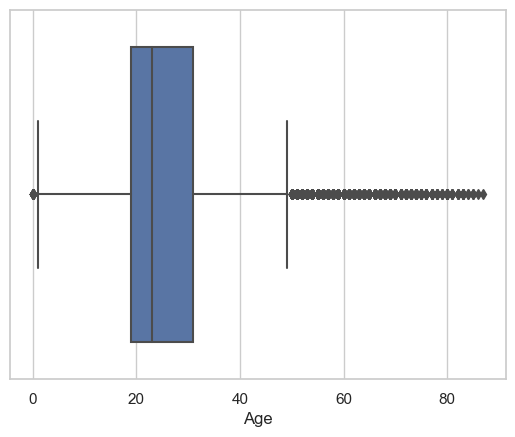

In [49]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1["Age"])

<Axes: xlabel='Income'>

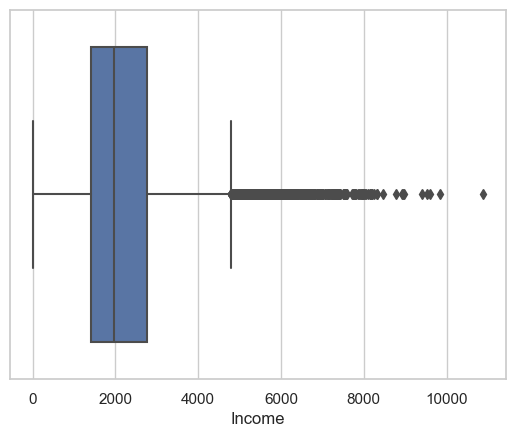

In [50]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1["Income"])

<Axes: xlabel='LifetimeValue'>

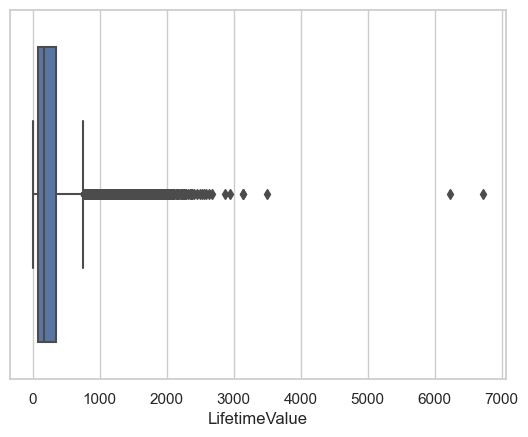

In [51]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1["LifetimeValue"])

<Axes: xlabel='NumberOfFrequencies'>

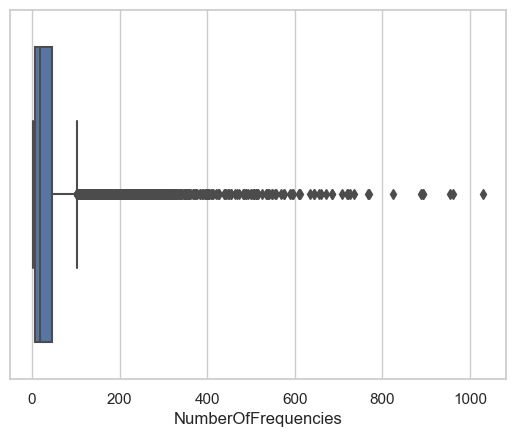

In [52]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1["NumberOfFrequencies"])

<Axes: xlabel='AttendedClasses'>

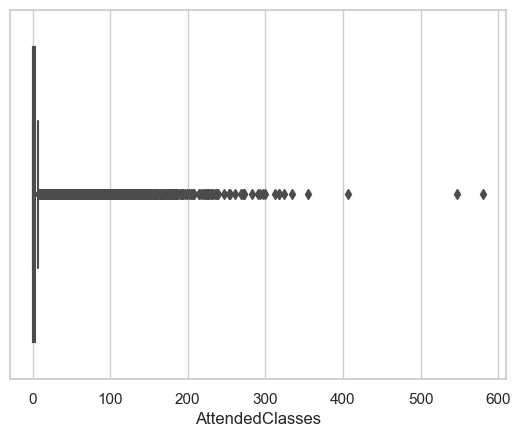

In [53]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1["AttendedClasses"])

<Axes: xlabel='AllowedNumberOfVisitsBySLA'>

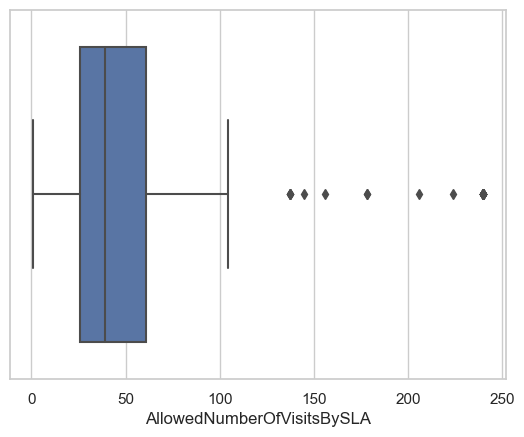

In [54]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1['AllowedNumberOfVisitsBySLA'])

<Axes: xlabel='RealNumberOfVisits'>

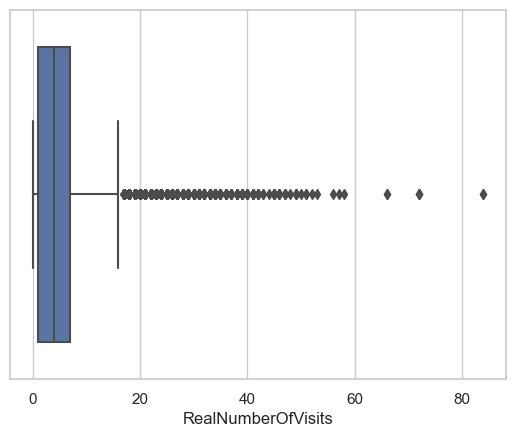

In [55]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1['RealNumberOfVisits'])

<Axes: xlabel='NumberOfRenewals'>

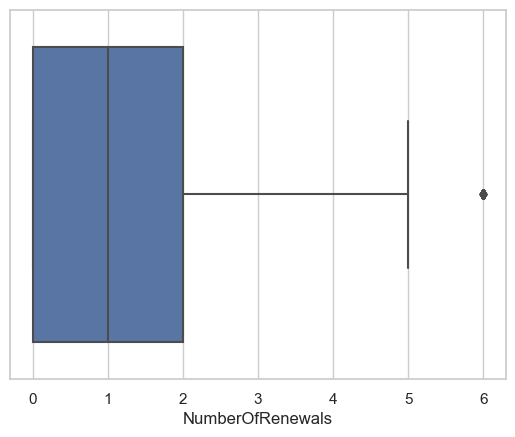

In [56]:
sns.set(style="whitegrid")
sns.boxplot(x = df_1['NumberOfRenewals'])

In [57]:
filters2 =  ((df_1['Age'] < 80) &
            (df_1['Income'] < 10000) & 
            (df_1['LifetimeValue'] < 5000) & 
            (df_1['NumberOfFrequencies'] < 770) & 
            (df_1['AttendedClasses'] < 400) & 
            (df_1['AllowedNumberOfVisitsBySLA'] < 130) &
            (df_1['RealNumberOfVisits'] < 60) &
            (df_1['NumberOfRenewals'] <= 5))
df_outliers_final = df_1[filters2]

In [58]:
print('Percentage of data kept after removing outliers:', np.round(df_outliers_final.shape[0] / df.shape[0], 5) * 100, '%')

Percentage of data kept after removing outliers: 98.782 %


**b) Outlier removal using only the IQR method**

IQR method is good for normally distributed variables, lets analyze our variables distribution

From the visual inspection, none of the distributions are perfectly normal, but Age is the closest. The rest are right-skewed or appear categorical. IQR wouldn't be very good, but let's try it out either way to prove this

In [59]:
q25 = df[metric_features].quantile(.25)
q75 = df[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters3 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters3.append(df_outliers[metric].between(llim, ulim, inclusive='both'))

filters3 = (np.all(filters3, 0))

# Use the filters to remove outliers from df_outliers
df_2 = df_outliers[filters3]

# Calculate the percentage of data kept after removing more outliers
print('Percentage of data kept after removing outliers with IQR method:', np.round(df_2.shape[0] / df_outliers.shape[0], 3) * 100, '%')

Percentage of data kept after removing outliers with IQR method: 57.599999999999994 %


This value is too big, as we thought.

Since we don't want to remove 1/3 of our dataset as outliers, lets try another approach

**c) Removing outliers (combining filters)**

In [60]:
# Use the filters to remove outliers from df_outliers
df_3 = df_outliers[(filters1 | filters2)]

# Calculate the percentage of data kept after removing outliers
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / df_outliers.shape[0], 3) * 100, '%')

Percentage of data kept after removing outliers: 99.9 %


In [61]:
# check descriptive statistics again
df_outliers_final.describe(include="all").T

count unique         top  freq         mean  \
Age                         14759.0    NaN         NaN   NaN    25.915712   
Gender                        14759      2      Female  8817          NaN   
Income                      14759.0    NaN         NaN   NaN  2177.785071   
EnrollmentStart               14759   1485  2015-03-02    90          NaN   
EnrollmentFinish              14759   1269  2015-09-16  1653          NaN   
LastPeriodStart               14759     12  2019-07-01  3080          NaN   
LastPeriodFinish              14759     11  2019-12-31  3591          NaN   
DateLastVisit                 14759   1384  2019-10-31   458          NaN   
DaysWithoutFrequency        14759.0    NaN         NaN   NaN    80.965309   
LifetimeValue               14759.0    NaN         NaN   NaN   293.947285   
UseByTime                   14759.0    NaN         NaN   NaN     0.047225   
AthleticsActivities         14759.0    NaN         NaN   NaN     0.007182   
WaterActivities             14759.0    NaN         NaN   NaN     0.292838   
FitnessActivities           14759.0    NaN         NaN   NaN     0.580324   
TeamActivities              14759.0    NaN         NaN   NaN     0.054407   
RacketActivities            14759.0    NaN         NaN   NaN     0.023511   
CombatActivities            14759.0    NaN         NaN   NaN     0.107392   
SpecialActivities           14759.0    NaN         NaN   NaN     0.024934   
OtherActivities             14759.0    NaN         NaN   NaN     0.001897   
NumberOfFrequencies         14759.0   <NA>        <NA>  <NA>    38.974727   
AttendedClasses             14759.0    NaN         NaN   NaN     9.620638   
AllowedWeeklyVisitsBySLA    14759.0   <NA>        <NA>  <NA>     5.813944   
AllowedNumberOfVisitsBySLA  14759.0    NaN         NaN   NaN    41.324518   
RealNumberOfVisits          14759.0    NaN         NaN   NaN     5.275493   
NumberOfRenewals            14759.0    NaN         NaN   NaN      1.17325   
HasReferences               14759.0   <NA>        <NA>  <NA>     0.018565   
NumberOfReferences          14759.0    NaN         NaN   NaN     0.020936   
Dropout                     14759.0    NaN         NaN   NaN     0.804391   

                                    std   min     25%     50%      75%     max  
Age                           13.864935   0.0    19.0    23.0     31.0    79.0  
Gender                              NaN   NaN     NaN     NaN      NaN     NaN  
Income                      1550.644657   0.0  1425.0  1970.0   2760.0  9600.0  
EnrollmentStart                     NaN   NaN     NaN     NaN      NaN     NaN  
EnrollmentFinish                    NaN   NaN     NaN     NaN      NaN     NaN  
LastPeriodStart                     NaN   NaN     NaN     NaN      NaN     NaN  
LastPeriodFinish                    NaN   NaN     NaN     NaN      NaN     NaN  
DateLastVisit                       NaN   NaN     NaN     NaN      NaN     NaN  
DaysWithoutFrequency         143.003013   0.0    13.0    41.0     83.0  1745.0  
LifetimeValue                341.393973   0.0    83.6   164.2  351.215  3498.4  
UseByTime                      0.212128   0.0     0.0     0.0      0.0     1.0  
AthleticsActivities            0.084445   0.0     0.0     0.0      0.0     1.0  
WaterActivities                 0.45508   0.0     0.0     0.0      1.0     1.0  
FitnessActivities              0.493523   0.0     0.0     1.0      1.0     1.0  
TeamActivities                 0.226828   0.0     0.0     0.0      0.0     1.0  
RacketActivities               0.151525   0.0     0.0     0.0      0.0     1.0  
CombatActivities               0.309622   0.0     0.0     0.0      0.0     1.0  
SpecialActivities              0.155929   0.0     0.0     0.0      0.0     1.0  
OtherActivities                0.043516   0.0     0.0     0.0      0.0     1.0  
NumberOfFrequencies           61.398811   1.0     7.0    18.0     45.0   769.0  
AttendedClasses               26.919432   0.0     0.0     0.0      3.0   355.0  
AllowedWeeklyV

# 5.Data Preparation

In [62]:
df_prep = df_outliers_final.copy()

**Gender**

The gender feature only has 2 values, Female and Male, so we converted the values to numbers

In [63]:
conditions = [
    (df_prep['Gender'].str.contains('Female')),
    (df_prep['Gender'].str.contains('Male')),
]

values = ['0', '1']

df_prep['Gender'] = np.select(conditions, values)
df_prep['Gender'] = df_prep['Gender'].astype(int)

**Convert dates to datetime**

In [64]:
# Convert EnrollmentStart and EnrollmentFinish to datetime in the original DataFrame
df_prep['EnrollmentStart'] = pd.to_datetime(df_prep['EnrollmentStart'])
df_prep['EnrollmentFinish'] = pd.to_datetime(df_prep['EnrollmentFinish'])
df_prep['LastPeriodStart'] = pd.to_datetime(df_prep['LastPeriodStart'])
df_prep['LastPeriodFinish'] = pd.to_datetime(df_prep['LastPeriodFinish'])
df_prep['DateLastVisit'] = pd.to_datetime(df_prep['DateLastVisit'])

**References**

Updating Incoherent columns:

In [65]:
mismatched_indices = df_prep[(df_prep['NumberOfReferences'] == 0) & (df_prep['HasReferences'] == 1)].index

# Update the 'HasReferences' column for these rows to False
df_prep.loc[mismatched_indices, 'HasReferences'] = 0

In [66]:
mismatched_indices1 = df_prep[(df_prep['NumberOfReferences'] > 0) & (df_prep['HasReferences'] == 0)].index
mismatched_rows1 = df_prep.loc[mismatched_indices1]
mismatched_rows1

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
11260   14       0     0.0      2014-09-30       2019-10-13      2019-07-01   
11427   42       1  4660.0      2014-10-06       2016-02-24      2015-01-01   
13032    9       1     0.0      2014-09-22       2019-10-13      2019-07-01   
14532    4       1     0.0      2014-09-20       2015-09-16      2015-01-01   
14582   17       0  1390.0      2014-10-06       2016-02-04      2015-07-01   
18306    2       0     0.0      2014-09-04       2015-09-14      2015-01-01   
18667    2       0     0.0      2015-09-11       2016-10-10      2016-07-01   
20374   12       1     0.0      2014-10-07       2015-09-16      2015-01-01   
20409   39       0  1870.0      2015-03-28       2018-01-01      2017-07-01   
20985   44       0  5710.0      2016-03-10       2019-09-10      2019-07-01   
22457   12       0     0.0      2015-09-22       2016-07-31      2016-01-01   
24827    1       1     0.0      2014-09-05       2015-09-14      2015-01-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
11260       2019-12-31    2019-07-26                    79        1924.50   
11427       2015-12-31    2015-06-26                   243         306.20   
13032       2019-12-31    2019-03-20                   207        1524.15   
14532       2015-06-30    2014-11-29                   291         209.72   
14582       2016-06-30    2015-12-16                    50         373.80   
18306       2015-12-31    2015-05-09                   128         447.70   
18667       2016-12-31    2016-06-04                   128         432.20   
20374       2015-12-31    2015-07-30                    48         366.20   
20409       2018-06-30    2017-11-09                    53         844.40   
20985       2019-12-31    2019-06-01                   101         775.85   
22457       2016-12-31    2016-06-18                    43         462.10   
24827       2015-06-30    2015-02-14                   212         295.70   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
11260  ...              0.0                  221              233   
11427  ...              0.0                    6                4   
13032  ...              0.0                   49               39   
14532  ...              0.0                    5                5   
14582  ...              0.0                   77                0   
18306  ...              0.0                   16               10   
18667  ...              0.0                   24               24   
20374  ...              0.0                   78               46   
20409  ...              0.0                   65               41   
20985  ...              0.0                   97               88   
22457  ...              0.0                   50               37   
24827  ...              0.0                   14               13   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
11260                         2                       17.42   
11427                         2                       17.42   
13032                         2                       17.42   
14532                         1                        8.43   
14582                         7                       62.02   
18306                         1                        8.71   
18667                         2                        7.14   
20374                         2                       17.42   
20409                         1                        8.57   
20985                         3                       26.58   
22457                         2                       17.42   
24827                         1    

In [67]:
mismatched_indices = df_prep[(df_prep['NumberOfReferences'] > 0) & (df_prep['HasReferences'] == 0)].index

# Update the 'HasReferences' column for these rows to False
df_prep.loc[mismatched_indices, 'HasReferences'] = 1

## Problem with enrollments & lastperiods

- *EnrollmentStart*: Date of first enrollment
- *EnrollmentFinish*: Finish date of last enrollment
- *LastPeriodStart*: Start date of the last activity or the last two months if less
- *LastPeriodFinish*: End date of last activity or last two months if less

In [68]:
#df_prep[df_prep['EnrollmentStart'] == df_prep['EnrollmentFinish']]

Check if there is anyone with a date of enrollement finished before the date of last period start

In [69]:
#df_prep[df_prep['EnrollmentFinish'] <= df_prep['LastPeriodStart']]

Here we see some incoherences, because if they finished the enrollemnet there is no way they can have a last period start date afterwards. It means that they enrolled again, so we need to fix this values

In [70]:
#condition = df_prep['LastPeriodFinish'] > df_prep['EnrollmentFinish']

# Updating EnrollmentFinish where the condition is met.
#df_prep.loc[condition, 'EnrollmentFinish'] = df_prep.loc[condition, 'LastPeriodFinish']

In [71]:
#df_prep[df_prep['EnrollmentFinish'] <= df_prep['LastPeriodStart']]

In [72]:
df_prep['AllowedWeeklyVisitsBySLA']

ID
10000    7
10001    2
10002    7
10003    2
10004    7
        ..
24937    4
24938    7
24939    7
24940    3
24941    7
Name: AllowedWeeklyVisitsBySLA, Length: 14759, dtype: Int64

In [73]:
df_prep['AllowedNumberOfVisitsBySLA'].value_counts()

AllowedNumberOfVisitsBySLA
60.97    4417
17.42    1461
30.03    1202
28.98    1137
62.02     642
         ... 
63.14       1
23.13       1
13.14       1
9.03        1
15.87       1
Name: count, Length: 263, dtype: int64

We notice that *AllowedNumberOfVisitsBySLA* is incoherent as the values are not integers. So, as this represent represent the values of *AllowedWeeklyVisitsBySLA* but semestral, we decided to multiply it by the number of weeks per semester. Since the year has 52 weeks, we will multiply by 26 to correct this.

- *AllowedWeeklyVisitsBySLA*: Indicates the number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
- *AllowedNumberOfVisitsBySLA*: Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
- *RealNumberOfVisits*: Indicates the actual number of visits that the user made to the facilities in the last period his registration (between LastPeriodStart and LastPeriodFinish)

In [74]:
df_prep['AllowedNumberOfVisitsBySLA'] = df_prep['AllowedWeeklyVisitsBySLA'] *26

In [75]:
df_prep[['AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA']].value_counts()

AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA
7                         182                           10945
2                         52                             2296
4                         104                             719
1                         26                              516
3                         78                              158
6                         156                             110
5                         130                              15
Name: count, dtype: int64

- Now, we need to check if there are people that went to the gym facilities more times than they are allowed to

In [76]:
df_prep[df_prep['RealNumberOfVisits'] > df_prep['AllowedNumberOfVisitsBySLA']]


Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, TeamActivities, RacketActivities, CombatActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout]
Index: []

[0 rows x 28 columns]

In [77]:
df_prep.groupby(['LifetimeValue', 'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits']).size().reset_index(name='counts')

LifetimeValue  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  counts
0               0.00                          52                   1       2
1               0.00                         182                   0       1
2               1.30                          52                   1       1
3               3.60                         182                   6       1
4               3.60                         182                  11       1
...              ...                         ...                 ...     ...
11215        2534.60                         182                  48       1
11216        2676.30                         104                  19       1
11217        2864.72                         182                   0       1
11218        2938.80                         182                  14       1
11219        3498.40                         182                   6       1

[11220 rows x 4 columns]

In [78]:
df_prep[df_prep['RealNumberOfVisits'] > df_prep['AllowedNumberOfVisitsBySLA']]

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, TeamActivities, RacketActivities, CombatActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout]
Index: []

[0 rows x 28 columns]

- We check here that exists 3 persons with 0 LifeTimeValue

In [79]:
df_prep[df_prep['LifetimeValue'] == 0]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
15746   42       1  4520.0      2017-11-29       2018-07-31      2018-01-01   
19016   28       0  2450.0      2015-05-11       2015-09-16      2015-01-01   
19639    6       1     0.0      2014-09-24       2015-09-16      2014-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
15746       2018-12-31    2018-04-18                   104            0.0   
19016       2015-06-30    2015-05-13                   126            0.0   
19639       2014-12-31    2014-10-09                   342            0.0   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
15746  ...              0.0                   30                0   
19016  ...              0.0                    1                1   
19639  ...              0.0                    1                0   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
15746                         7                         182   
19016                         2                          52   
19639                         2                          52   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
15746                   0                 0              1   
19016                   1                 1              0   
19639                   1                 1              0   

       NumberOfReferences  Dropout  
ID                                  
15746                   1        1  
19016                   0        1  
19639                   0        1  

[3 rows x 28 columns]

In [80]:
df_prep_filtered = df_prep[df_prep['LifetimeValue'] != 0]

# 6.Feature Engineering

In [81]:
df_feature = df_prep_filtered.copy()

In [82]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14756 entries, 10000 to 24941
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Age                         14756 non-null  int64         
 1   Gender                      14756 non-null  int32         
 2   Income                      14756 non-null  float64       
 3   EnrollmentStart             14756 non-null  datetime64[ns]
 4   EnrollmentFinish            14756 non-null  datetime64[ns]
 5   LastPeriodStart             14756 non-null  datetime64[ns]
 6   LastPeriodFinish            14756 non-null  datetime64[ns]
 7   DateLastVisit               14756 non-null  datetime64[ns]
 8   DaysWithoutFrequency        14756 non-null  int64         
 9   LifetimeValue               14756 non-null  float64       
 10  UseByTime                   14756 non-null  int64         
 11  AthleticsActivities         14756 non-null  float64    

**Create Time Enrolled** (as an integer representing days)

- Here we can check people with 0 days enrolled, although we are going to consider that these people can use the gym in the enrollement day. In order to adress it we are going to add 1 day to all time enrolleds (considering that any person who is enrolled more than 1 day can use the facilities in the day of enrollment finish)

In [83]:
# Calculate the time enrolled
df_feature['TimeEnrolled'] = df_feature['EnrollmentFinish'] - df_feature['EnrollmentStart']
df_feature['TimeEnrolled'] = df_feature['TimeEnrolled'] + pd.Timedelta(days=1)
df_feature['TimeEnrolled'] = df_feature['TimeEnrolled'].dt.days

print(df_feature['TimeEnrolled'])

ID
10000      59
10001     399
10002      31
10003     161
10004     779
         ... 
24937       1
24938     262
24939      31
24940       1
24941    1167
Name: TimeEnrolled, Length: 14756, dtype: int64


In [84]:
df_feature['TimeEnrolled_Months'] = (df_feature['TimeEnrolled'] / 30)
df_feature['TimeEnrolled_Months'] = np.rint(df_feature['TimeEnrolled_Months'])
df_feature['TimeEnrolled_Months'] = df_feature['TimeEnrolled_Months'].astype(int)

In [85]:
print(df_feature[['TimeEnrolled', 'TimeEnrolled_Months']].head())

       TimeEnrolled  TimeEnrolled_Months
ID                                      
10000            59                    2
10001           399                   13
10002            31                    1
10003           161                    5
10004           779                   26


In [86]:
df_feature[df_feature['TimeEnrolled_Months'] == 0]

Age  Gender       Income EnrollmentStart EnrollmentFinish  \
ID                                                                 
10025   13       0     0.000000      2015-09-09       2015-09-09   
10036   13       0     0.000000      2014-10-02       2014-10-02   
10038   38       0  1910.000000      2018-09-29       2018-09-29   
10049   56       1  6540.000000      2018-09-03       2018-09-03   
10051   12       0     0.000000      2018-08-17       2018-08-17   
...    ...     ...          ...             ...              ...   
24918   73       1  5526.521739      2014-12-10       2014-12-10   
24919    1       0     0.000000      2019-07-18       2019-07-18   
24926   24       0  3290.000000      2018-10-08       2018-10-08   
24937   14       1     0.000000      2016-09-08       2016-09-08   
24940   55       1  4800.000000      2018-03-01       2018-03-01   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
ID                                                                           
10025      2019-07-01       2019-12-31    2019-10-26                     5   
10036      2019-07-01       2019-12-31    2019-10-22                     9   
10038      2019-07-01       2019-12-31    2019-10-30                     1   
10049      2019-07-01       2019-12-31    2019-10-29                     2   
10051      2019-07-01       2019-12-31    2019-10-28                     3   
...               ...              ...           ...                   ...   
24918      2019-07-01       2019-12-31    2019-10-31                     0   
24919      2019-07-01       2019-12-31    2019-10-31                     0   
24926      2019-01-01       2019-12-31    2019-10-29                     2   
24937      2019-07-01       2019-12-31    2019-10-29                     2   
24940      2019-07-01       2019-12-31    2019-10-28                     3   

       LifetimeValue  ...  AttendedClasses  AllowedWeeklyVisitsBySLA  \
ID                    ...                                              
10025         596.30  ...               18                         2   
10036        2209.97  ...              166                         2   
10038         554.60  ...              125                         3   
10049         540.10  ...                0                         7   
10051         852.30  ...               42                         4   
...              ...  ...              ...                       ...   
24918        1583.90  ...                0                         7   
24919         201.20  ...                7                         2   
24926         196.10  ...               37                         2   
24937        1460.45  ...               96                         4   
24940         788.60  ...              155                         3   

       AllowedNumberOfVisitsBySLA  RealNumberOfVisits  NumberOfRenewals  \
ID                                                                        
10025                          52                   3                 4   
10036                          52                   5                 5   
10038                          78                  25                 1   
10049                         182                  32                 1   
10051                         104                   4                 2   
...                           ...                 ...               ...   
24918                         182                  45                 5   
24919                          52                   7                 1   
24926                          52                   7                 1   
24937                         104                   8                 3   
24940                          78                   7                 2   

       HasReferences  NumberOfReferences  Dropout  TimeEnrolled  \
ID                                                                
10025              0                   0        0           

**Create Period Enrolled** (as an integer representing days)

- *AllowedWeeklyVisitsBySLA*: Indicates the number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration **(between LastPeriodStart and LastPeriodFinish)**
- *AllowedNumberOfVisitsBySLA*: Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration **(between LastPeriodStart and LastPeriodFinish)**

In [87]:
df_feature['PeriodEnrolled'] = df_feature['LastPeriodFinish'] - df_feature['LastPeriodStart']
df_feature['PeriodEnrolled'] = df_feature['PeriodEnrolled'].dt.days

print(df_feature['PeriodEnrolled'])

ID
10000    183
10001    364
10002    180
10003    364
10004    180
        ... 
24937    183
24938    181
24939    180
24940    183
24941    180
Name: PeriodEnrolled, Length: 14756, dtype: int64


- Here we don´t need that approach

In [88]:
df_feature[df_feature['PeriodEnrolled'] == 0]

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, TeamActivities, RacketActivities, CombatActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout, TimeEnrolled, TimeEnrolled_Months, PeriodEnrolled]
Index: []

[0 rows x 31 columns]

**Ratio of Frequency**

In [89]:
df_feature[['NumberOfFrequencies', 'TimeEnrolled_Months']]

NumberOfFrequencies  TimeEnrolled_Months
ID                                             
10000                    9                    2
10001                   23                   13
10002                    6                    1
10003                   20                    5
10004                   41                   26
...                    ...                  ...
24937                  112                    0
24938                   57                    9
24939                    6                    1
24940                  185                    0
24941                  169                   39

[14756 rows x 2 columns]

In [90]:
df_feature['RatioOfMontlhyFrequency'] = (df_feature['NumberOfFrequencies'] / df_feature['TimeEnrolled_Months']).round(3)
df_feature['RatioOfMontlhyFrequency'] 

ID
10000      4.5
10001    1.769
10002      6.0
10003      4.0
10004    1.577
         ...  
24937      inf
24938    6.333
24939      6.0
24940      inf
24941    4.333
Name: RatioOfMontlhyFrequency, Length: 14756, dtype: Float64

In [91]:
df_feature['RatioOfMontlhyFrequency'].replace([np.inf, -np.inf], 0, inplace=True)

In [92]:
df_feature['RatioOfMontlhyFrequency'] 

ID
10000      4.5
10001    1.769
10002      6.0
10003      4.0
10004    1.577
         ...  
24937      0.0
24938    6.333
24939      6.0
24940      0.0
24941    4.333
Name: RatioOfMontlhyFrequency, Length: 14756, dtype: Float64

**Ratio of Renewals**

In [93]:
df_feature.groupby(['NumberOfRenewals', 'TimeEnrolled_Months']).size().reset_index(name='counts')

NumberOfRenewals  TimeEnrolled_Months  counts
0                   0                    0      13
1                   0                    1     874
2                   0                    2    1283
3                   0                    3    1080
4                   0                    4     695
..                ...                  ...     ...
151                 5                   59       7
152                 5                   60       5
153                 5                   61      11
154                 5                   62      18
155                 5                   63       2

[156 rows x 3 columns]

In [94]:
df_feature[df_feature['NumberOfRenewals'] == 0]

Age  Gender      Income EnrollmentStart EnrollmentFinish  \
ID                                                                
10000   60       0  5500.00000      2019-09-03       2019-10-31   
10002   23       1  1980.00000      2017-05-02       2017-06-01   
10003    9       1     0.00000      2018-09-05       2019-02-12   
10005   24       0  2220.00000      2015-12-01       2016-07-31   
10013   12       0     0.00000      2017-10-02       2018-07-31   
...    ...     ...         ...             ...              ...   
24932   20       0  1590.00000      2018-02-27       2018-07-31   
24933   18       1  1540.00000      2016-10-11       2016-11-11   
24934   21       1  2170.00000      2018-04-04       2018-06-07   
24938   39       1  3586.53485      2015-09-17       2016-06-04   
24939   20       1  1810.00000      2017-03-01       2017-03-31   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
ID                                                                           
10000      2019-07-01       2019-12-31    2019-10-30                     1   
10002      2017-01-01       2017-06-30    2017-05-25                     7   
10003      2018-07-01       2019-06-30    2019-01-21                    22   
10005      2016-01-01       2016-12-31    2016-07-28                     3   
10013      2018-01-01       2018-12-31    2017-11-11                   262   
...               ...              ...           ...                   ...   
24932      2018-01-01       2018-12-31    2018-06-15                    46   
24933      2016-07-01       2016-12-31    2016-11-10                     1   
24934      2018-01-01       2018-06-30    2018-04-04                    64   
24938      2016-01-01       2016-06-30    2016-04-27                    38   
24939      2017-01-01       2017-06-30    2017-03-29                     2   

       LifetimeValue  ...  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  \
ID                    ...                                                   
10000          89.35  ...                         182                   2   
10002          37.60  ...                         182                   6   
10003         155.40  ...                          52                   3   
10005         140.00  ...                         182                  26   
10013         188.60  ...                          52                   0   
...              ...  ...                         ...                 ...   
24932          92.40  ...                         182                   4   
24933          47.60  ...                         182                   2   
24934          50.40  ...                         182                   0   
24938         343.85  ...                         182                   3   
24939          43.60  ...                         182                   8   

       NumberOfRenewals  HasReferences  NumberOfReferences  Dropout  \
ID                                                                    
10000                 0              0                   0        0   
10002                 0              0                   0        1   
10003                 0              0                   0        1   
10005                 0              0                   0        1   
10013                 0              0                   0        1   
...                 ...            ...                 ...      ...   
24932                 0              0                   0        1   
24933                 0              0                   0        1   
24934                 0              0                   0        1   
24938                 0              0                   0        1   
24939                 0              0                   0        1   

       TimeEnrolled  TimeEnrolled_Months  PeriodEnrolled  \
ID                                                         
10000            59                    2             183   
10002         

In [95]:
df_feature[df_feature['TimeEnrolled_Months'] == 0]

Age  Gender       Income EnrollmentStart EnrollmentFinish  \
ID                                                                 
10025   13       0     0.000000      2015-09-09       2015-09-09   
10036   13       0     0.000000      2014-10-02       2014-10-02   
10038   38       0  1910.000000      2018-09-29       2018-09-29   
10049   56       1  6540.000000      2018-09-03       2018-09-03   
10051   12       0     0.000000      2018-08-17       2018-08-17   
...    ...     ...          ...             ...              ...   
24918   73       1  5526.521739      2014-12-10       2014-12-10   
24919    1       0     0.000000      2019-07-18       2019-07-18   
24926   24       0  3290.000000      2018-10-08       2018-10-08   
24937   14       1     0.000000      2016-09-08       2016-09-08   
24940   55       1  4800.000000      2018-03-01       2018-03-01   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
ID                                                                           
10025      2019-07-01       2019-12-31    2019-10-26                     5   
10036      2019-07-01       2019-12-31    2019-10-22                     9   
10038      2019-07-01       2019-12-31    2019-10-30                     1   
10049      2019-07-01       2019-12-31    2019-10-29                     2   
10051      2019-07-01       2019-12-31    2019-10-28                     3   
...               ...              ...           ...                   ...   
24918      2019-07-01       2019-12-31    2019-10-31                     0   
24919      2019-07-01       2019-12-31    2019-10-31                     0   
24926      2019-01-01       2019-12-31    2019-10-29                     2   
24937      2019-07-01       2019-12-31    2019-10-29                     2   
24940      2019-07-01       2019-12-31    2019-10-28                     3   

       LifetimeValue  ...  AllowedNumberOfVisitsBySLA  RealNumberOfVisits  \
ID                    ...                                                   
10025         596.30  ...                          52                   3   
10036        2209.97  ...                          52                   5   
10038         554.60  ...                          78                  25   
10049         540.10  ...                         182                  32   
10051         852.30  ...                         104                   4   
...              ...  ...                         ...                 ...   
24918        1583.90  ...                         182                  45   
24919         201.20  ...                          52                   7   
24926         196.10  ...                          52                   7   
24937        1460.45  ...                         104                   8   
24940         788.60  ...                          78                   7   

       NumberOfRenewals  HasReferences  NumberOfReferences  Dropout  \
ID                                                                    
10025                 4              0                   0        0   
10036                 5              1                   1        0   
10038                 1              0                   0        0   
10049                 1              0                   0        0   
10051                 2              0                   0        0   
...                 ...            ...                 ...      ...   
24918                 5              0                   0        0   
24919                 1              0                   0        0   
24926                 1              0                   0        0   
24937                 3              0                   0        0   
24940                 2              0                   0        0   

       TimeEnrolled  TimeEnrolled_Months  PeriodEnrolled  \
ID                                                         
10025             1                    0             183   
1

In [96]:
df_feature['RatioOfRenewals'] = (df_feature['NumberOfRenewals'] / df_feature['TimeEnrolled_Months'])
df_feature['RatioOfRenewals']

ID
10000    0.000000
10001    0.153846
10002    0.000000
10003    0.000000
10004    0.115385
           ...   
24937         inf
24938    0.000000
24939    0.000000
24940         inf
24941    0.102564
Name: RatioOfRenewals, Length: 14756, dtype: float64

In [97]:
df_feature[df_feature['RatioOfRenewals'] == 0]

Age  Gender      Income EnrollmentStart EnrollmentFinish  \
ID                                                                
10000   60       0  5500.00000      2019-09-03       2019-10-31   
10002   23       1  1980.00000      2017-05-02       2017-06-01   
10003    9       1     0.00000      2018-09-05       2019-02-12   
10005   24       0  2220.00000      2015-12-01       2016-07-31   
10013   12       0     0.00000      2017-10-02       2018-07-31   
...    ...     ...         ...             ...              ...   
24932   20       0  1590.00000      2018-02-27       2018-07-31   
24933   18       1  1540.00000      2016-10-11       2016-11-11   
24934   21       1  2170.00000      2018-04-04       2018-06-07   
24938   39       1  3586.53485      2015-09-17       2016-06-04   
24939   20       1  1810.00000      2017-03-01       2017-03-31   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
ID                                                                           
10000      2019-07-01       2019-12-31    2019-10-30                     1   
10002      2017-01-01       2017-06-30    2017-05-25                     7   
10003      2018-07-01       2019-06-30    2019-01-21                    22   
10005      2016-01-01       2016-12-31    2016-07-28                     3   
10013      2018-01-01       2018-12-31    2017-11-11                   262   
...               ...              ...           ...                   ...   
24932      2018-01-01       2018-12-31    2018-06-15                    46   
24933      2016-07-01       2016-12-31    2016-11-10                     1   
24934      2018-01-01       2018-06-30    2018-04-04                    64   
24938      2016-01-01       2016-06-30    2016-04-27                    38   
24939      2017-01-01       2017-06-30    2017-03-29                     2   

       LifetimeValue  ...  RealNumberOfVisits  NumberOfRenewals  \
ID                    ...                                         
10000          89.35  ...                   2                 0   
10002          37.60  ...                   6                 0   
10003         155.40  ...                   3                 0   
10005         140.00  ...                  26                 0   
10013         188.60  ...                   0                 0   
...              ...  ...                 ...               ...   
24932          92.40  ...                   4                 0   
24933          47.60  ...                   2                 0   
24934          50.40  ...                   0                 0   
24938         343.85  ...                   3                 0   
24939          43.60  ...                   8                 0   

       HasReferences  NumberOfReferences  Dropout  TimeEnrolled  \
ID                                                                
10000              0                   0        0            59   
10002              0                   0        1            31   
10003              0                   0        1           161   
10005              0                   0        1           244   
10013              0                   0        1           303   
...              ...                 ...      ...           ...   
24932              0                   0        1           155   
24933              0                   0        1            32   
24934              0                   0        1            65   
24938              0                   0        1           262   
24939              0                   0        1            31   

       TimeEnrolled_Months  PeriodEnrolled  RatioOfMontlhyFrequency  \
ID                                                                    
10000                    2             183                      4.5   
10002                    1             180                      6.0   
10003                    5             364                      4.0   
10005                

In [98]:
num_inf = np.isinf(df_feature['RatioOfRenewals']).sum()

print("Nr of values 'inf' in 'RatioOfRenewals':", num_inf)


Nr of values 'inf' in 'RatioOfRenewals': 2335


- We checked that the 'inf' values occurs because we are dividing by 0 months. We have 13 persons that have 0 months enrolled and 0 renewals. We also have 2348 individual withs 0 months enrolled, so this people has 'inf' values on 'RatioOfRenewals'. We are going to adress it by replacing infs with 0.

In [99]:
df_feature.isna().sum()

Age                            0
Gender                         0
Income                         0
EnrollmentStart                0
EnrollmentFinish               0
LastPeriodStart                0
LastPeriodFinish               0
DateLastVisit                  0
DaysWithoutFrequency           0
LifetimeValue                  0
UseByTime                      0
AthleticsActivities            0
WaterActivities                0
FitnessActivities              0
TeamActivities                 0
RacketActivities               0
CombatActivities               0
SpecialActivities              0
OtherActivities                0
NumberOfFrequencies            0
AttendedClasses                0
AllowedWeeklyVisitsBySLA       0
AllowedNumberOfVisitsBySLA     0
RealNumberOfVisits             0
NumberOfRenewals               0
HasReferences                  0
NumberOfReferences             0
Dropout                        0
TimeEnrolled                   0
TimeEnrolled_Months            0
PeriodEnro

In [100]:
df_feature['RatioOfRenewals'].replace([np.inf, -np.inf], np.nan, inplace=True)

df_feature['RatioOfRenewals'].fillna(0, inplace=True)


In [101]:
df_feature['RatioOfRenewals']

ID
10000    0.000000
10001    0.153846
10002    0.000000
10003    0.000000
10004    0.115385
           ...   
24937    0.000000
24938    0.000000
24939    0.000000
24940    0.000000
24941    0.102564
Name: RatioOfRenewals, Length: 14756, dtype: float64

In [102]:
df_feature.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
TeamActivities                0
RacketActivities              0
CombatActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
TimeEnrolled                  0
TimeEnrolled_Months           0
PeriodEnrolled                0
RatioOfM

**Ratio of Attended Classes**

In [103]:
df_feature['RatioOfMonthlyAttendedClasses'] = df_feature['AttendedClasses'] / df_feature['TimeEnrolled_Months']  
df_feature['RatioOfMonthlyAttendedClasses']

ID
10000    3.500000
10001    0.076923
10002    0.000000
10003    0.400000
10004    0.000000
           ...   
24937         inf
24938    0.000000
24939    0.000000
24940         inf
24941    0.025641
Name: RatioOfMonthlyAttendedClasses, Length: 14756, dtype: float64

In [104]:
df_feature['RatioOfMonthlyAttendedClasses'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_feature['RatioOfMonthlyAttendedClasses'].fillna(0, inplace=True)

In [105]:
df_feature['RatioOfMonthlyAttendedClasses']

ID
10000    3.500000
10001    0.076923
10002    0.000000
10003    0.400000
10004    0.000000
           ...   
24937    0.000000
24938    0.000000
24939    0.000000
24940    0.000000
24941    0.025641
Name: RatioOfMonthlyAttendedClasses, Length: 14756, dtype: float64

**Create Activity Count per person**

In [106]:
# Activities list
activity_columns = [
    'FitnessActivities',  
    'TeamActivities', 
    'RacketActivities', 
    'CombatActivities', 
    'OtherActivities',
    'WaterActivities',
    'AthleticsActivities',
    'SpecialActivities'
]

df_feature['ActivityDiversityIndex'] = df_feature[activity_columns].sum(axis=1)

df_feature['ActivityDiversityIndex'].value_counts()

ActivityDiversityIndex
1.0    13469
2.0     1162
3.0       94
0.0       20
4.0        9
5.0        2
Name: count, dtype: int64

**Membership Plan**

In [107]:
df_feature['MembershipPlan'] = (df_feature['LifetimeValue'] / df_feature['TimeEnrolled_Months'])
df_feature['MembershipPlan']

ID
10000    44.675000
10001    36.861538
10002    37.600000
10003    31.080000
10004    14.353846
           ...    
24937          inf
24938    38.205556
24939    43.600000
24940          inf
24941    23.579487
Name: MembershipPlan, Length: 14756, dtype: float64

In [108]:
df_feature['MembershipPlan'].replace([np.inf, -np.inf], 0, inplace=True)

In [109]:
df_feature['MembershipPlan'].value_counts()

MembershipPlan
0.000000     2348
21.800000      79
53.600000      70
38.500000      68
47.200000      65
             ... 
25.660000       1
37.171429       1
29.990000       1
10.900000       1
23.579487       1
Name: count, Length: 6644, dtype: int64

# 7.Redo Data Exploration

In [110]:
df_explore = df_feature.copy()

In [111]:
# ProfileReport(
#     df_feature,
#     title='Tugas Customer Data Preprocessed',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# 8.Variable selection

In [112]:
df_corr = df_explore.copy()

## Redundancy

locator: <matplotlib.ticker.AutoLocator object at 0x00000248047287D0>


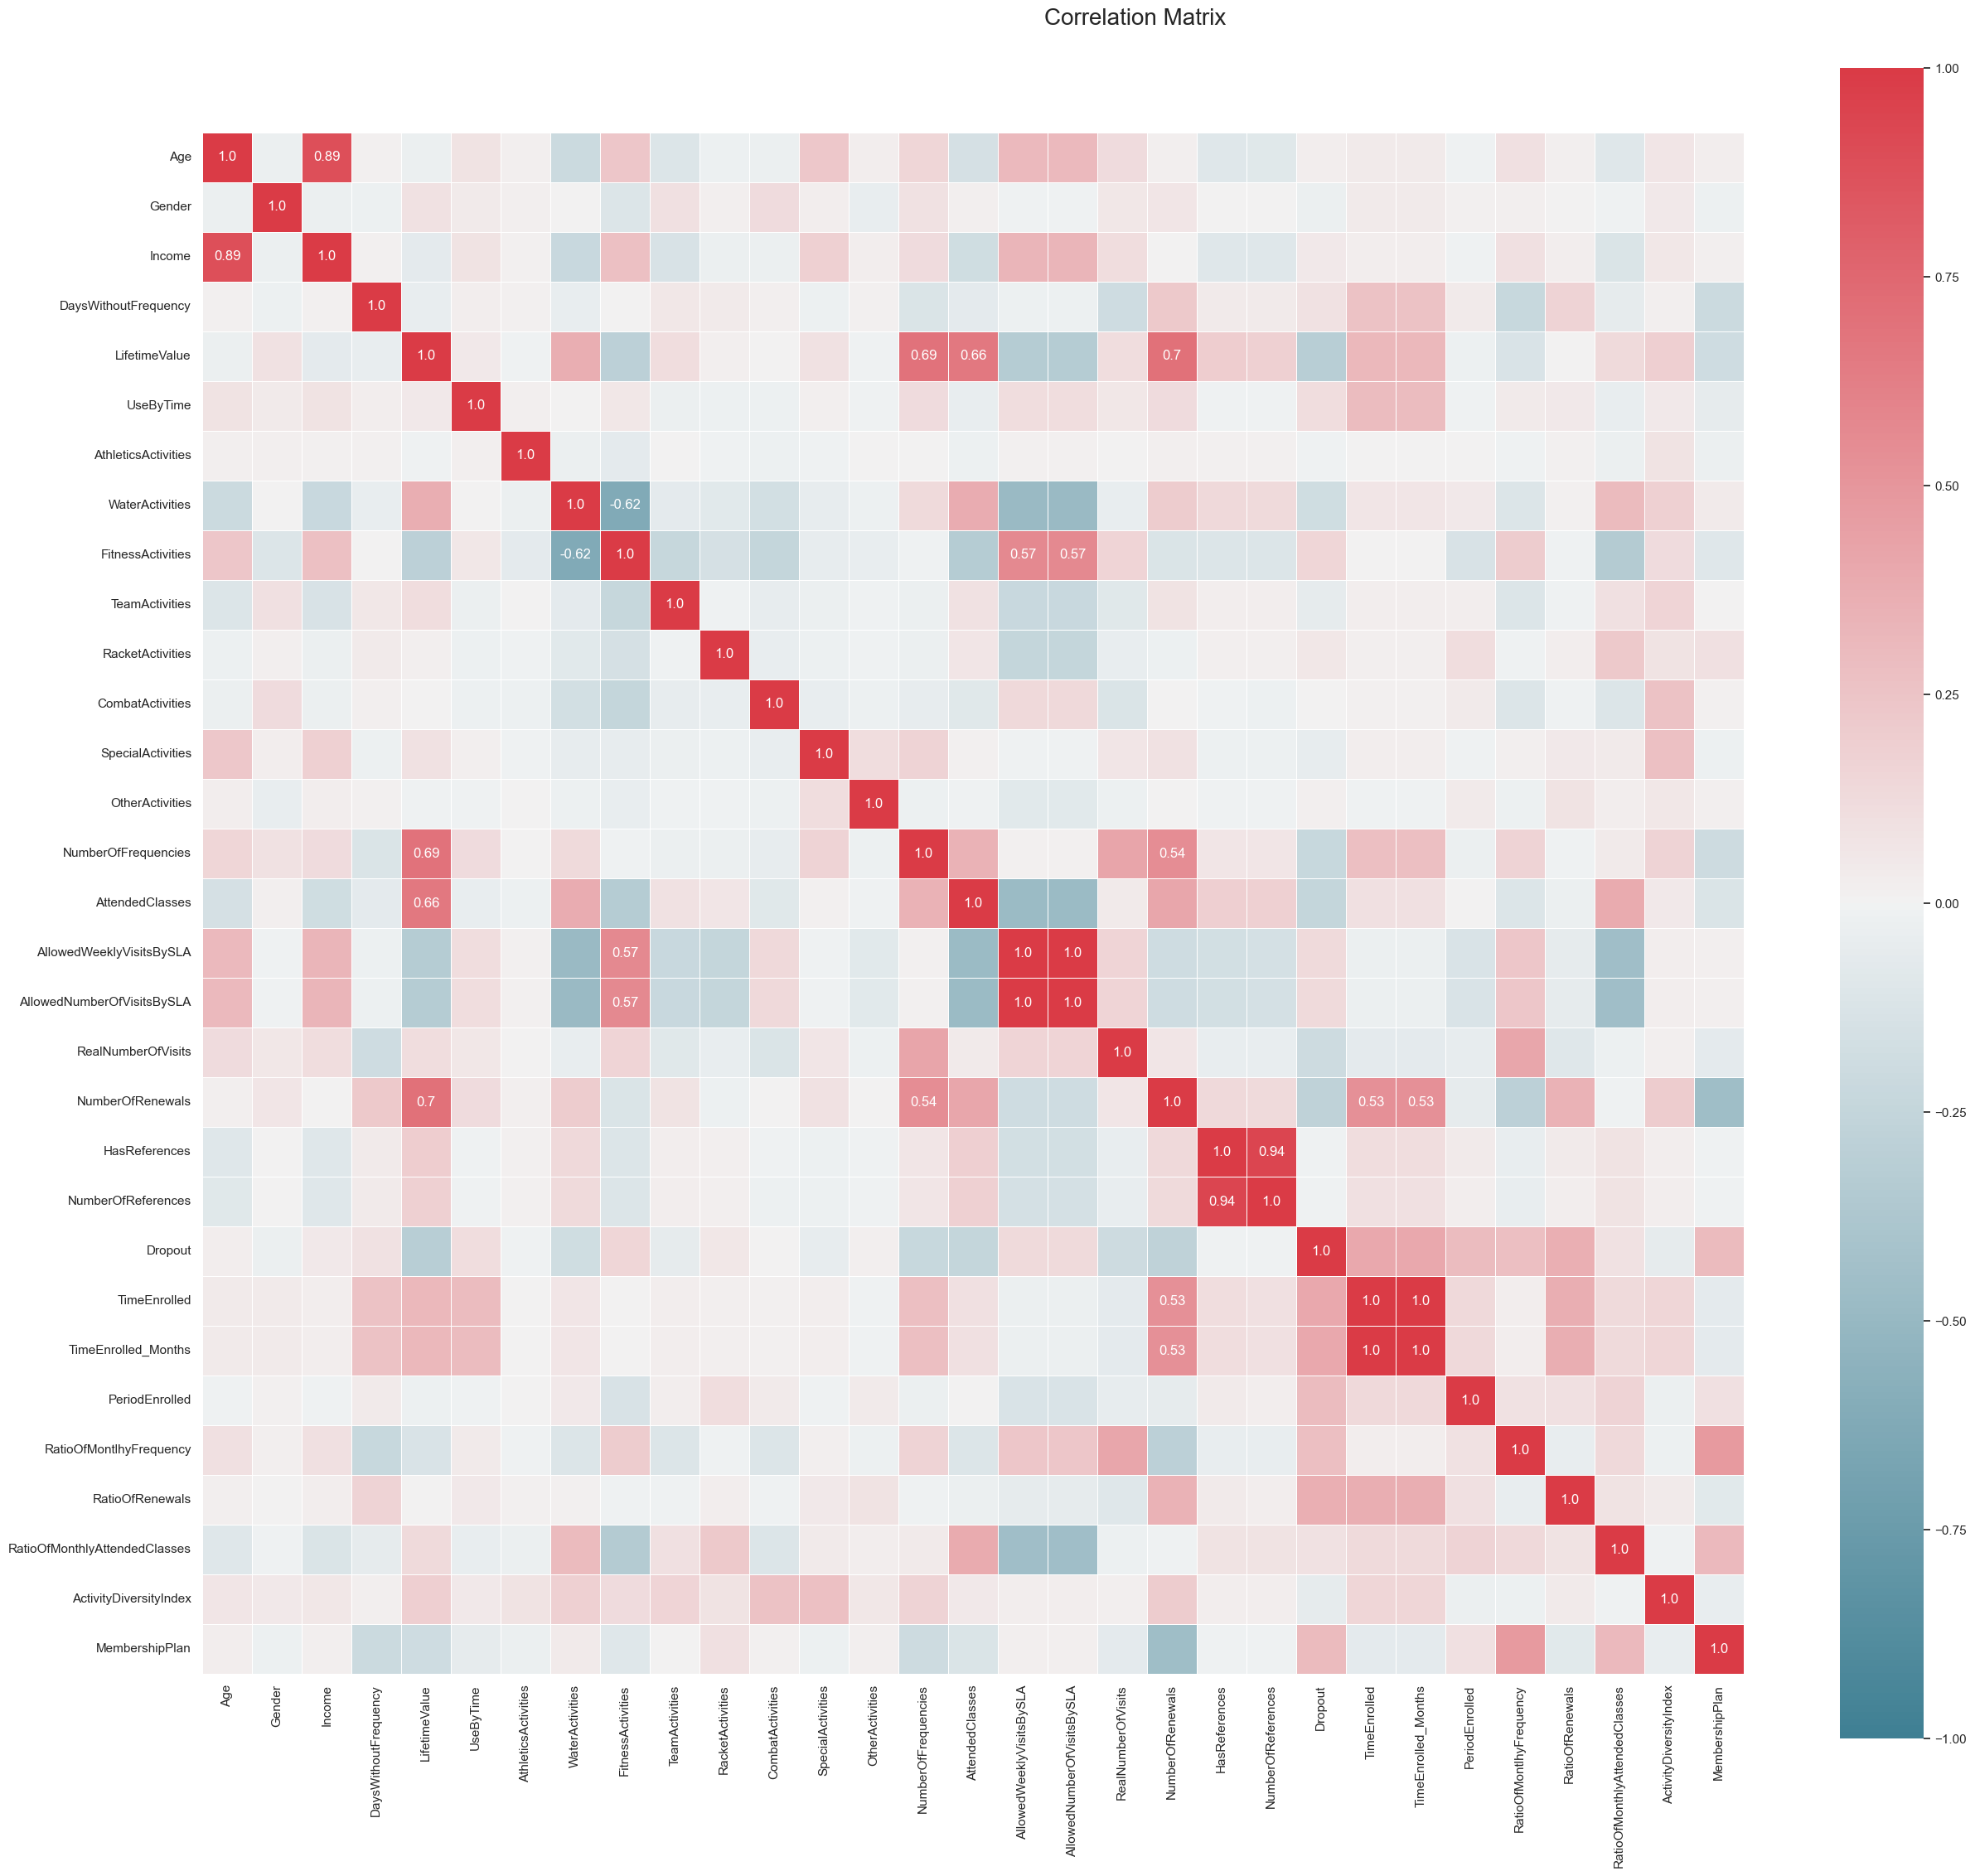

In [113]:
# Prepare figure
fig = plt.figure(figsize=(30, 24))

df_corr_numeric = df_corr.select_dtypes(include=[np.number])

corr = np.round(df_corr_numeric.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

- HasReferences is redundant, since we can tell by NumberOfReferences (when value = 0) | highly correlated
- EnrollmentFinish has a correlation of close to 1.0 with 'LastPeriodStart', 'DateLastVisit' and 'LastPeriodFinish'. We will just keep the EnrollmentFinish
- NumberOfRenewals is highly correlated with Time Enrolled so we will just keep this last one
- Drop Income

In [114]:
# Select variables according to their correlations
df_corr.drop(columns=['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'DateLastVisit', 'LastPeriodFinish', 'HasReferences', 'Income', 'NumberOfRenewals', 'AttendedClasses', 'TimeEnrolled', 'PeriodEnrolled'],inplace=True)

Updating metric_features

In [115]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14756 entries, 10000 to 24941
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  int64  
 1   Gender                         14756 non-null  int32  
 2   DaysWithoutFrequency           14756 non-null  int64  
 3   LifetimeValue                  14756 non-null  float64
 4   UseByTime                      14756 non-null  int64  
 5   AthleticsActivities            14756 non-null  float64
 6   WaterActivities                14756 non-null  float64
 7   FitnessActivities              14756 non-null  float64
 8   TeamActivities                 14756 non-null  float64
 9   RacketActivities               14756 non-null  float64
 10  CombatActivities               14756 non-null  float64
 11  SpecialActivities              14756 non-null  float64
 12  OtherActivities                14756 non-null  

locator: <matplotlib.ticker.AutoLocator object at 0x000002480F247610>


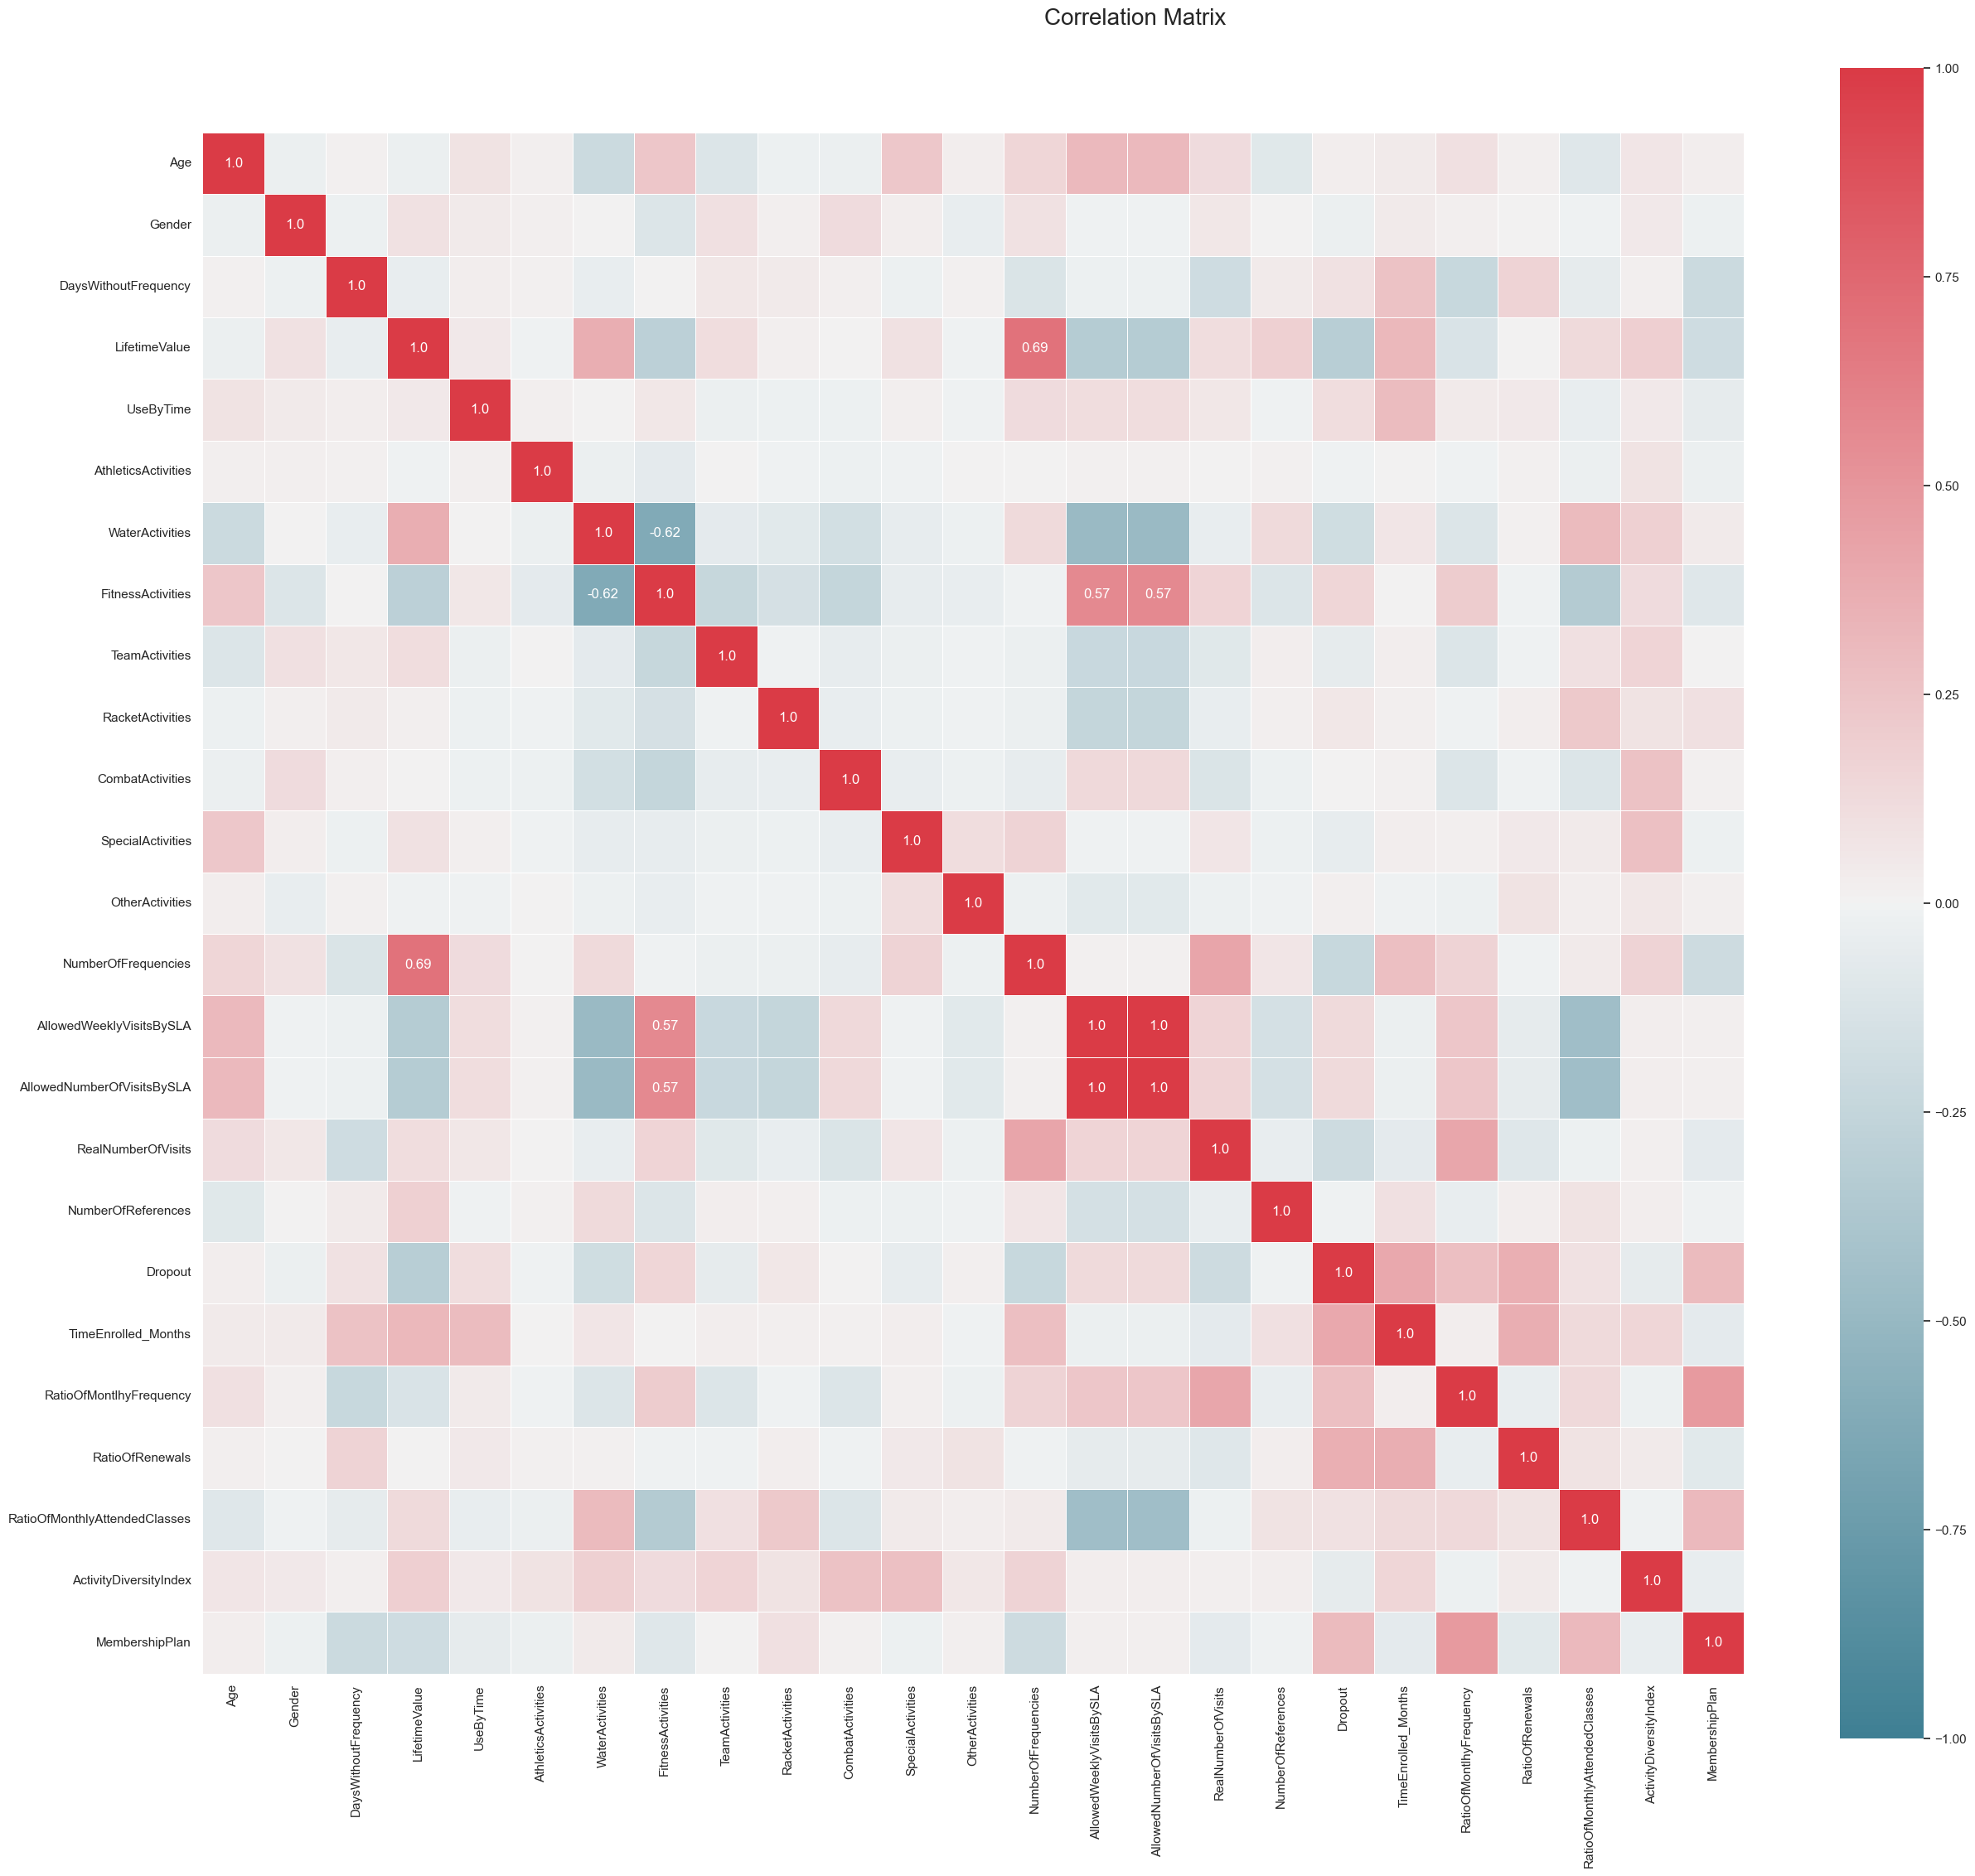

In [116]:
# Prepare figure
fig = plt.figure(figsize=(30, 24))

df_corr_numeric = df_corr.select_dtypes(include=[np.number])

corr = np.round(df_corr_numeric.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

# 9.Data Normalization

In [117]:
# Create a normalized df so we can use it for clustering later on
df_normalized = df_corr.copy()
# Keeping a non normalized df so we can better visualize the clusters afterwards
df_non_normalized = df_corr.copy()

In [118]:
# Separate numeric and categorical data
df_normalized_num = df_normalized.select_dtypes(include=['int64', 'float64', 'Int64', 'int32','boolean'])

In [119]:
scaler = MinMaxScaler()

df_normalized_num_scaled = scaler.fit_transform(df_normalized_num)

df_normalized = pd.DataFrame(df_normalized_num_scaled, columns=df_normalized_num.columns)

In [120]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  float64
 1   Gender                         14756 non-null  float64
 2   DaysWithoutFrequency           14756 non-null  float64
 3   LifetimeValue                  14756 non-null  float64
 4   UseByTime                      14756 non-null  float64
 5   AthleticsActivities            14756 non-null  float64
 6   WaterActivities                14756 non-null  float64
 7   FitnessActivities              14756 non-null  float64
 8   TeamActivities                 14756 non-null  float64
 9   RacketActivities               14756 non-null  float64
 10  CombatActivities               14756 non-null  float64
 11  SpecialActivities              14756 non-null  float64
 12  OtherActivities                14756 non-null 

In [121]:
df_non_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14756 entries, 10000 to 24941
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  int64  
 1   Gender                         14756 non-null  int32  
 2   DaysWithoutFrequency           14756 non-null  int64  
 3   LifetimeValue                  14756 non-null  float64
 4   UseByTime                      14756 non-null  int64  
 5   AthleticsActivities            14756 non-null  float64
 6   WaterActivities                14756 non-null  float64
 7   FitnessActivities              14756 non-null  float64
 8   TeamActivities                 14756 non-null  float64
 9   RacketActivities               14756 non-null  float64
 10  CombatActivities               14756 non-null  float64
 11  SpecialActivities              14756 non-null  float64
 12  OtherActivities                14756 non-null  

# 10.Clustering Algorithms 

In [122]:
# df normalized to perform the cluster
df_ca = df_normalized.copy()
# df non normalized to visualize the clusters
df_ca_analysis = df_non_normalized.copy()

In [123]:
# df_ca.reset_index(drop=True, inplace=True)
# df_ca_analysis.reset_index(drop=True, inplace=True)

# df_combined = pd.concat([df_ca, df_ca_analysis], axis=1)

In [124]:
# df_combined

In [125]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  float64
 1   Gender                         14756 non-null  float64
 2   DaysWithoutFrequency           14756 non-null  float64
 3   LifetimeValue                  14756 non-null  float64
 4   UseByTime                      14756 non-null  float64
 5   AthleticsActivities            14756 non-null  float64
 6   WaterActivities                14756 non-null  float64
 7   FitnessActivities              14756 non-null  float64
 8   TeamActivities                 14756 non-null  float64
 9   RacketActivities               14756 non-null  float64
 10  CombatActivities               14756 non-null  float64
 11  SpecialActivities              14756 non-null  float64
 12  OtherActivities                14756 non-null 

In [126]:
df_ca_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14756 entries, 10000 to 24941
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  int64  
 1   Gender                         14756 non-null  int32  
 2   DaysWithoutFrequency           14756 non-null  int64  
 3   LifetimeValue                  14756 non-null  float64
 4   UseByTime                      14756 non-null  int64  
 5   AthleticsActivities            14756 non-null  float64
 6   WaterActivities                14756 non-null  float64
 7   FitnessActivities              14756 non-null  float64
 8   TeamActivities                 14756 non-null  float64
 9   RacketActivities               14756 non-null  float64
 10  CombatActivities               14756 non-null  float64
 11  SpecialActivities              14756 non-null  float64
 12  OtherActivities                14756 non-null  

# 11.Segmentation

In [127]:
df_ca.columns

Index(['Age', 'Gender', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfReferences', 'Dropout',
       'TimeEnrolled_Months', 'RatioOfMontlhyFrequency', 'RatioOfRenewals',
       'RatioOfMonthlyAttendedClasses', 'ActivityDiversityIndex',
       'MembershipPlan'],
      dtype='object')

In [128]:
sociodemographic_value_features = [
    'Age',
    'LifetimeValue',
    'ActivityDiversityIndex'
]

engagement_diversity_features = [
    'NumberOfReferences',
    'RatioOfRenewals',
    'RatioOfMontlhyFrequency',
    'RatioOfMonthlyAttendedClasses',
    'MembershipPlan'
    
]

- *Age*: Age of the user at October 31st 2019 if it is not a dropout, or age of the user at date specified in attribute EnrollmentFinish if it is a dropout
- *Gender*: Gender of the user (Male or Female)
- *LifetimeValue*: Total amount paid by the customer during the period in which he was enrolled (between EnrollmentStart and EnrollmentFinish)

- *AttendedClasses*: Number of classes the user attended between EnrollmentStart and EnrollmentFinish
- *NumberOfReferences*: Number of people with which the user is related by family relationship or friendship
- *Dropout*: Represents the user’s enrollment status
- *RatioOfRenewals*: Number of Renewals / TimeEnrolled 
- *RatioOfFrequency*: Number of visits to the sports facility / TimeEnrolled

- *AttendedClasses*: Number of classes the user attended between EnrollmentStart and EnrollmentFinish
- *NumberOfFrequencies*: Number of visits to the sports facility since the date indicated in EnrollmentStart and the date indicated in EnrollmentFinish
- *NumberOfRenewals*: Number of renewals during the registration period (between EnrollmentStart and EnrollmentFinish)

In [129]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

## 11.1 Socio-Demographics 

### 11.1.2 Hierarchical + K-means

In [130]:
df_socio1 = df_ca[sociodemographic_value_features]

In [131]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [132]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_socio1, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_socio1, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2  0.446251  0.251799  0.004093  0.001279  0.422065
3  0.606771  0.279194  0.258654  0.001963  0.570137
4  0.676451  0.299746  0.292351  0.002849  0.639454
5  0.734957  0.475025  0.310869  0.005091  0.702670
6  0.786148  0.511847  0.311688  0.008926  0.752576
7  0.818796  0.514468  0.311961  0.009709  0.787126
8  0.838115  0.516543  0.404447  0.010368  0.806717
9  0.853052  0.677625  0.404640  0.034168  0.825008

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fon

findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CENSCBK.TTF', name='Century Schoolbook', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\TCB_____.TTF', name='Tw Cen MT', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALNI.TTF', name='Arial', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 1.25
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\micross.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\himalaya.ttf', name='Microsoft Himalaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\palai.ttf', name='Palatino Linotype', styl

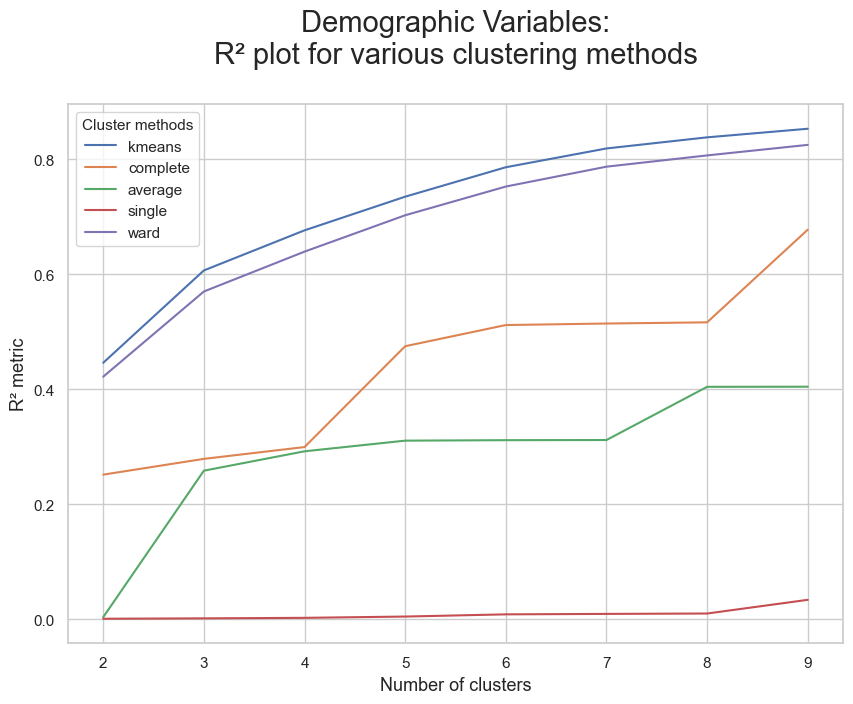

In [133]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [134]:
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_socio1)

KMeans(n_clusters=3, n_init=15, random_state=1)

For n_clusters = 2, the average silhouette_score is : 0.52568220166193
For n_clusters = 3, the average silhouette_score is : 0.4935292727931075
For n_clusters = 4, the average silhouette_score is : 0.463182763155845
For n_clusters = 5, the average silhouette_score is : 0.49487024831561355
For n_clusters = 6, the average silhouette_score is : 0.503280721970295
For n_clusters = 7, the average silhouette_score is : 0.5125106061309153
For n_clusters = 8, the average silhouette_score is : 0.44990530894936953
For n_clusters = 9, the average silhouette_score is : 0.4660269108054522
For n_clusters = 10, the average silhouette_score is : 0.469151490148486


<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fon

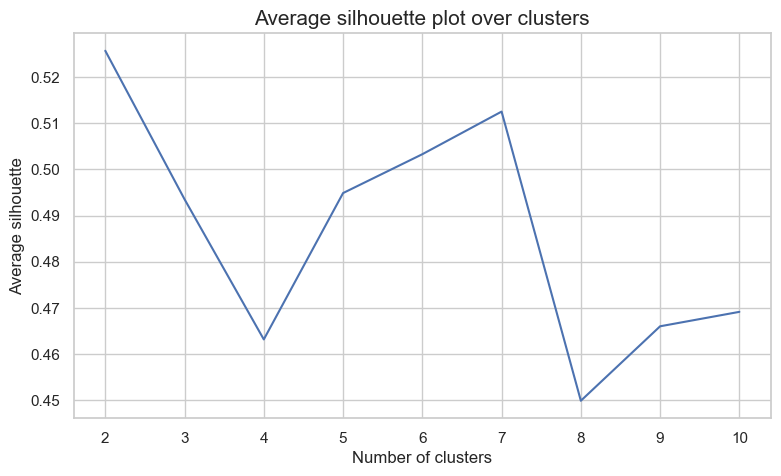

In [135]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

range_clusters = range(1, 11)

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_socio1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_socio1, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; Why range_clusters[1:] ? Remember we skipped k=1 in the cell above
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [136]:
df_socio1

Age  LifetimeValue  ActivityDiversityIndex
0      0.759494       0.025178                     0.2
1      0.367089       0.136656                     0.2
2      0.291139       0.010380                     0.2
3      0.113924       0.044065                     0.2
4      0.443038       0.106345                     0.2
...         ...            ...                     ...
14751  0.177215       0.417246                     0.2
14752  0.493671       0.097953                     0.2
14753  0.253165       0.012096                     0.2
14754  0.696203       0.225129                     0.2
14755  0.405063       0.262589                     0.2

[14756 rows x 3 columns]

In [137]:
# Re-running the Hierarchical clustering based on the correct number of clusters
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust_labels = kmclust.fit_predict(df_socio1)
df_socio1['kmlust_labels'] = kmclust_labels

df_socio1

C:\Users\carla\AppData\Local\Temp\ipykernel_24136\4085706651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socio1['kmlust_labels'] = kmclust_labels


Age  LifetimeValue  ActivityDiversityIndex  kmlust_labels
0      0.759494       0.025178                     0.2              1
1      0.367089       0.136656                     0.2              0
2      0.291139       0.010380                     0.2              0
3      0.113924       0.044065                     0.2              2
4      0.443038       0.106345                     0.2              0
...         ...            ...                     ...            ...
14751  0.177215       0.417246                     0.2              2
14752  0.493671       0.097953                     0.2              1
14753  0.253165       0.012096                     0.2              0
14754  0.696203       0.225129                     0.2              1
14755  0.405063       0.262589                     0.2              0

[14756 rows x 4 columns]

In [138]:
df_socio1['kmlust_labels'].value_counts()

kmlust_labels
0    9737
1    2664
2    2355
Name: count, dtype: int64

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=23.0.
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\Users\\carla\\anaconda3\\envs\\DM2324\\Lib\\site-packages\\matplotlib\\mpl-data\\fon

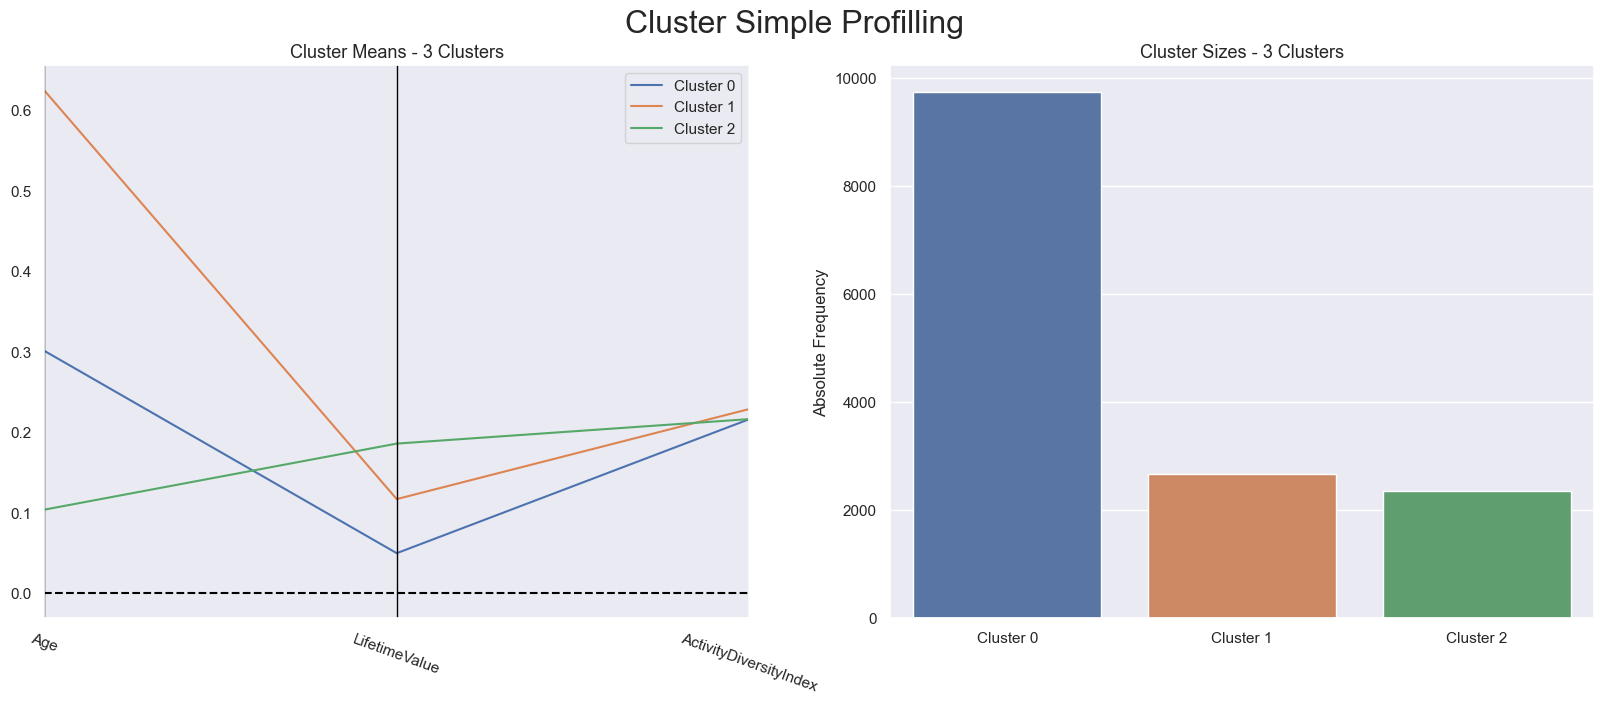

In [139]:
cluster_profiles(df_socio1, ['kmlust_labels'], (20,7))

In [140]:
df_socio1.groupby('kmlust_labels')[sociodemographic_value_features].mean()

Age  LifetimeValue  ActivityDiversityIndex
kmlust_labels                                                 
0              0.301142       0.049846                0.216186
1              0.624515       0.117029                0.228829
2              0.103932       0.185969                0.216391

In [141]:
# df_ca_analysis.groupby('kmlust_labels').mean()
df_ca_analysis.columns

Index(['Age', 'Gender', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfReferences', 'Dropout',
       'TimeEnrolled_Months', 'RatioOfMontlhyFrequency', 'RatioOfRenewals',
       'RatioOfMonthlyAttendedClasses', 'ActivityDiversityIndex',
       'MembershipPlan'],
      dtype='object')

In [142]:
df_socio2 = df_ca[sociodemographic_value_features]

In [143]:
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_socio2)

KMeans(n_clusters=4, n_init=15, random_state=1)

In [144]:
# Re-running the Hierarchical clustering based on the correct number of clusters
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust_labels2 = kmclust.fit_predict(df_socio2)
df_socio2['kmlust_labels22'] = kmclust_labels2

df_socio2

C:\Users\carla\AppData\Local\Temp\ipykernel_24136\2780443549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socio2['kmlust_labels22'] = kmclust_labels2


Age  LifetimeValue  ActivityDiversityIndex  kmlust_labels22
0      0.759494       0.025178                     0.2                3
1      0.367089       0.136656                     0.2                1
2      0.291139       0.010380                     0.2                2
3      0.113924       0.044065                     0.2                0
4      0.443038       0.106345                     0.2                1
...         ...            ...                     ...              ...
14751  0.177215       0.417246                     0.2                0
14752  0.493671       0.097953                     0.2                1
14753  0.253165       0.012096                     0.2                2
14754  0.696203       0.225129                     0.2                3
14755  0.405063       0.262589                     0.2                1

[14756 rows x 4 columns]

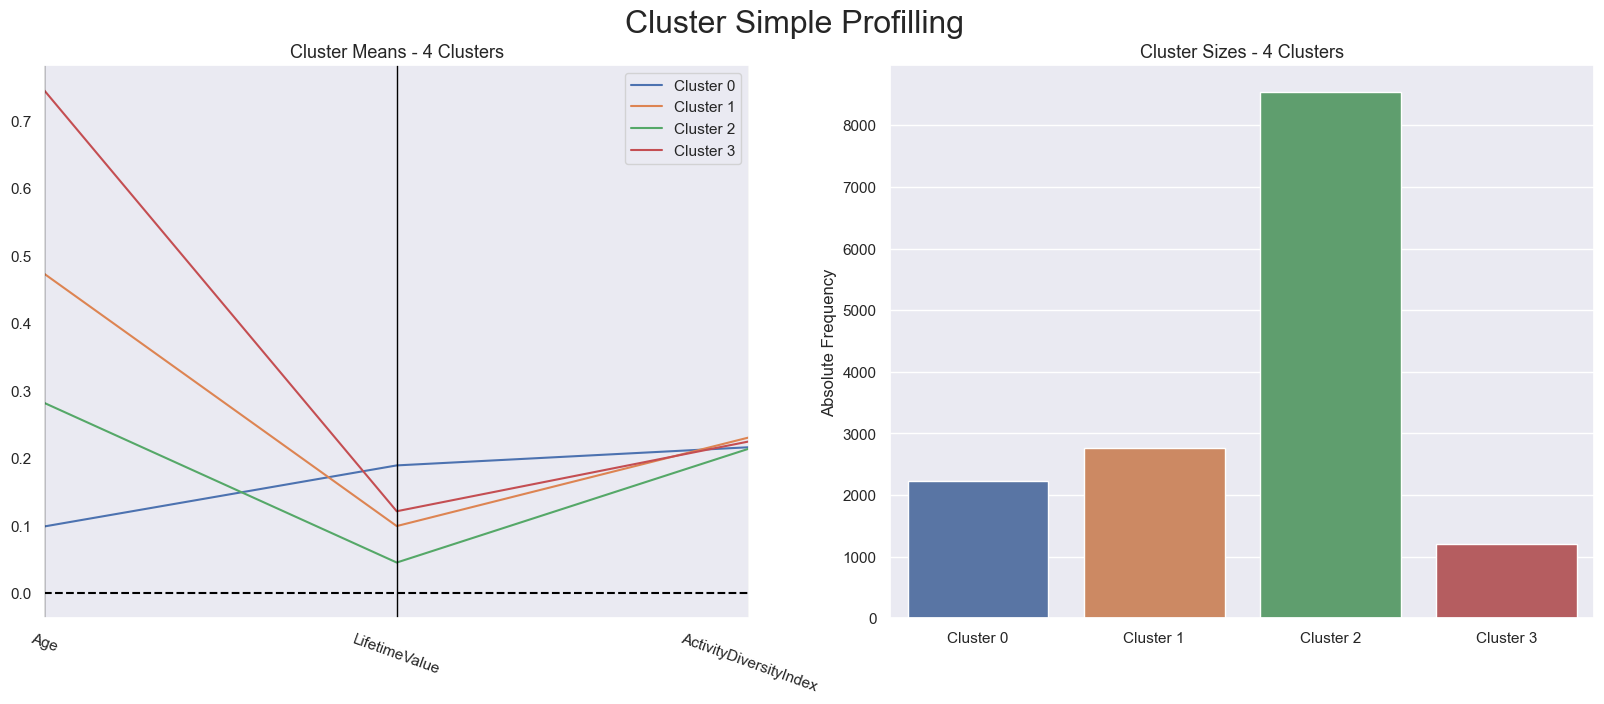

In [145]:
cluster_profiles(df_socio2, ['kmlust_labels22'], (20,7))

### SOM + K-means

In [146]:
df_somk_1 = df_ca[sociodemographic_value_features]

In [147]:
np.random.seed(80)

sm = sompy.SOMFactory().build(
    df_somk_1.values, 
    mapsize=[10, 10], 
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=sociodemographic_value_features
)
sm.train(n_job=1, verbose='info', train_rough_len=120, train_finetune_len=120)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 120

 epoch: 1 ---> elapsed time:  0.058000, quantization error: 1.491507

 epoch: 2 ---> elapsed time:  0.033000, quantization error: 1.296550

 epoch: 3 ---> elapsed time:  0.033000, quantization error: 1.242350

 epoch: 4 ---> elapsed time:  0.033000, quantization error: 1.232614

 epoch: 5 ---> elapsed time:  0.032000, quantization error: 1.228868

 epoch: 6 ---> elapsed time:  0.032000, quantization error: 1.225265



 epoch: 7 ---> elapsed time:  0.033000, quantization error: 1.222278

 epoch: 8 ---> elapsed time:  0.034000, quantization error: 1.220063

 epoch: 9 ---> elapsed time:  0.032000, quantization error: 1.218189

 epoch: 10 ---> elapsed time:  0.033000, quantization error: 1.216362

 epoch: 11 ---> elapsed time:  0.031000, quantization error: 1.214473

 epoch: 12 ---> elapsed time:  0.031000, quantization error: 1.212500

 epoch: 13 ---> elapsed time:  0.039000, quantization error: 1.210548

 epoch: 14 ---> elapsed time:  0.034000, quantization error: 1.208632

 epoch: 15 ---> elapsed time:  0.032000, quantization error: 1.206890

 epoch: 16 ---> elapsed time:  0.035000, quantization error: 1.205094

 epoch: 17 ---> elapsed time:  0.032000, quantization error: 1.202759

 epoch: 18 ---> elapsed time:  0.032000, quantization error: 1.199162

 epoch: 19 ---> elapsed time:  0.034000, quantization error: 1.196153

 epoch: 20 ---> elapsed time:  0.035000, quantization error: 1.194003

 epoch: 2

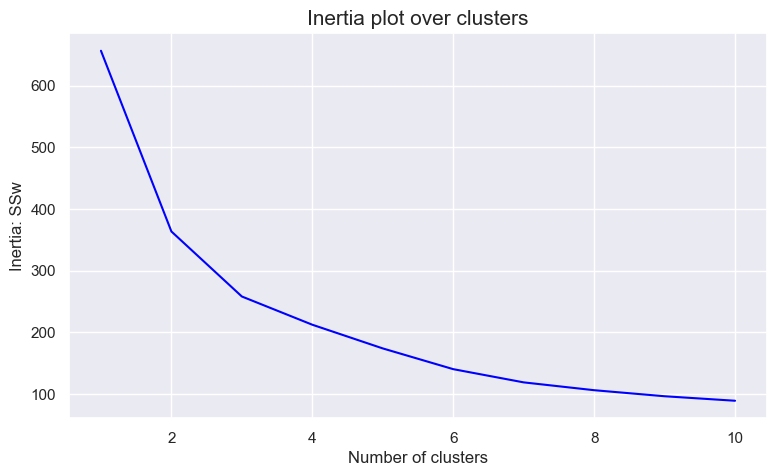

In [148]:
inertia = []
for n_clus in range(1,11): 
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=80)
    kmclust.fit(df_somk_1)
    inertia.append(kmclust.inertia_)

plt.figure(figsize=(9,5))
plt.plot(range(1,11),inertia,color = 'blue')
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

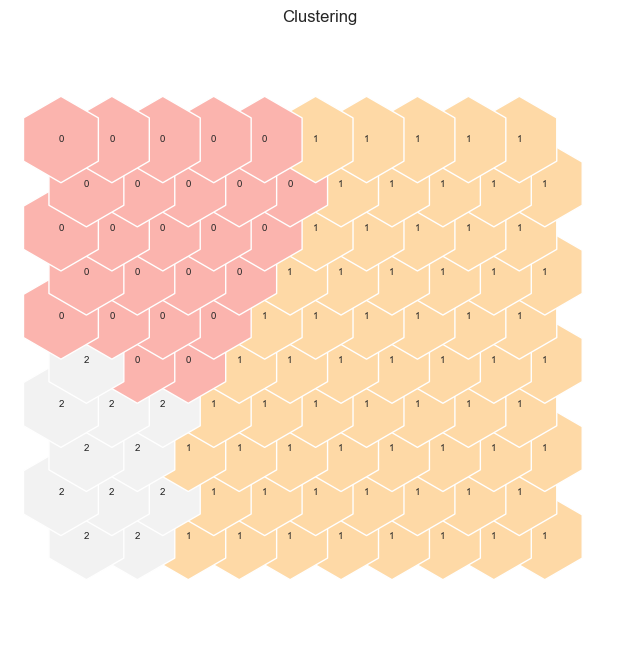

In [149]:
kmeans = KMeans(n_clusters=3,init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(8,8,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [150]:
nodes = sm.codebook.matrix

df_somk = pd.DataFrame(nodes, columns=sociodemographic_value_features)
df_somk['som_kmeans_labels'] = nodeclus_labels
df_somk

Age  LifetimeValue  ActivityDiversityIndex  som_kmeans_labels
0  -0.855324       2.290031               -0.292527                  1
1  -0.582284       1.642596               -0.291720                  1
2  -0.256142       1.074857               -0.289587                  1
3   0.041727       0.597212               -0.288668                  1
4   0.356047       0.167844               -0.290480                  1
..       ...            ...                     ...                ...
95  0.070314      -0.553925               -0.215429                  1
96  0.072753      -0.472897                0.047150                  1
97  0.088634      -0.275296                0.906118                  1
98  0.063307      -0.063054                2.119151                  2
99 -0.051778      -0.036719                2.727421                  2

[100 rows x 4 columns]

In [151]:
df_somk['som_kmeans_labels'].value_counts()

som_kmeans_labels
1    64
0    25
2    11
Name: count, dtype: int64

In [152]:
bmus_map = sm.find_bmu(df_somk_1.values)[0]  #get bmus for each observation in df

In [153]:
df_bmus = pd.DataFrame(
    np.concatenate((df_somk_1, np.expand_dims(bmus_map,1)), axis=1),
    index=df_somk_1.index, columns=np.append(df_somk_1.columns,"BMU")
)
df_bmus

Age  LifetimeValue  ActivityDiversityIndex   BMU
0      0.759494       0.025178                     0.2  57.0
1      0.367089       0.136656                     0.2  57.0
2      0.291139       0.010380                     0.2  66.0
3      0.113924       0.044065                     0.2  66.0
4      0.443038       0.106345                     0.2  57.0
...         ...            ...                     ...   ...
14751  0.177215       0.417246                     0.2  57.0
14752  0.493671       0.097953                     0.2  57.0
14753  0.253165       0.012096                     0.2  66.0
14754  0.696203       0.225129                     0.2  57.0
14755  0.405063       0.262589                     0.2  57.0

[14756 rows x 4 columns]

In [154]:
df_somk_1 = df_bmus.merge(df_somk['som_kmeans_labels'], 'left', left_on="BMU", right_index=True)

df_somk_1.drop('BMU', axis=1, inplace=True)

In [155]:
df_somk_1.groupby('som_kmeans_labels')[sociodemographic_value_features].mean()

Age  LifetimeValue  ActivityDiversityIndex
som_kmeans_labels                                                 
0                  0.476198       0.127356                0.229569
1                  0.237630       0.056756                0.211115
2                  0.370886       0.370719                0.800000

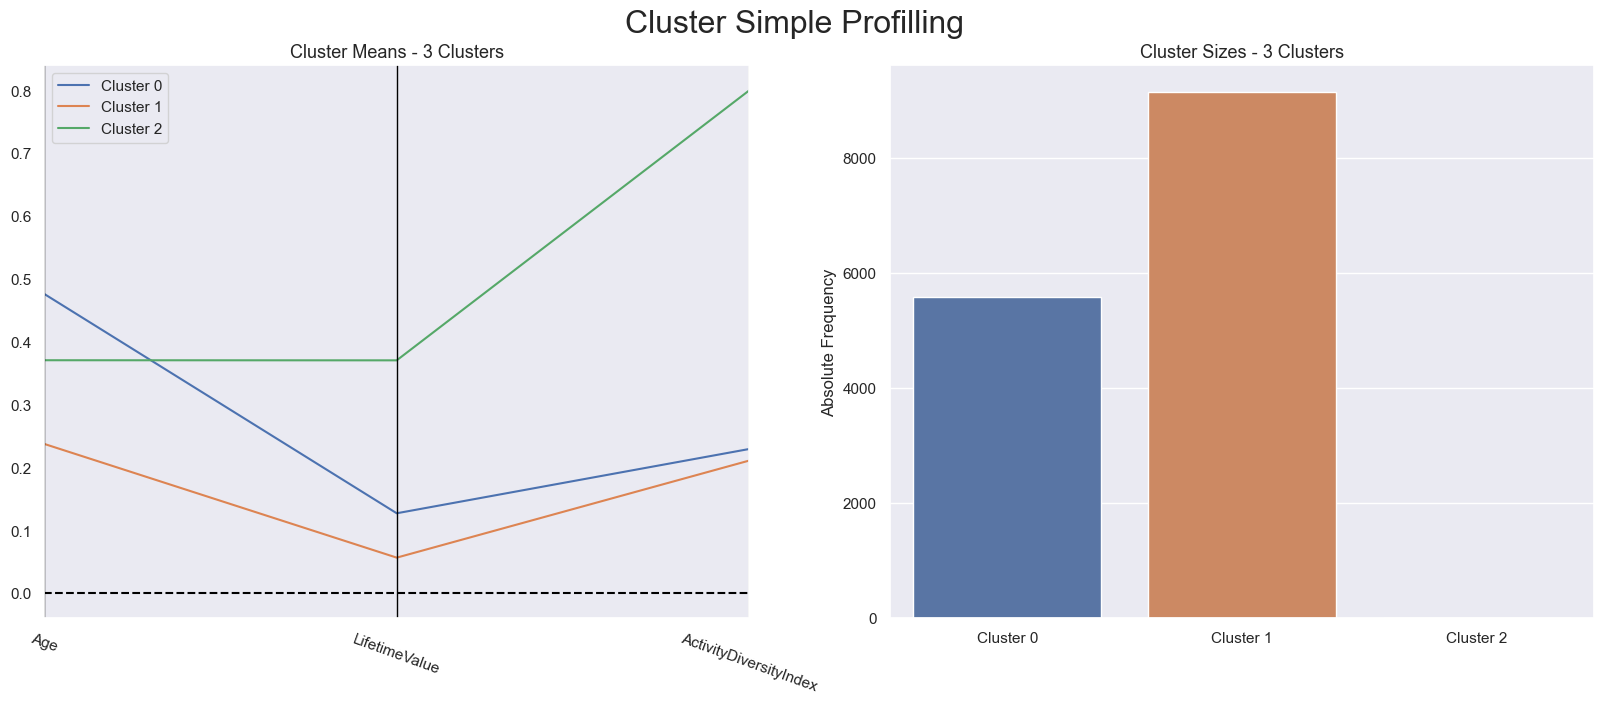

In [156]:
cluster_profiles(df_somk_1, ['som_kmeans_labels'], (20,7))

### SOM + Hierarquical

In [157]:
df_socio3 = df_ca[sociodemographic_value_features]

In [158]:
np.random.seed(80)

sm = sompy.SOMFactory().build(
    df_socio3.values, 
    mapsize=[10, 10], 
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=sociodemographic_value_features
)
sm.train(n_job=1, verbose='info', train_rough_len=120, train_finetune_len=120)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 120

 epoch: 1 ---> elapsed time:  0.032000, quantization error: 1.491507

 epoch: 2 ---> elapsed time:  0.035000, quantization error: 1.296550

 epoch: 3 ---> elapsed time:  0.034000, quantization error: 1.242350

 epoch: 4 ---> elapsed time:  0.034000, quantization error: 1.232614

 epoch: 5 ---> elapsed time:  0.033000, quantization error: 1.228868

 epoch: 6 ---> elapsed time:  0.032000, quantization error: 1.225265

 epoch: 7 ---> elapsed time:  0.033000, quantization error: 1.222278

 epoch: 8 ---> elapsed time:  0.034000, quantization error: 1.220063

 epoch: 9 ---> elapsed time:  0.033000, quantization error: 1.218189

 epoch: 10 ---> elapsed time:  0.034000, quantization error: 1.216362

 epoch: 11 ---> elapsed time:  0.034000, quantization error: 1.214473

 epoch: 12 ---> elapsed time:  0.032000, quantization error: 1.212500

 epoch: 13 ---> 

 epoch: 15 ---> elapsed time:  0.036000, quantization error: 1.206890

 epoch: 16 ---> elapsed time:  0.033000, quantization error: 1.205094

 epoch: 17 ---> elapsed time:  0.033000, quantization error: 1.202759

 epoch: 18 ---> elapsed time:  0.035000, quantization error: 1.199162

 epoch: 19 ---> elapsed time:  0.033000, quantization error: 1.196153

 epoch: 20 ---> elapsed time:  0.033000, quantization error: 1.194003

 epoch: 21 ---> elapsed time:  0.034000, quantization error: 1.191999

 epoch: 22 ---> elapsed time:  0.034000, quantization error: 1.189966

 epoch: 23 ---> elapsed time:  0.034000, quantization error: 1.187907

 epoch: 24 ---> elapsed time:  0.034000, quantization error: 1.185804

 epoch: 25 ---> elapsed time:  0.032000, quantization error: 1.183668

 epoch: 26 ---> elapsed time:  0.032000, quantization error: 1.181464

 epoch: 27 ---> elapsed time:  0.036000, quantization error: 1.179181

 epoch: 28 ---> elapsed time:  0.034000, quantization error: 1.176808

 epoch

In [159]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_socio3)

c:\Users\carla\anaconda3\envs\DM2324\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([13325,  8311, 14755, ...,     2,     1,     0], dtype=int64)

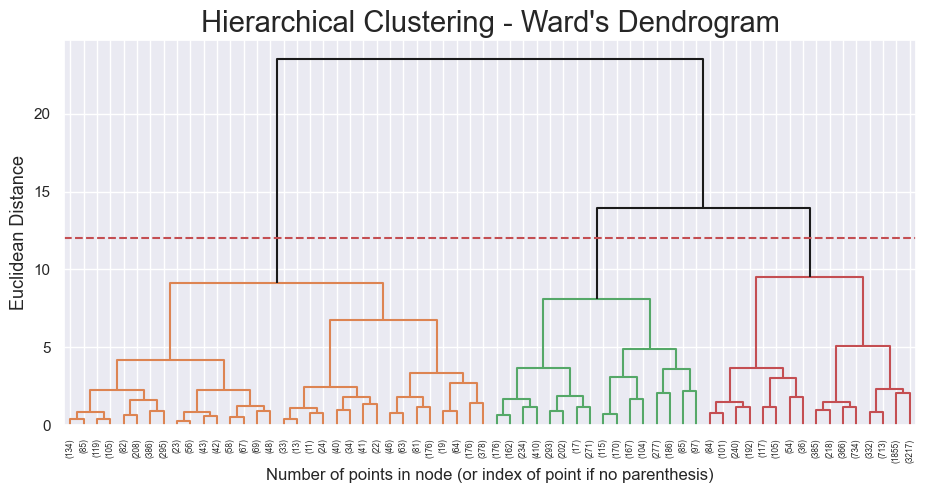

In [160]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 12
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

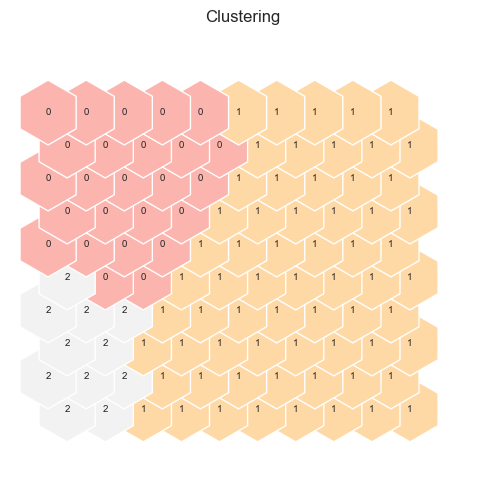

In [161]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
node_hier_label= hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(6,6,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [162]:
nodes = sm.codebook.matrix

hnodes = pd.DataFrame(nodes, columns=sociodemographic_value_features)
hnodes['som_hierar_labels'] = node_hier_label
hnodes

Age  LifetimeValue  ActivityDiversityIndex  som_hierar_labels
0  -0.855324       2.290031               -0.292527                  0
1  -0.582284       1.642596               -0.291720                  0
2  -0.256142       1.074857               -0.289587                  0
3   0.041727       0.597212               -0.288668                  0
4   0.356047       0.167844               -0.290480                  0
..       ...            ...                     ...                ...
95  0.070314      -0.553925               -0.215429                  0
96  0.072753      -0.472897                0.047150                  0
97  0.088634      -0.275296                0.906118                  1
98  0.063307      -0.063054                2.119151                  1
99 -0.051778      -0.036719                2.727421                  1

[100 rows x 4 columns]

In [163]:
bmus_ = sm.find_bmu(df_socio3.values)[0]

In [164]:
df_bmus_hc = pd.DataFrame(
    np.concatenate((df_socio3, np.expand_dims(bmus_,1)), axis=1),
    index=df_socio3.index, columns=np.append(df_socio3.columns,"BMU")
)
df_bmus_hc

Age  LifetimeValue  ActivityDiversityIndex   BMU
0      0.759494       0.025178                     0.2  57.0
1      0.367089       0.136656                     0.2  57.0
2      0.291139       0.010380                     0.2  66.0
3      0.113924       0.044065                     0.2  66.0
4      0.443038       0.106345                     0.2  57.0
...         ...            ...                     ...   ...
14751  0.177215       0.417246                     0.2  57.0
14752  0.493671       0.097953                     0.2  57.0
14753  0.253165       0.012096                     0.2  66.0
14754  0.696203       0.225129                     0.2  57.0
14755  0.405063       0.262589                     0.2  57.0

[14756 rows x 4 columns]

In [165]:
# Get cluster labels for each observation
df_somh = df_bmus.merge(hnodes['som_hierar_labels'], 'left', left_on="BMU", right_index=True)

df_somh.drop('BMU', axis=1, inplace=True)

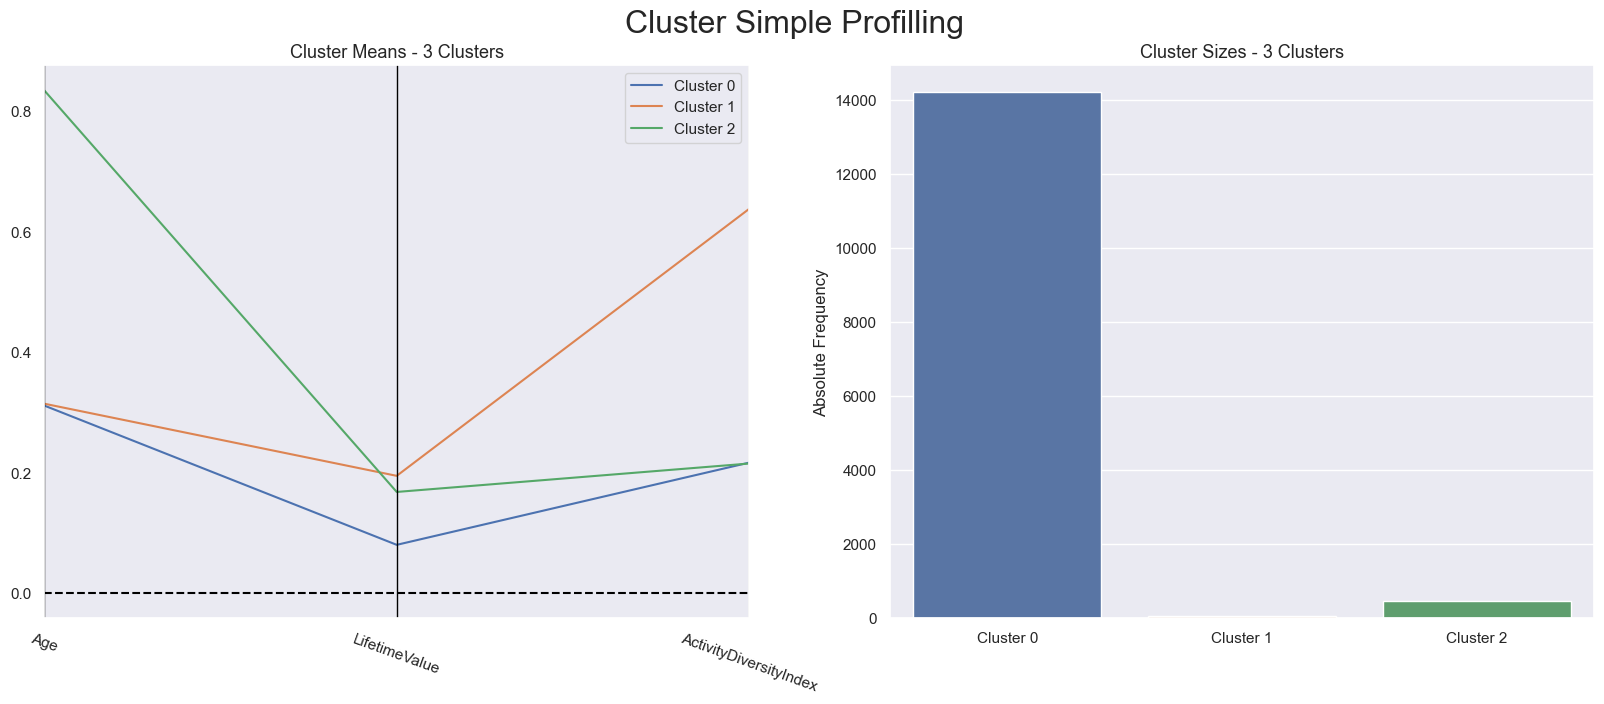

In [166]:
cluster_profiles(df_somh, ['som_hierar_labels'], (20,7))

In [167]:
df_somh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     14756 non-null  float64
 1   LifetimeValue           14756 non-null  float64
 2   ActivityDiversityIndex  14756 non-null  float64
 3   som_hierar_labels       14756 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 461.3 KB


### DBSCAN

In [168]:
df_socio4 = df_ca[sociodemographic_value_features]

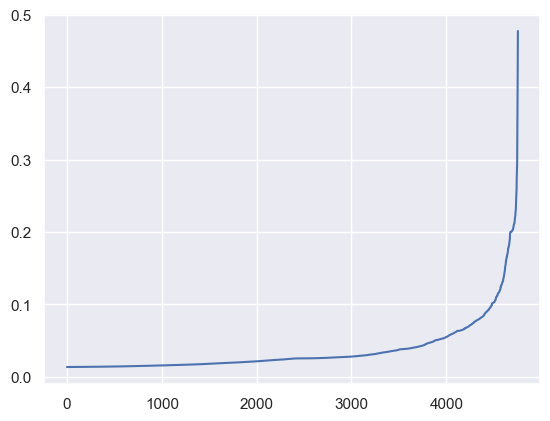

In [169]:
# Radius of cluster
neigh = NearestNeighbors(n_neighbors=27)
neigh.fit(df_socio4)
distances, _ = neigh.kneighbors(df_socio4)
distances = np.sort(distances[:, -1])
plt.plot(distances[10000:])
plt.show()

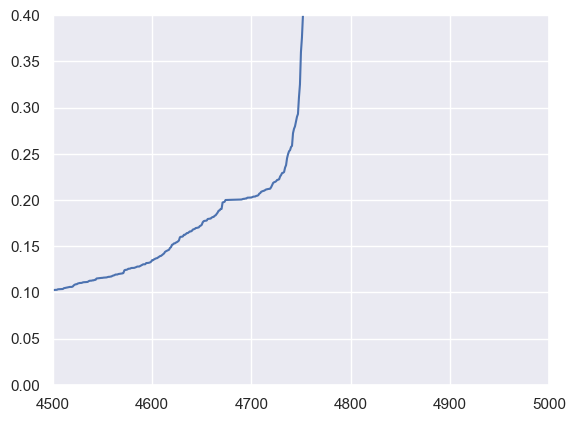

In [170]:
plt.plot(distances[10000:])
plt.axis([4500, 5000, 0,0.4])
plt.show()

In [171]:
for min_samples in range(2, 15):  
        dbscan = DBSCAN(eps=0.2, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df_socio4)
            
        dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
            
        n_noise = list(dbscan_labels).count(-1)
            
        if dbscan_n_clusters > 0:
            print(f"min_samples: {min_samples}, clusters: {dbscan_n_clusters}, noise:{n_noise}")

min_samples: 2, clusters: 5, noise:4
min_samples: 3, clusters: 4, noise:6
min_samples: 4, clusters: 3, noise:9
min_samples: 5, clusters: 3, noise:9
min_samples: 6, clusters: 3, noise:9
min_samples: 7, clusters: 2, noise:18
min_samples: 8, clusters: 2, noise:18
min_samples: 9, clusters: 2, noise:19
min_samples: 10, clusters: 2, noise:19
min_samples: 11, clusters: 2, noise:19
min_samples: 12, clusters: 2, noise:21
min_samples: 13, clusters: 2, noise:21
min_samples: 14, clusters: 2, noise:28


In [172]:
dbscan = DBSCAN(eps=0.20, min_samples=6, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_socio4)

dbscan_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_clusters)

Number of estimated clusters : 4


In [173]:
df_dbscan = pd.concat([df_socio4, pd.Series(dbscan_labels, name='dbscan_labels', index=df_socio4.index)], axis=1)

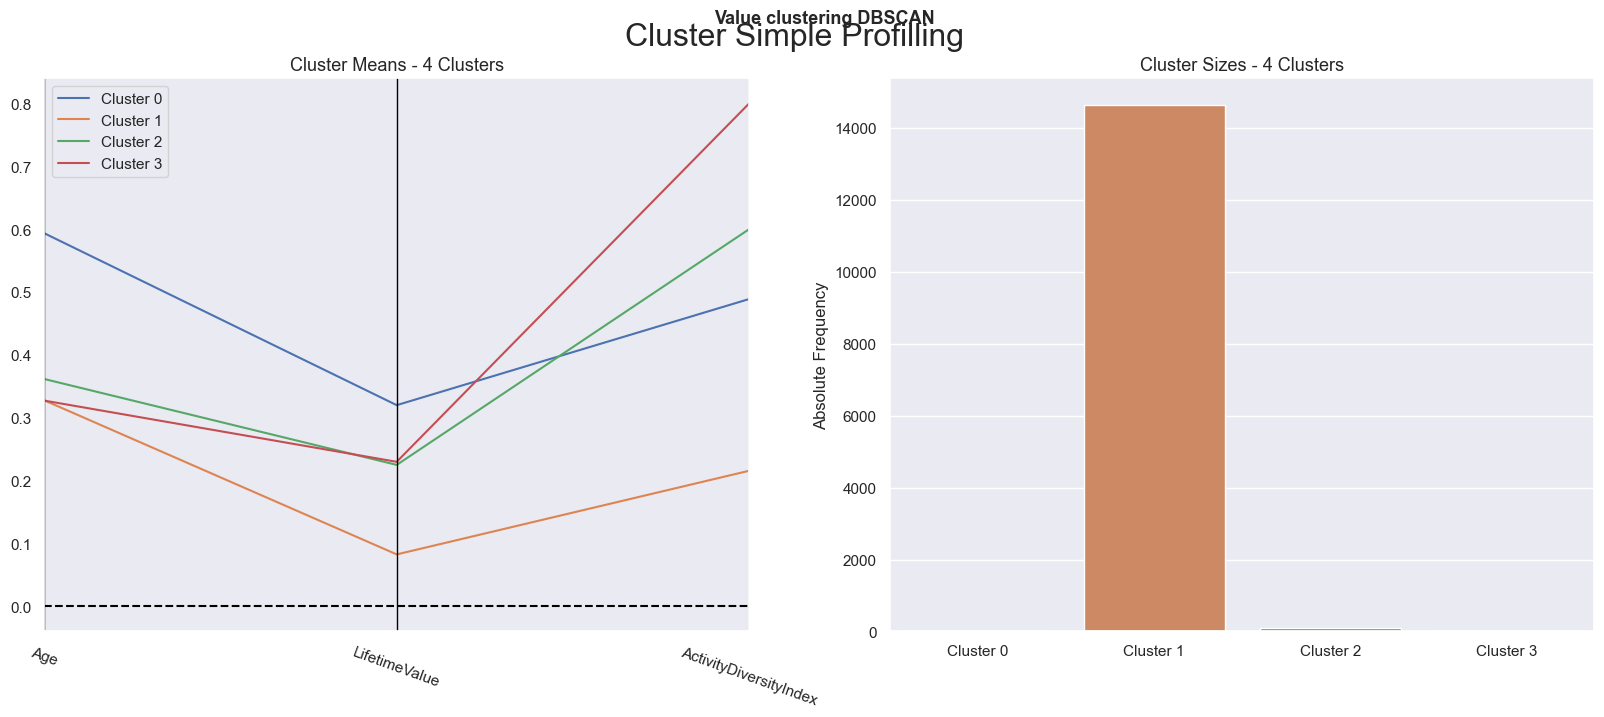

In [174]:
cluster_profiles(
    df = df_dbscan, 
    label_columns = ['dbscan_labels'], 
    figsize = (20, 7), 
    compar_titles = ["Value clustering DBSCAN"]
)

In [175]:
df_socio1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     14756 non-null  float64
 1   LifetimeValue           14756 non-null  float64
 2   ActivityDiversityIndex  14756 non-null  float64
 3   kmlust_labels           14756 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 403.6 KB


In [176]:
df_somk_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     14756 non-null  float64
 1   LifetimeValue           14756 non-null  float64
 2   ActivityDiversityIndex  14756 non-null  float64
 3   som_kmeans_labels       14756 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 403.6 KB


In [177]:
df_somh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     14756 non-null  float64
 1   LifetimeValue           14756 non-null  float64
 2   ActivityDiversityIndex  14756 non-null  float64
 3   som_hierar_labels       14756 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 461.3 KB


In [178]:
df_dbscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     14756 non-null  float64
 1   LifetimeValue           14756 non-null  float64
 2   ActivityDiversityIndex  14756 non-null  float64
 3   dbscan_labels           14756 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 461.3 KB


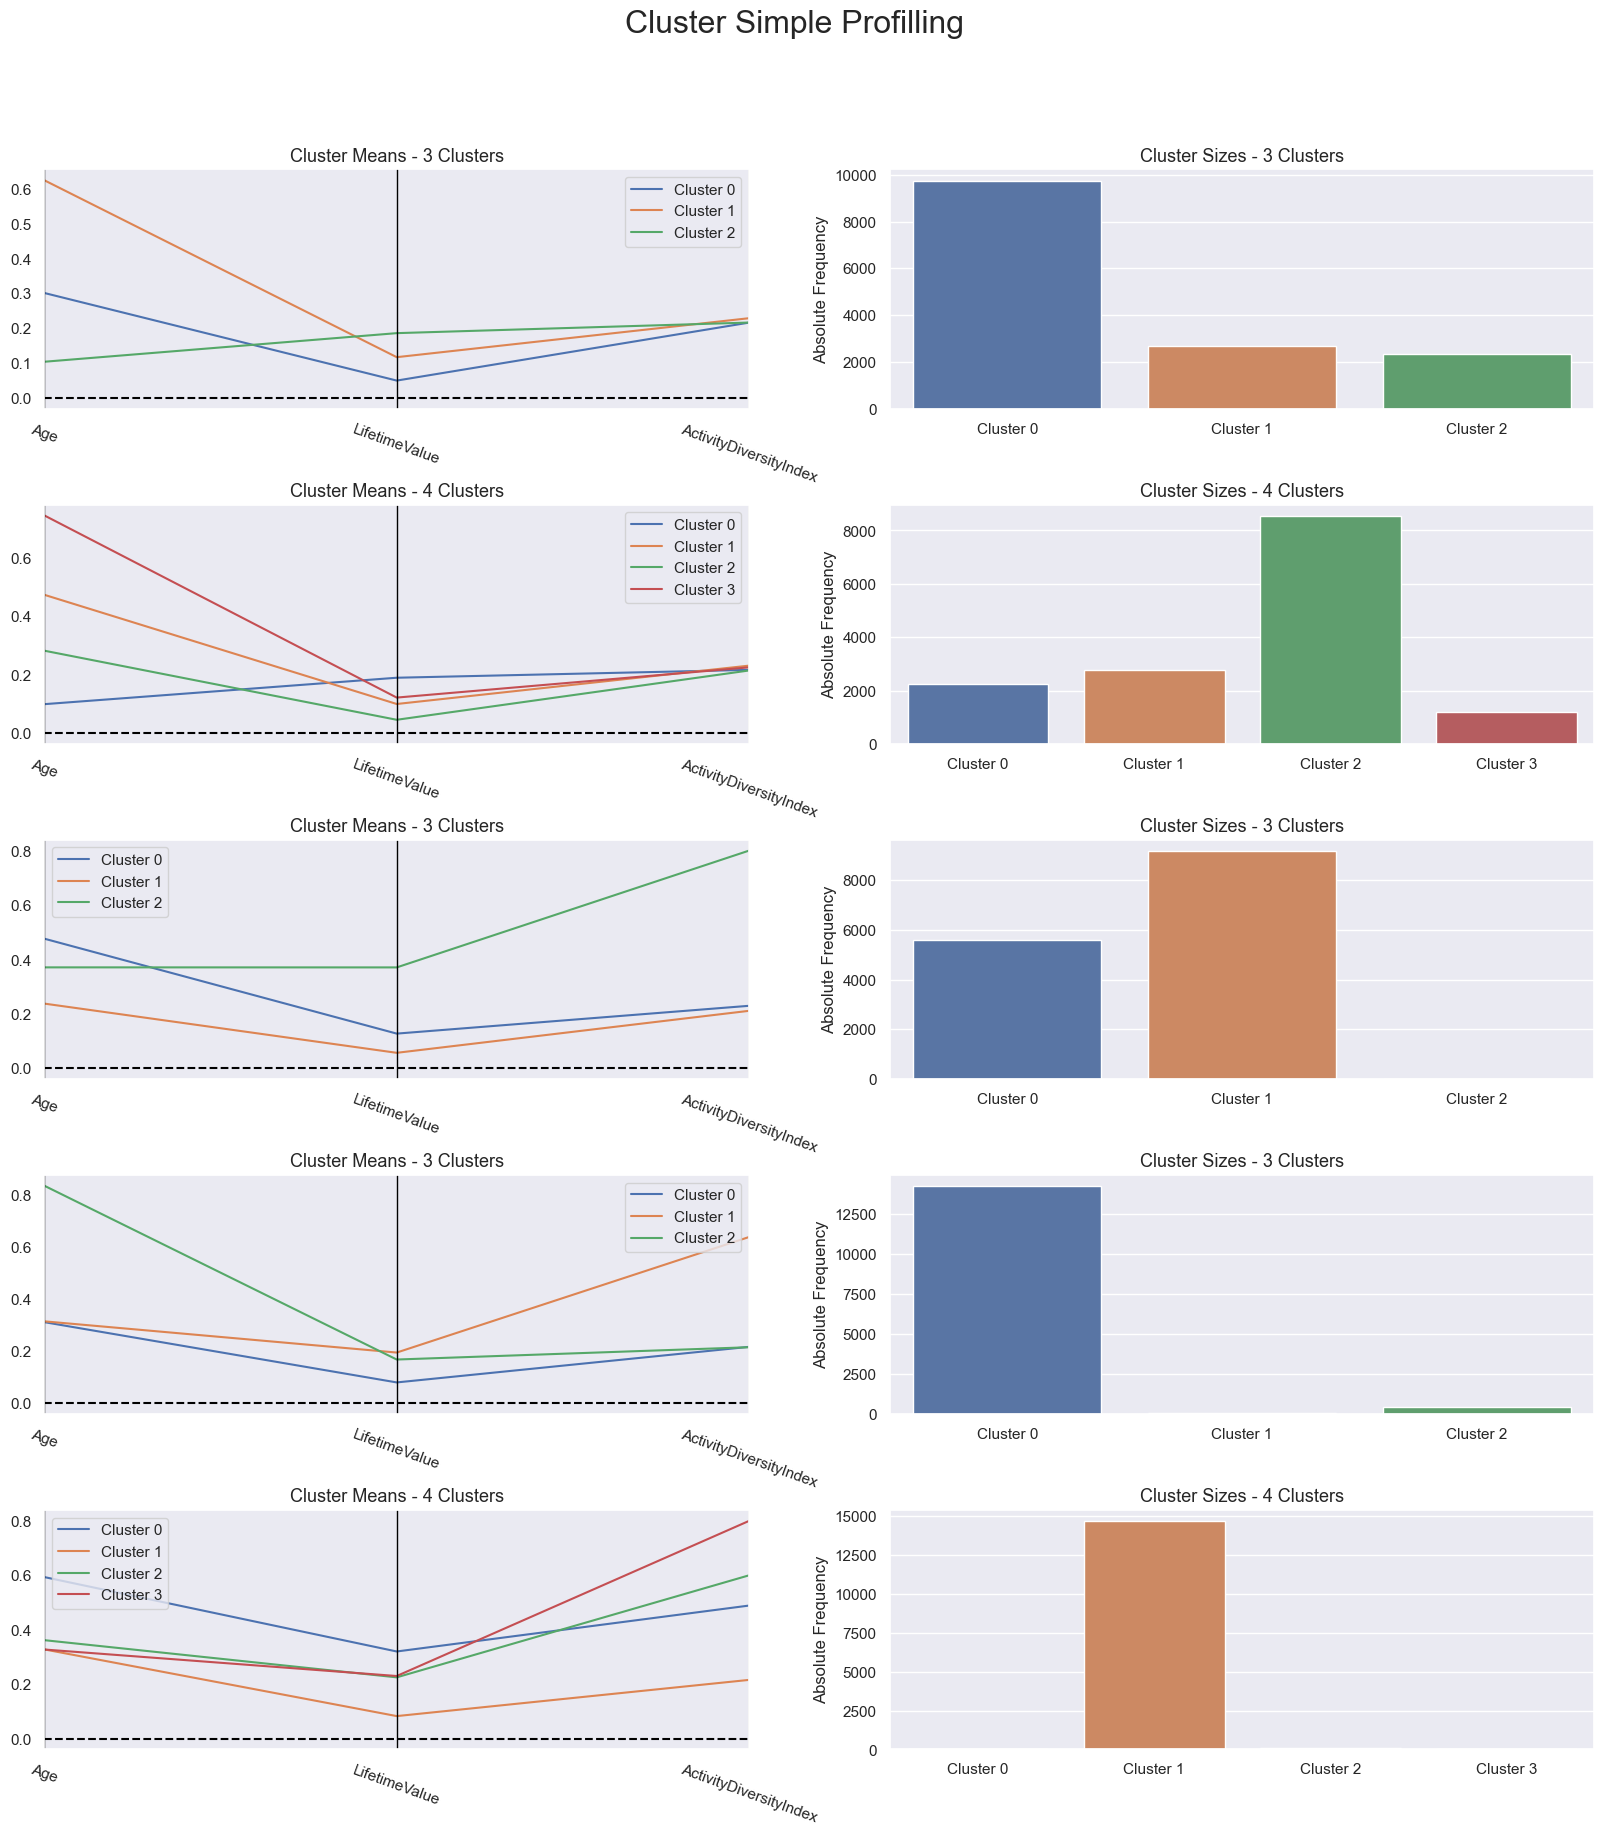

In [179]:
combined_df = pd.concat([df_socio1, df_socio2, df_somk_1, df_somh, df_dbscan], ignore_index=True)

label_columns = ['kmlust_labels', 'kmlust_labels22', 'som_kmeans_labels', 'som_hierar_labels', 'dbscan_labels']

cluster_profiles(combined_df, label_columns, figsize=(20, 20))

## 11.2 Engagement 

In [180]:
df_eng1 = df_ca[engagement_diversity_features]

### 11.2.1 Hierachical + K-means

In [181]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [182]:
df_eng1.isna().sum()

NumberOfReferences               0
RatioOfRenewals                  0
RatioOfMontlhyFrequency          0
RatioOfMonthlyAttendedClasses    0
MembershipPlan                   0
dtype: int64

In [183]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_eng1, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_eng1, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2  0.333153  0.194523  0.005638  0.001681  0.289876
3  0.537456  0.222826  0.007319  0.012832  0.484465
4  0.609105  0.228474  0.032350  0.027657  0.569855
5  0.666866  0.230150  0.103679  0.072145  0.629085
6  0.721676  0.435528  0.104110  0.076350  0.677739
7  0.754938  0.453938  0.116497  0.077866  0.719577
8  0.780950  0.463591  0.229549  0.078702  0.744964
9  0.804181  0.478406  0.232302  0.078770  0.767704

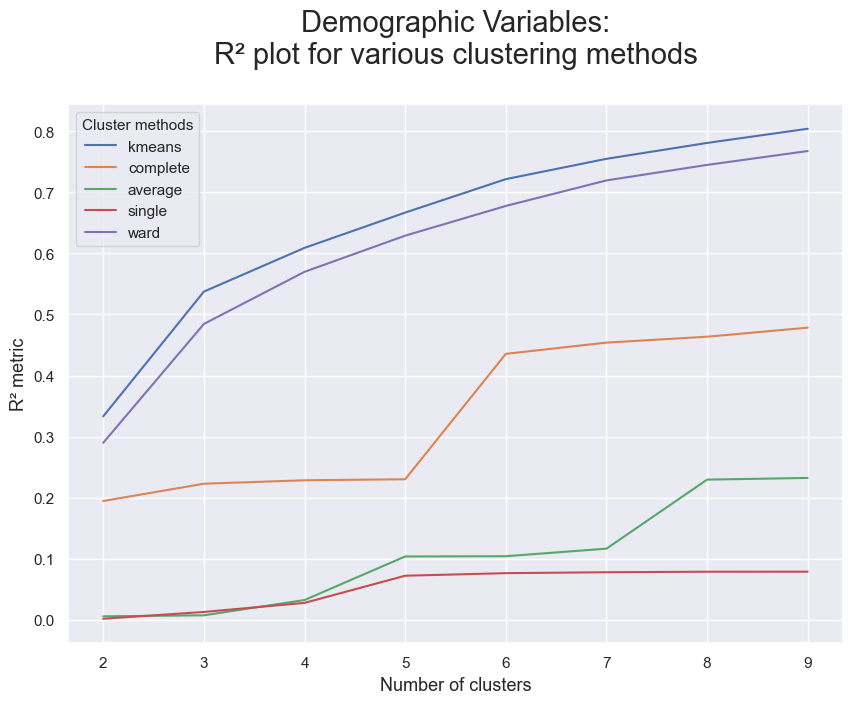

In [184]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

In [185]:
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_eng1)

KMeans(n_clusters=4, n_init=15, random_state=1)

For n_clusters = 2, the average silhouette_score is : 0.39324353199581497
For n_clusters = 3, the average silhouette_score is : 0.42559637182845517
For n_clusters = 4, the average silhouette_score is : 0.40287480268289744
For n_clusters = 5, the average silhouette_score is : 0.380787499783935
For n_clusters = 6, the average silhouette_score is : 0.40247265995718073
For n_clusters = 7, the average silhouette_score is : 0.4247734237006153
For n_clusters = 8, the average silhouette_score is : 0.4323373214520632
For n_clusters = 9, the average silhouette_score is : 0.3978826029607007
For n_clusters = 10, the average silhouette_score is : 0.41601783307544193


<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

<Figure size 1300x700 with 0 Axes>

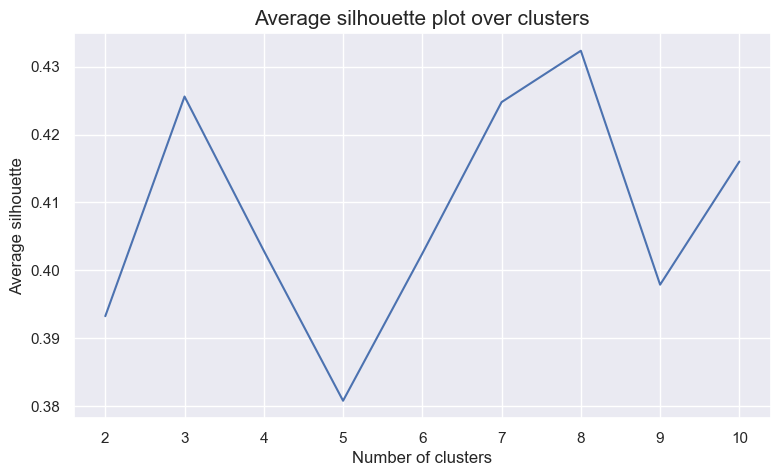

In [186]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

range_clusters = range(1, 11)

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_eng1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_eng1, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], ## Plot X-axis; Why range_clusters[1:] ? Remember we skipped k=1 in the cell above
         avg_silhouette)     ## Plot Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [187]:
# Re-running the Hierarchical clustering based on the correct number of clusters
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust_labels = kmclust.fit_predict(df_eng1)
df_eng1['kmlust_labels'] = kmclust_labels

df_eng1

C:\Users\carla\AppData\Local\Temp\ipykernel_24136\2465672552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng1['kmlust_labels'] = kmclust_labels


NumberOfReferences  RatioOfRenewals  RatioOfMontlhyFrequency  \
0                     0.0         0.000000                 0.200000   
1                     0.0         0.307692                 0.078622   
2                     0.0         0.000000                 0.266667   
3                     0.0         0.000000                 0.177778   
4                     0.0         0.230769                 0.070089   
...                   ...              ...                      ...   
14751                 0.0         0.000000                 0.000000   
14752                 0.0         0.000000                 0.281467   
14753                 0.0         0.000000                 0.266667   
14754                 0.0         0.000000                 0.000000   
14755                 0.0         0.205128                 0.192578   

       RatioOfMonthlyAttendedClasses  MembershipPlan  kmlust_labels  
0                           0.194444        0.109444              2  
1                           0.004274        0.090303              3  
2                           0.000000        0.092112              2  
3                           0.022222        0.076139              0  
4                           0.000000        0.035164              3  
...                              ...             ...            ...  
14751                       0.000000        0.000000              0  
14752                       0.000000        0.093595              2  
14753                       0.000000        0.106810              2  
14754                       0.000000        0.000000              0  
14755                       0.001425        0.057765              3  

[14756 rows x 6 columns]

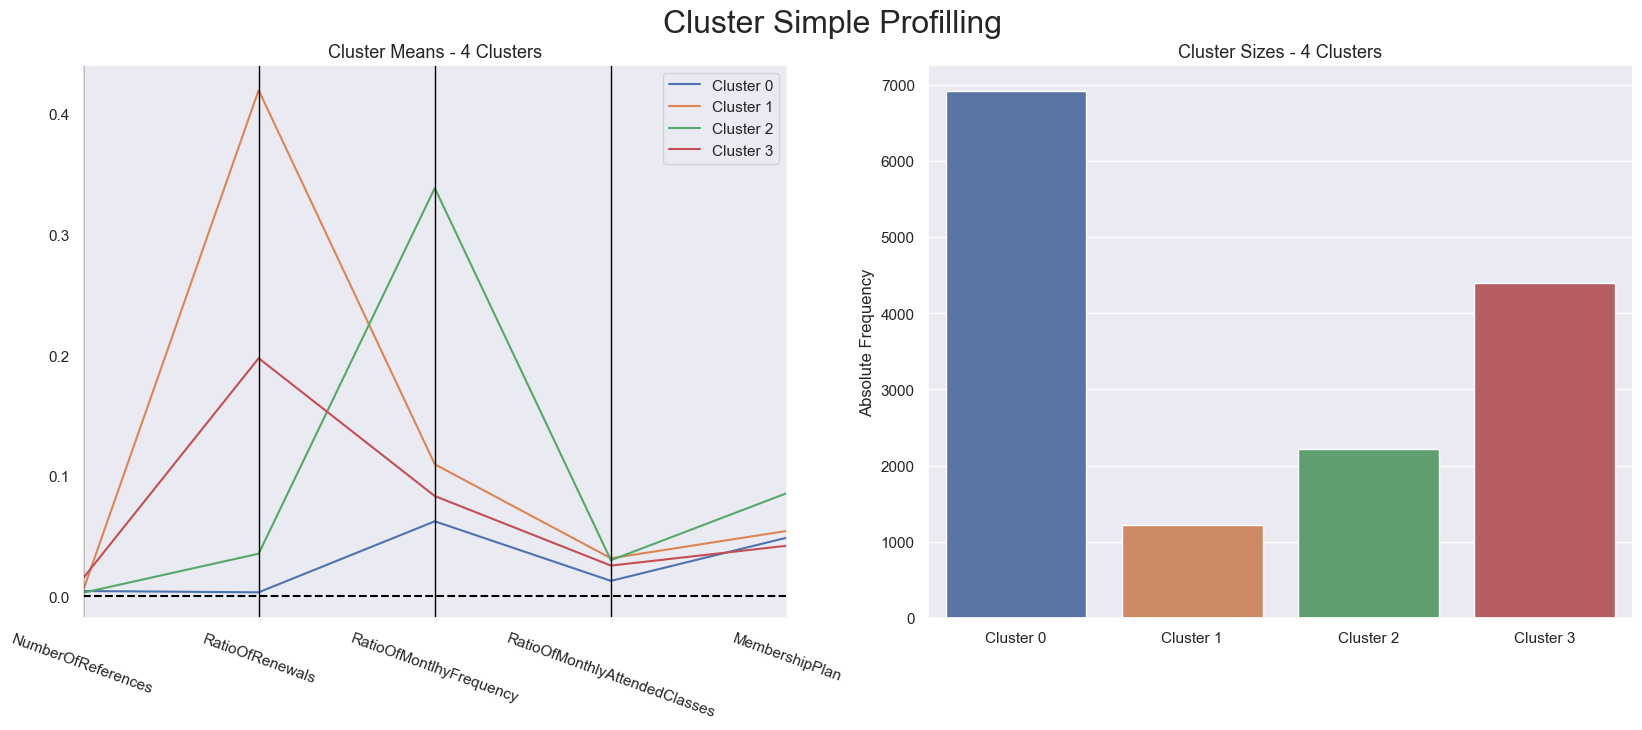

In [188]:
cluster_profiles(df_eng1, ['kmlust_labels'], (20,7))

### SOM + K-means

In [189]:
df_eng2 = df_ca[engagement_diversity_features]

In [190]:
np.random.seed(80)

sm = sompy.SOMFactory().build(
    df_eng2.values, 
    mapsize=[10, 10], 
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=engagement_diversity_features
)
sm.train(n_job=1, verbose='info', train_rough_len=120, train_finetune_len=120)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 120

 epoch: 1 ---> elapsed time:  0.037000, quantization error: 6.821862

 epoch: 2 ---> elapsed time:  0.038000, quantization error: 1.826448

 epoch: 3 ---> elapsed time:  0.034000, quantization error: 1.752636

 epoch: 4 ---> elapsed time:  0.041000, quantization error: 1.723579

 epoch: 5 ---> elapsed time:  0.039000, quantization error: 1.698745

 epoch: 6 ---> elapsed time:  0.039000, quantization error: 1.687085

 epoch: 7 ---> elapsed time:  0.036000, quantization error: 1.682081

 epoch: 8 ---> elapsed time:  0.038000, quantization error: 1.677765

 epoch: 9 ---> elapsed time:  0.038000, quantization error: 1.672991

 epoch: 10 ---> elapsed time:  0.036000, quantization error: 1.669046

 epoch: 11 ---> elapsed time:  0.036000, quantization error: 1.666127

 epoch: 12 ---> elapsed time:  0.034000, quantization error: 1.663561

 epoch: 13 ---> 

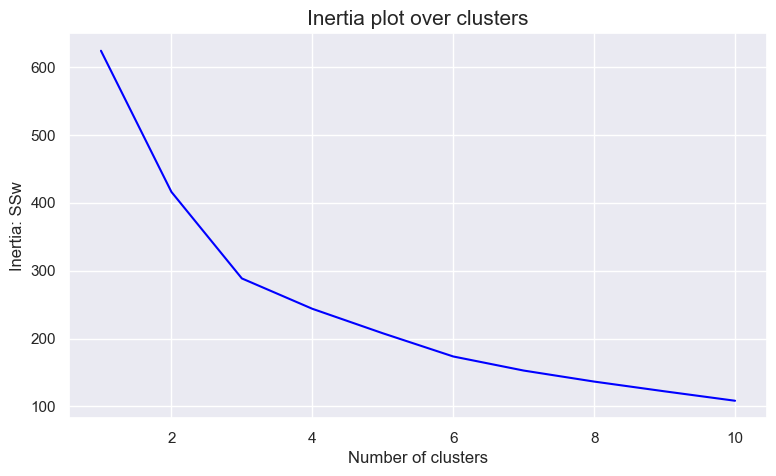

In [191]:
inertia = []
for n_clus in range(1,11): 
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=80)
    kmclust.fit(df_eng2)
    inertia.append(kmclust.inertia_)

plt.figure(figsize=(9,5))
plt.plot(range(1,11),inertia,color = 'blue')
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

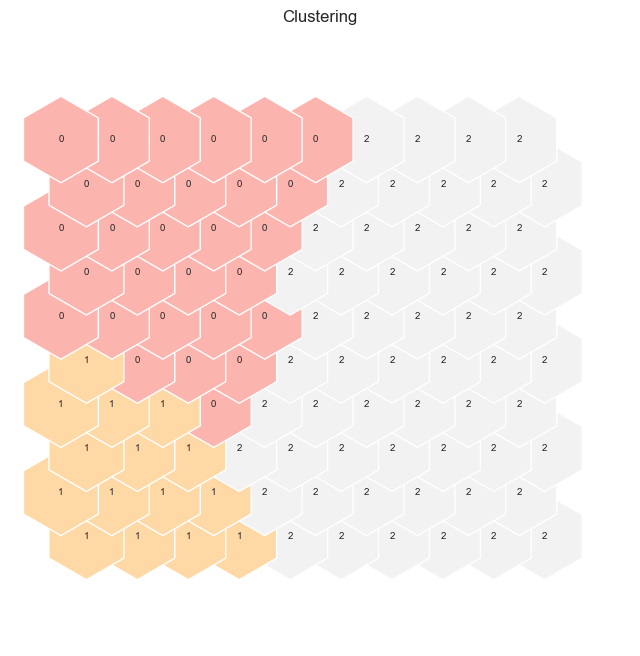

In [192]:
kmeans = KMeans(n_clusters=3,init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(8,8,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [193]:
nodes = sm.codebook.matrix

df_somk = pd.DataFrame(nodes, columns=engagement_diversity_features)
df_somk['som_kmeans_labels'] = nodeclus_labels
df_somk


NumberOfReferences  RatioOfRenewals  RatioOfMontlhyFrequency  \
0            -0.128856        -0.603606                -0.743326   
1            -0.128828        -0.650775                -0.700944   
2            -0.128760        -0.675237                -0.624876   
3            -0.128650        -0.686306                -0.517488   
4            -0.128493        -0.688874                -0.384207   
..                 ...              ...                      ...   
95           -0.035910         0.792851                 0.010075   
96            0.078081         0.847184                -0.100406   
97            0.389981         0.763870                -0.021530   
98            1.429715         0.434481                 0.073069   
99            2.900056         0.233802                 0.121486   

    RatioOfMonthlyAttendedClasses  MembershipPlan  som_kmeans_labels  
0                       -0.350346       -0.762736                  2  
1                       -0.344761       -0.608393                  2  
2                       -0.334957       -0.346898                  2  
3                       -0.324208       -0.002214                  2  
4                       -0.308234        0.365312                  0  
..                            ...             ...                ...  
95                       0.242705        0.130653                  2  
96                       0.799511        0.269914                  1  
97                       1.340688        0.349897                  1  
98                       1.636517        0.408842                  1  
99                       1.813491        0.407146                  1  

[100 rows x 6 columns]

In [194]:
bmus_map = sm.find_bmu(df_eng2.values)[0]  #get bmus for each observation in df

In [195]:
df_bmus = pd.DataFrame(
    np.concatenate((df_eng2, np.expand_dims(bmus_map,1)), axis=1),
    index=df_eng2.index, columns=np.append(df_eng2.columns,"BMU")
)
df_bmus

NumberOfReferences  RatioOfRenewals  RatioOfMontlhyFrequency  \
0                     0.0         0.000000                 0.200000   
1                     0.0         0.307692                 0.078622   
2                     0.0         0.000000                 0.266667   
3                     0.0         0.000000                 0.177778   
4                     0.0         0.230769                 0.070089   
...                   ...              ...                      ...   
14751                 0.0         0.000000                 0.000000   
14752                 0.0         0.000000                 0.281467   
14753                 0.0         0.000000                 0.266667   
14754                 0.0         0.000000                 0.000000   
14755                 0.0         0.205128                 0.192578   

       RatioOfMonthlyAttendedClasses  MembershipPlan   BMU  
0                           0.194444        0.109444  65.0  
1                           0.004274        0.090303  75.0  
2                           0.000000        0.092112  56.0  
3                           0.022222        0.076139  56.0  
4                           0.000000        0.035164  75.0  
...                              ...             ...   ...  
14751                       0.000000        0.000000  65.0  
14752                       0.000000        0.093595  56.0  
14753                       0.000000        0.106810  56.0  
14754                       0.000000        0.000000  65.0  
14755                       0.001425        0.057765  65.0  

[14756 rows x 6 columns]

In [196]:
df_somk_1 = df_bmus.merge(df_somk['som_kmeans_labels'], 'left', left_on="BMU", right_index=True)

df_somk_1.drop('BMU', axis=1, inplace=True)

In [197]:
df_somk_1.groupby('som_kmeans_labels')[engagement_diversity_features].mean()

NumberOfReferences  RatioOfRenewals  \
som_kmeans_labels                                        
0                            0.001757         0.002464   
1                            0.000000         0.083333   
2                            0.007907         0.118486   

                   RatioOfMontlhyFrequency  RatioOfMonthlyAttendedClasses  \
som_kmeans_labels                                                           
0                                 0.303512                       0.021836   
1                                 0.759267                       0.905093   
2                                 0.079132                       0.020246   

                   MembershipPlan  
som_kmeans_labels                  
0                        0.092339  
1                        0.150345  
2                        0.045339

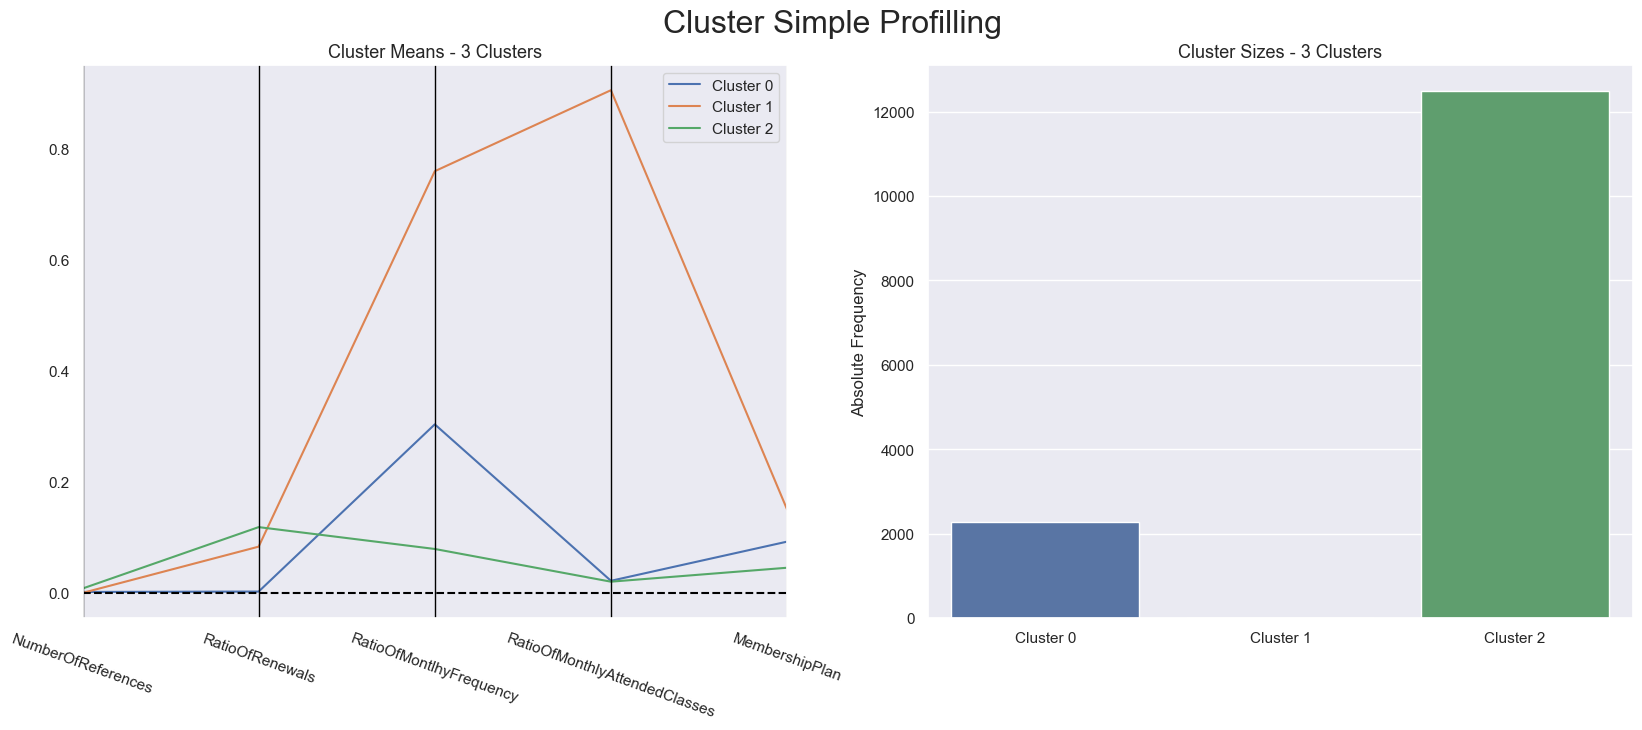

In [198]:
cluster_profiles(df_somk_1, ['som_kmeans_labels'], (20,7))

### SOM + Hierarquical

In [199]:
df_eng3 = df_ca[engagement_diversity_features]

In [200]:
np.random.seed(80)

sm = sompy.SOMFactory().build(
    df_eng3.values, 
    mapsize=[10, 10], 
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=engagement_diversity_features
)
sm.train(n_job=1, verbose='info', train_rough_len=120, train_finetune_len=120)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 120

 epoch: 1 ---> elapsed time:  0.034000, quantization error: 6.821862

 epoch: 2 ---> elapsed time:  0.036000, quantization error: 1.826448

 epoch: 3 ---> elapsed time:  0.035000, quantization error: 1.752636

 epoch: 4 ---> elapsed time:  0.044000, quantization error: 1.723579

 epoch: 5 ---> elapsed time:  0.037000, quantization error: 1.698745

 epoch: 6 ---> elapsed time:  0.037000, quantization error: 1.687085

 epoch: 7 ---> elapsed time:  0.035000, quantization error: 1.682081

 epoch: 8 ---> elapsed time:  0.035000, quantization error: 1.677765

 epoch: 9 ---> elapsed time:  0.049000, quantization error: 1.672991

 epoch: 10 ---> elapsed time:  0.053000, quantization error: 1.669046

 epoch: 11 ---> elapsed time:  0.036000, quantization error: 1.666127

 epoch: 12 ---> elapsed time:  0.037000, quantization error: 1.663561

 epoch: 13 ---> 

 epoch: 22 ---> elapsed time:  0.036000, quantization error: 1.632790

 epoch: 23 ---> elapsed time:  0.037000, quantization error: 1.629932

 epoch: 24 ---> elapsed time:  0.034000, quantization error: 1.627012

 epoch: 25 ---> elapsed time:  0.033000, quantization error: 1.624032

 epoch: 26 ---> elapsed time:  0.036000, quantization error: 1.620996

 epoch: 27 ---> elapsed time:  0.034000, quantization error: 1.617897

 epoch: 28 ---> elapsed time:  0.035000, quantization error: 1.614728

 epoch: 29 ---> elapsed time:  0.036000, quantization error: 1.611497

 epoch: 30 ---> elapsed time:  0.036000, quantization error: 1.608195

 epoch: 31 ---> elapsed time:  0.037000, quantization error: 1.604830

 epoch: 32 ---> elapsed time:  0.036000, quantization error: 1.601388

 epoch: 33 ---> elapsed time:  0.036000, quantization error: 1.597882

 epoch: 34 ---> elapsed time:  0.035000, quantization error: 1.594305

 epoch: 35 ---> elapsed time:  0.033000, quantization error: 1.590645

 epoch

In [201]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_eng3)

c:\Users\carla\anaconda3\envs\DM2324\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([ 9363, 10283, 14755, ...,     2,     1,     0], dtype=int64)

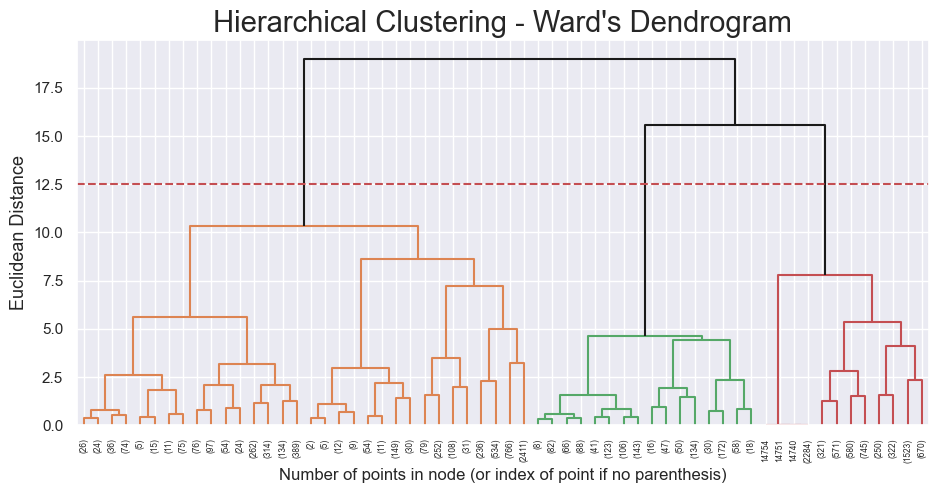

In [202]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 12.5
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

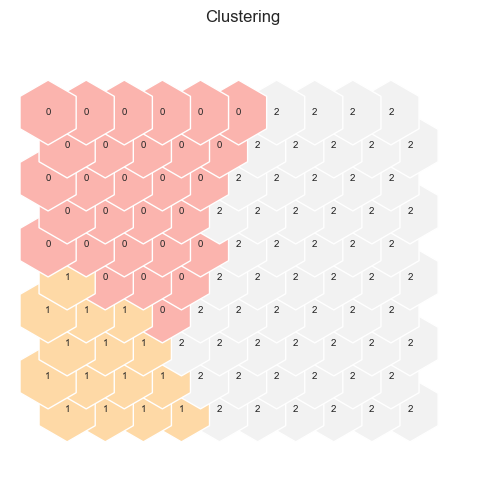

In [203]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
node_hier_label= hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(6,6,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [204]:
nodes = sm.codebook.matrix

hnodes = pd.DataFrame(nodes, columns=engagement_diversity_features)
hnodes['som_hierar_labels'] = node_hier_label
hnodes

NumberOfReferences  RatioOfRenewals  RatioOfMontlhyFrequency  \
0            -0.128856        -0.603606                -0.743326   
1            -0.128828        -0.650775                -0.700944   
2            -0.128760        -0.675237                -0.624876   
3            -0.128650        -0.686306                -0.517488   
4            -0.128493        -0.688874                -0.384207   
..                 ...              ...                      ...   
95           -0.035910         0.792851                 0.010075   
96            0.078081         0.847184                -0.100406   
97            0.389981         0.763870                -0.021530   
98            1.429715         0.434481                 0.073069   
99            2.900056         0.233802                 0.121486   

    RatioOfMonthlyAttendedClasses  MembershipPlan  som_hierar_labels  
0                       -0.350346       -0.762736                  0  
1                       -0.344761       -0.608393                  0  
2                       -0.334957       -0.346898                  0  
3                       -0.324208       -0.002214                  0  
4                       -0.308234        0.365312                  2  
..                            ...             ...                ...  
95                       0.242705        0.130653                  0  
96                       0.799511        0.269914                  1  
97                       1.340688        0.349897                  1  
98                       1.636517        0.408842                  1  
99                       1.813491        0.407146                  1  

[100 rows x 6 columns]

In [205]:
bmus_ = sm.find_bmu(df_eng3.values)[0]

In [206]:
df_bmus = pd.DataFrame(
    np.concatenate((df_eng3, np.expand_dims(bmus_,1)), axis=1),
    index=df_eng3.index, columns=np.append(df_eng3.columns,"BMU")
)
df_bmus

NumberOfReferences  RatioOfRenewals  RatioOfMontlhyFrequency  \
0                     0.0         0.000000                 0.200000   
1                     0.0         0.307692                 0.078622   
2                     0.0         0.000000                 0.266667   
3                     0.0         0.000000                 0.177778   
4                     0.0         0.230769                 0.070089   
...                   ...              ...                      ...   
14751                 0.0         0.000000                 0.000000   
14752                 0.0         0.000000                 0.281467   
14753                 0.0         0.000000                 0.266667   
14754                 0.0         0.000000                 0.000000   
14755                 0.0         0.205128                 0.192578   

       RatioOfMonthlyAttendedClasses  MembershipPlan   BMU  
0                           0.194444        0.109444  65.0  
1                           0.004274        0.090303  75.0  
2                           0.000000        0.092112  56.0  
3                           0.022222        0.076139  56.0  
4                           0.000000        0.035164  75.0  
...                              ...             ...   ...  
14751                       0.000000        0.000000  65.0  
14752                       0.000000        0.093595  56.0  
14753                       0.000000        0.106810  56.0  
14754                       0.000000        0.000000  65.0  
14755                       0.001425        0.057765  65.0  

[14756 rows x 6 columns]

In [207]:
# Get cluster labels for each observation
df_somh = df_bmus.merge(hnodes['som_hierar_labels'], 'left', left_on="BMU", right_index=True)

df_somh.drop('BMU', axis=1, inplace=True)

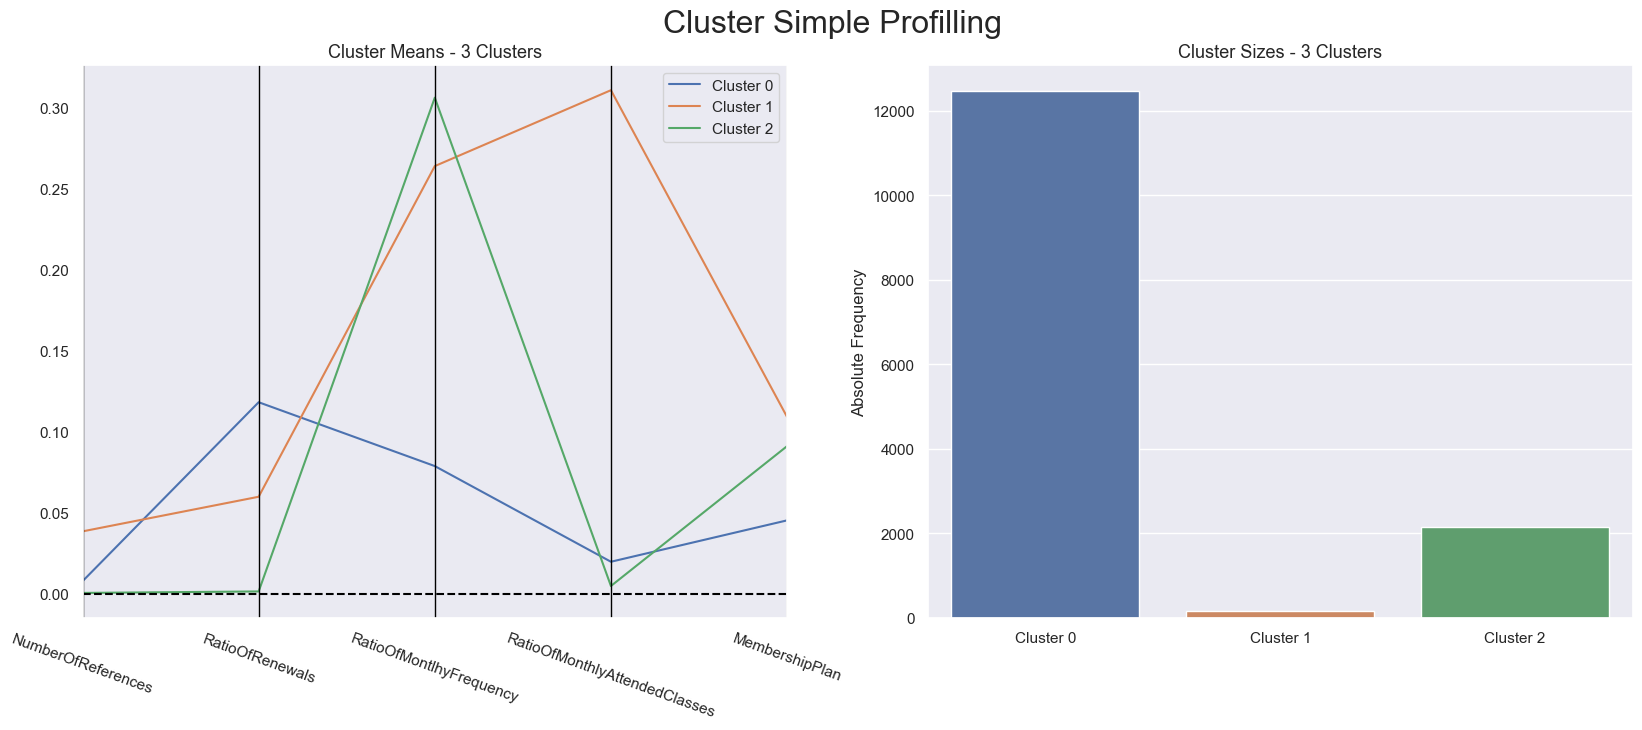

In [208]:
cluster_profiles(df_somh, ['som_hierar_labels'], (20,7))

### DBSCAN

In [209]:
df_eng4 = df_ca[engagement_diversity_features]

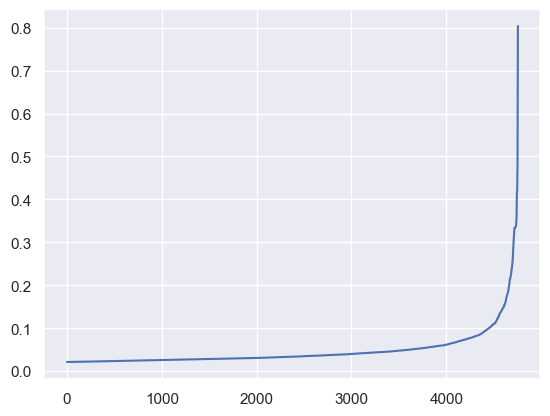

In [210]:
# Radius of cluster
neigh = NearestNeighbors(n_neighbors=27)
neigh.fit(df_eng4)
distances, _ = neigh.kneighbors(df_eng4)
distances = np.sort(distances[:, -1])
plt.plot(distances[10000:])
plt.show()

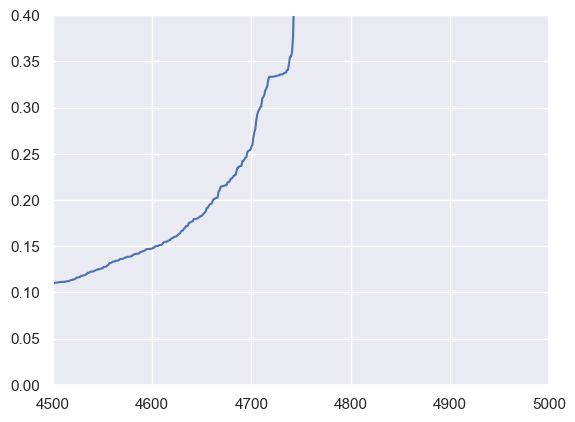

In [211]:
plt.plot(distances[10000:])
plt.axis([4500, 5000, 0,0.4])
plt.show()

In [212]:
for min_samples in range(2, 15):  
        dbscan = DBSCAN(eps=0.35, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df_eng4)
            
        dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
            
        n_noise = list(dbscan_labels).count(-1)
            
        if dbscan_n_clusters > 0:
            print(f"min_samples: {min_samples}, clusters: {dbscan_n_clusters}, noise:{n_noise}")

min_samples: 2, clusters: 1, noise:1
min_samples: 3, clusters: 1, noise:1
min_samples: 4, clusters: 1, noise:1
min_samples: 5, clusters: 1, noise:1
min_samples: 6, clusters: 1, noise:3
min_samples: 7, clusters: 1, noise:3
min_samples: 8, clusters: 1, noise:3
min_samples: 9, clusters: 1, noise:3
min_samples: 10, clusters: 1, noise:3
min_samples: 11, clusters: 1, noise:3
min_samples: 12, clusters: 1, noise:3
min_samples: 13, clusters: 1, noise:3
min_samples: 14, clusters: 1, noise:3


In [213]:
dbscan = DBSCAN(eps=0.35, min_samples= 2,n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_eng4)

dbscan_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_clusters)

Number of estimated clusters : 2


In [214]:
df_dbscan = pd.concat([df_eng4, pd.Series(dbscan_labels, name='dbscan_labels', index=df_eng4.index)], axis=1)

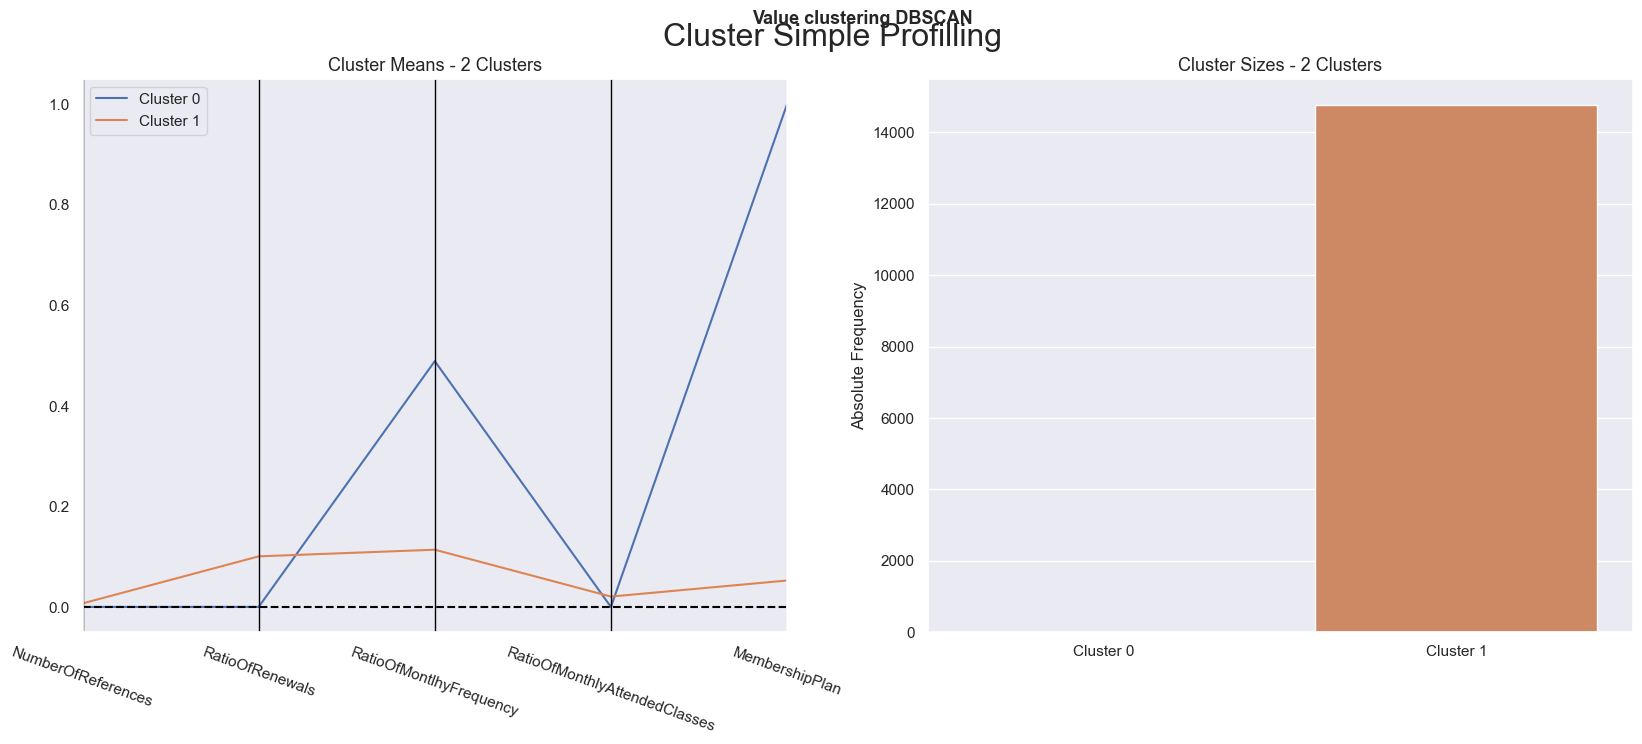

In [215]:
cluster_profiles(
    df = df_dbscan, 
    label_columns = ['dbscan_labels'], 
    figsize = (20, 7), 
    compar_titles = ["Value clustering DBSCAN"]
)

In [216]:
df_dbscan.groupby('dbscan_labels')[engagement_diversity_features].mean()

NumberOfReferences  RatioOfRenewals  RatioOfMontlhyFrequency  \
dbscan_labels                                                                 
-1                       0.000000         0.000000                 0.488889   
 0                       0.006958         0.100592                 0.113807   

               RatioOfMonthlyAttendedClasses  MembershipPlan  
dbscan_labels                                                 
-1                                  0.000000        1.000000  
 0                                  0.020613        0.052538

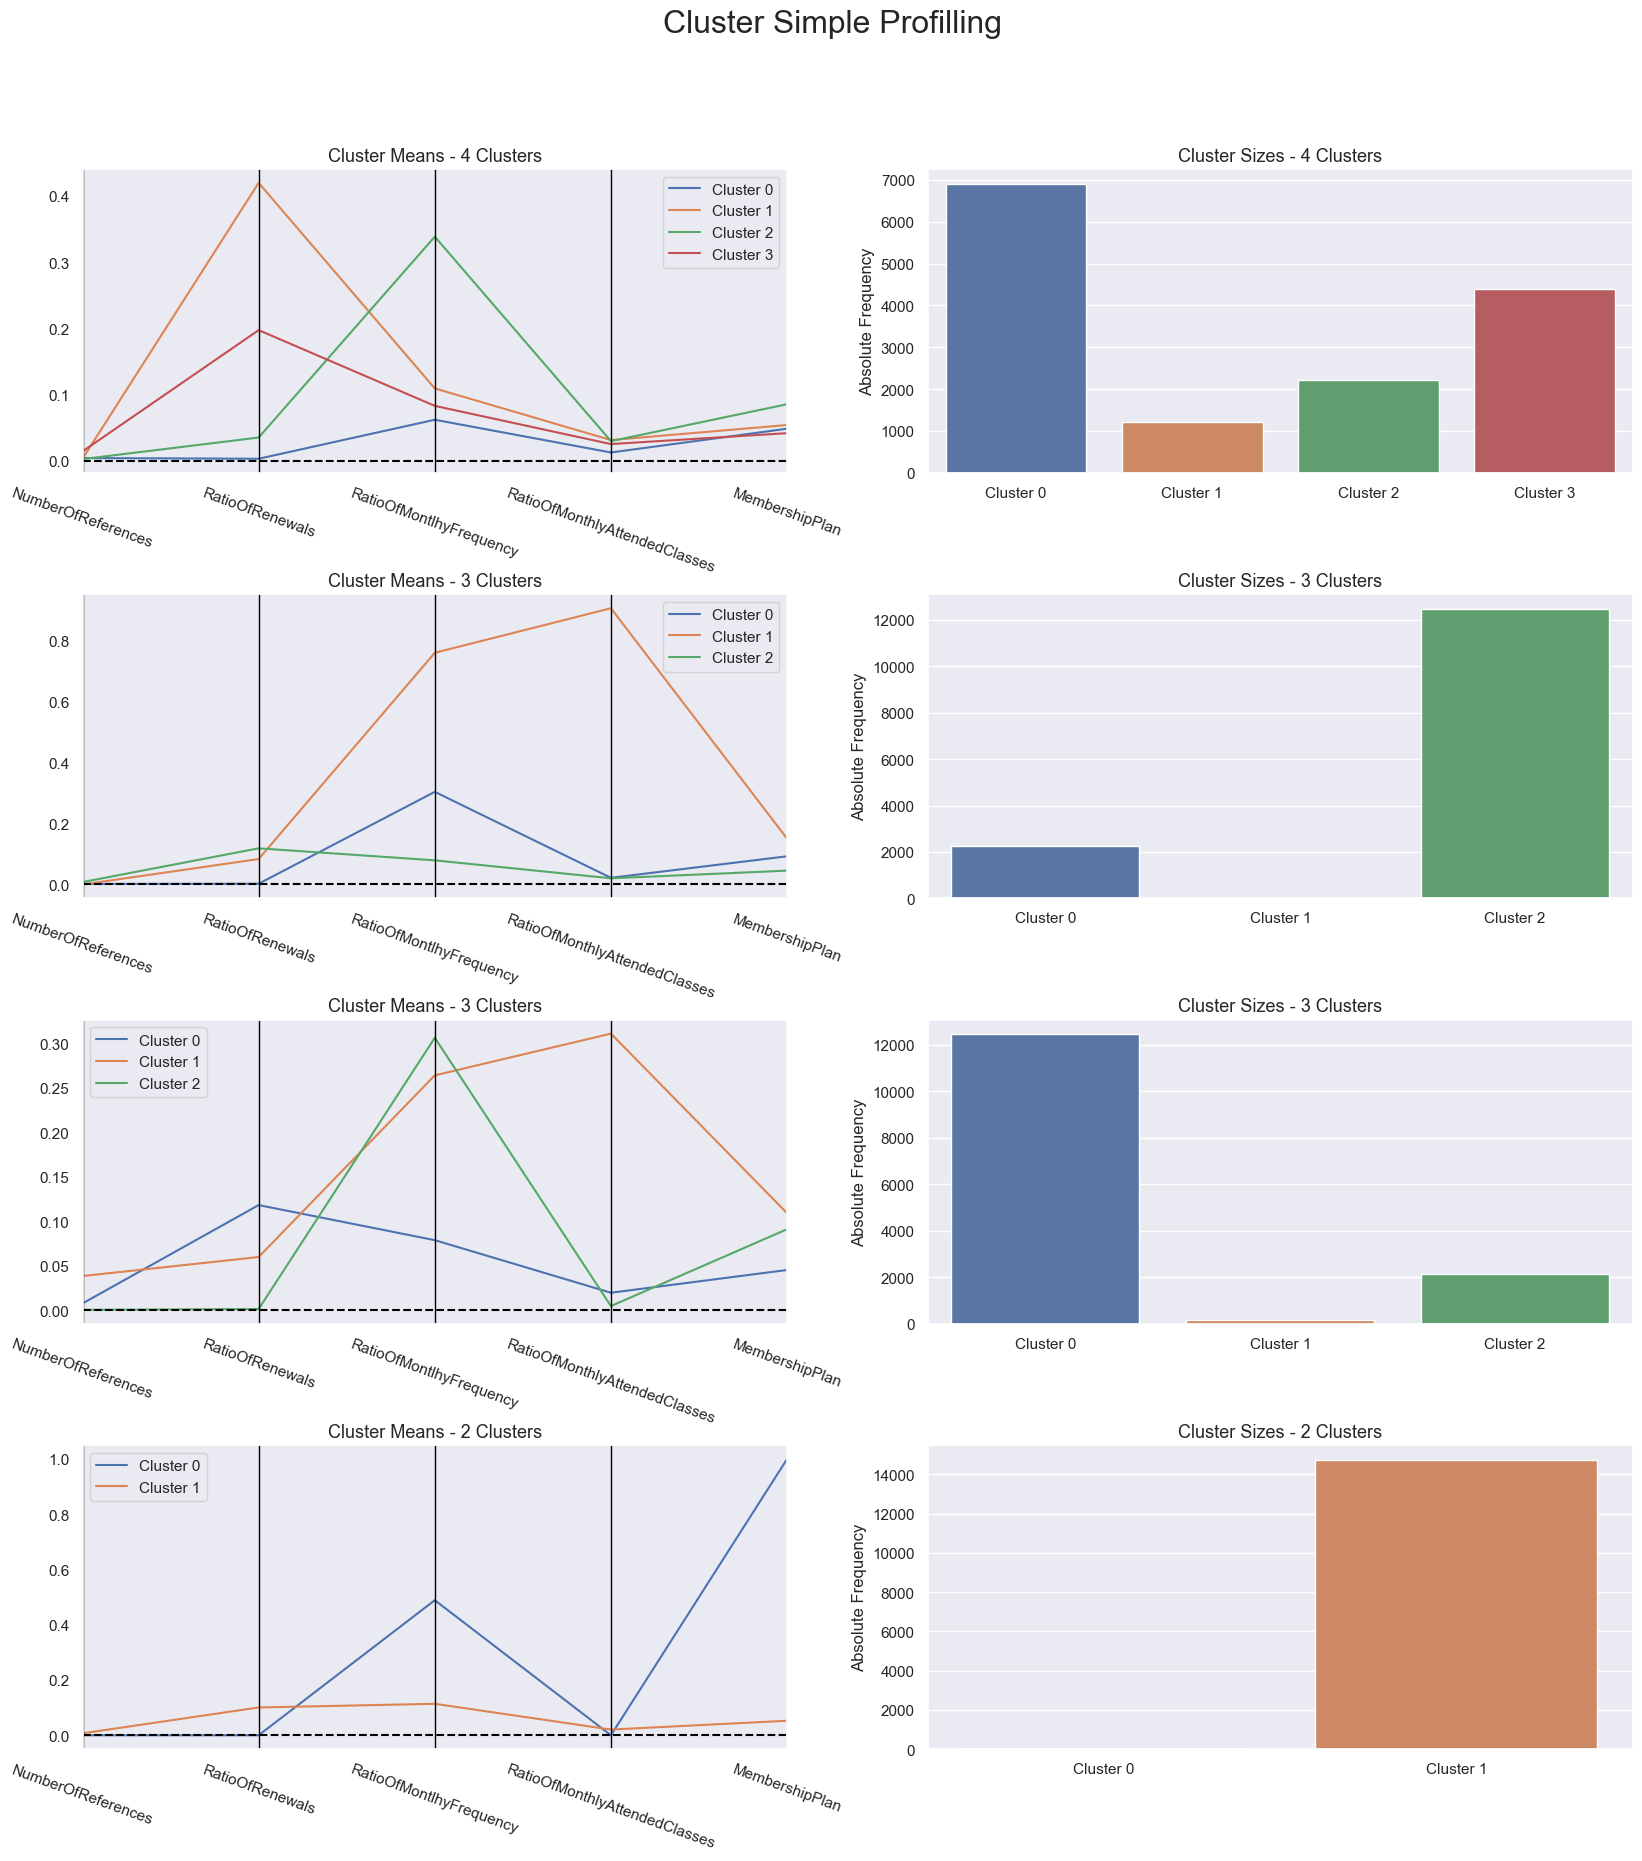

In [217]:
combined_df = pd.concat([df_eng1, df_somk_1, df_somh, df_dbscan], ignore_index=True)


label_columns = ['kmlust_labels', 'som_kmeans_labels', 'som_hierar_labels', 'dbscan_labels']

cluster_profiles(combined_df, label_columns, figsize=(20, 20))


# 12.Mergin the Perspectives

In [218]:
df_socio = df_ca[sociodemographic_value_features]
df_3 = df_ca[engagement_diversity_features]

In [219]:
df_socio = df_socio.reset_index(drop=True)
df_3 = df_3.reset_index(drop=True)

df_analysis = pd.concat([df_socio, df_3], axis=1)
df_analysis

Age  LifetimeValue  ActivityDiversityIndex  NumberOfReferences  \
0      0.759494       0.025178                     0.2                 0.0   
1      0.367089       0.136656                     0.2                 0.0   
2      0.291139       0.010380                     0.2                 0.0   
3      0.113924       0.044065                     0.2                 0.0   
4      0.443038       0.106345                     0.2                 0.0   
...         ...            ...                     ...                 ...   
14751  0.177215       0.417246                     0.2                 0.0   
14752  0.493671       0.097953                     0.2                 0.0   
14753  0.253165       0.012096                     0.2                 0.0   
14754  0.696203       0.225129                     0.2                 0.0   
14755  0.405063       0.262589                     0.2                 0.0   

       RatioOfRenewals  RatioOfMontlhyFrequency  \
0             0.000000                 0.200000   
1             0.307692                 0.078622   
2             0.000000                 0.266667   
3             0.000000                 0.177778   
4             0.230769                 0.070089   
...                ...                      ...   
14751         0.000000                 0.000000   
14752         0.000000                 0.281467   
14753         0.000000                 0.266667   
14754         0.000000                 0.000000   
14755         0.205128                 0.192578   

       RatioOfMonthlyAttendedClasses  MembershipPlan  
0                           0.194444        0.109444  
1                           0.004274        0.090303  
2                           0.000000        0.092112  
3                           0.022222        0.076139  
4                           0.000000        0.035164  
...                              ...             ...  
14751                       0.000000        0.000000  
14752                       0.000000        0.093595  
14753                       0.000000        0.106810  
14754                       0.000000        0.000000  
14755                       0.001425        0.057765  

[14756 rows x 8 columns]

In [220]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
hclust_socio = KMeans(
    n_clusters=3, 
    init='k-means++', 
    n_init=15, 
    random_state=1)
     
hc_labels_final = hclust_socio.fit_predict(df_socio)

# final cluster solution
kmclust4 = KMeans(
    n_clusters=4, 
    init='k-means++', 
    n_init=15, 
    random_state=1)

km_labels_final = kmclust4.fit_predict(df_3)
km_labels_final

df_ca['Value_labels'] = hc_labels_final
df_ca['Recency_labels'] = km_labels_final
df_analysis['Value_labels'] = hc_labels_final
df_analysis['Recency_labels'] = km_labels_final
df_ca_analysis['Value_labels'] = hc_labels_final
df_ca_analysis['Recency_labels'] = km_labels_final


### Merging using Hierarchical clustering

In [221]:
# Centroids of the concatenated cluster labels
df_centroids = df_ca.groupby(['Value_labels', 'Recency_labels']).mean()
df_centroids

Age    Gender  DaysWithoutFrequency  \
Value_labels Recency_labels                                             
0            0               0.295749  0.368773              0.035679   
             1               0.309225  0.405204              0.049667   
             2               0.305464  0.437978              0.013388   
             3               0.304428  0.381956              0.090268   
1            0               0.636524  0.404341              0.031801   
             1               0.620992  0.341667              0.042782   
             2               0.619231  0.467933              0.014249   
             3               0.608879  0.361001              0.073563   
2            0               0.093734  0.475582              0.020958   
             1               0.069902  0.488889              0.038618   
             2               0.172285  0.421053              0.017337   
             3               0.121563  0.463284              0.076910   

                             LifetimeValue  UseByTime  AthleticsActivities  \
Value_labels Recency_labels                                                  
0            0                    0.041007   0.037823             0.007611   
             1                    0.040758   0.013631             0.004957   
             2                    0.046811   0.039976             0.005291   
             3                    0.067414   0.088489             0.005531   
1            0                    0.118203   0.023312             0.007235   
             1                    0.059437   0.025000             0.020833   
             2                    0.110347   0.102138             0.009501   
             3                    0.137022   0.138340             0.011858   
2            0                    0.191568   0.000000             0.007513   
             1                    0.079943   0.000000             0.000000   
             2                    0.195931   0.084211             0.000000   
             3                    0.200236   0.009346             0.009346   

                             WaterActivities  FitnessActivities  \
Value_labels Recency_labels                                       
0            0                      0.170203           0.653137   
             1                      0.182156           0.643123   
             2                      0.142857           0.829512   
             3                      0.160733           0.722433   
1            0                      0.278135           0.609325   
             1                      0.308333           0.554167   
             2                      0.277910           0.686461   
             3                      0.384717           0.613966   
2            0                      0.821187           0.021037   
             1                      0.866667           0.005556   
             2                      0.736842           0.147368   
             3                      0.774366           0.030708   

                             TeamActivities  RacketActivities  ...  \
Value_labels Recency_labels                                    ...   
0            0                     0.057426          0.016605  ...   
             1                     0.055762          0.032218  ...   
             2                     0.012934          0.017049  ...   
             3                     0.044590          0.035949  ...   
1            0                     0.032154          0.012058  ...   
             1                     0.000000          0.033333  ...   
             2                     0.014252          0.011876  ...   
             3                     0.022398          0.021080  ...   
2            0                     0.126972          0.024042  ...   
             1                     0.077778          0.033333  ...   
             2                     0.042105          0.126316  ...   
             3                     0.144192          0.028037  ...   

In [222]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

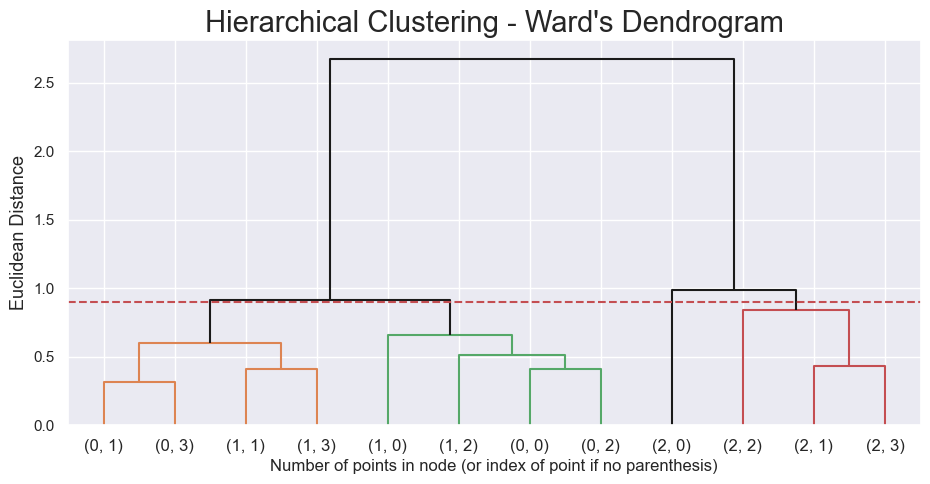

In [223]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 0.9
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [224]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age    Gender  DaysWithoutFrequency  \
Value_labels Recency_labels                                             
0            0               0.295749  0.368773              0.035679   
             1               0.309225  0.405204              0.049667   
             2               0.305464  0.437978              0.013388   
             3               0.304428  0.381956              0.090268   
1            0               0.636524  0.404341              0.031801   
             1               0.620992  0.341667              0.042782   
             2               0.619231  0.467933              0.014249   
             3               0.608879  0.361001              0.073563   
2            0               0.093734  0.475582              0.020958   
             1               0.069902  0.488889              0.038618   
             2               0.172285  0.421053              0.017337   
             3               0.121563  0.463284              0.076910   

                             LifetimeValue  UseByTime  AthleticsActivities  \
Value_labels Recency_labels                                                  
0            0                    0.041007   0.037823             0.007611   
             1                    0.040758   0.013631             0.004957   
             2                    0.046811   0.039976             0.005291   
             3                    0.067414   0.088489             0.005531   
1            0                    0.118203   0.023312             0.007235   
             1                    0.059437   0.025000             0.020833   
             2                    0.110347   0.102138             0.009501   
             3                    0.137022   0.138340             0.011858   
2            0                    0.191568   0.000000             0.007513   
             1                    0.079943   0.000000             0.000000   
             2                    0.195931   0.084211             0.000000   
             3                    0.200236   0.009346             0.009346   

                             WaterActivities  FitnessActivities  \
Value_labels Recency_labels                                       
0            0                      0.170203           0.653137   
             1                      0.182156           0.643123   
             2                      0.142857           0.829512   
             3                      0.160733           0.722433   
1            0                      0.278135           0.609325   
             1                      0.308333           0.554167   
             2                      0.277910           0.686461   
             3                      0.384717           0.613966   
2            0                      0.821187           0.021037   
             1                      0.866667           0.005556   
             2                      0.736842           0.147368   
             3                      0.774366           0.030708   

                             TeamActivities  RacketActivities  ...  \
Value_labels Recency_labels                                    ...   
0            0                     0.057426          0.016605  ...   
             1                     0.055762          0.032218  ...   
             2                     0.012934          0.017049  ...   
             3                     0.044590          0.035949  ...   
1            0                     0.032154          0.012058  ...   
             1                     0.000000          0.033333  ...   
             2                     0.014252          0.011876  ...   
             3                     0.022398          0.021080  ...   
2            0                     0.126972          0.024042  ...   
             1                     0.077778          0.033333  ...   
             2                     0.042105          0.126316  ...   
             3                     0.144192          0.028037  ...   

In [225]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df_ca.copy()
df_2 = df_analysis.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['Value_labels'], row['Recency_labels'])
    ], axis=1
)

df_2['merged_labels'] = df_2.apply(
    lambda row: cluster_mapper[
        (row['Value_labels'], row['Recency_labels'])
    ], axis=1
)
df_ca_analysis['merged_labels'] = df_ca_analysis.apply(
        lambda row: cluster_mapper[
        (row['Value_labels'], row['Recency_labels'])
    ], axis=1
)
# Merged cluster centroids
df_ca_analysis.groupby('merged_labels').mean()

Age    Gender  DaysWithoutFrequency  LifetimeValue  \
merged_labels                                                             
0               9.257812  0.463867            112.818359     626.202646   
1              29.278759  0.395222             50.532719     206.046806   
2               7.404959  0.475582             36.571751     671.231172   
3              29.277080  0.380506            136.409662     258.939196   

               UseByTime  AthleticsActivities  WaterActivities  \
merged_labels                                                    
0               0.014648             0.006836         0.787109   
1               0.039470             0.007141         0.187484   
2               0.000000             0.007513         0.821187   
3               0.080443             0.007236         0.208129   

               FitnessActivities  TeamActivities  RacketActivities  ...  \
merged_labels                                                       ...   
0                       0.037109        0.123047          0.038086  ...   
1                       0.686835        0.041158          0.015710  ...   
2                       0.021037        0.126972          0.024042  ...   
3                       0.682698        0.040647          0.032773  ...   

               NumberOfReferences   Dropout  TimeEnrolled_Months  \
merged_labels                                                      
0                        0.146484  0.990234            22.423828   
1                        0.004155  0.752921             4.736951   
2                        0.050338  0.268219             2.331330   
3                        0.012556  1.000000            17.495637   

               RatioOfMontlhyFrequency  RatioOfRenewals  \
merged_labels                                             
0                             2.282408         0.110298   
1                             3.255597         0.005719   
2                             0.635296         0.001678   
3                             2.029418         0.124046   

               RatioOfMonthlyAttendedClasses  ActivityDiversityIndex  \
merged_labels                                                          
0                                   1.599130                1.095703   
1                                   0.236939                1.078551   
2                                   0.456833                1.071375   
3                                   0.298807                1.120664   

               MembershipPlan  Value_labels  Recency_labels  
merged_labels                                                
0                   30.069960      2.000000        2.555664  
1                   24.769811      0.216178        0.551026  
2                   14.817019      2.000000        0.000000  
3                   16.079070      0.212598        2.554373  

[4 rows x 27 columns]

In [226]:
df_ca_analysis.groupby('merged_labels')[['Age', 'LifetimeValue', 'ActivityDiversityIndex', 'NumberOfReferences', 'RatioOfRenewals', 'RatioOfMontlhyFrequency', 'RatioOfMonthlyAttendedClasses', 'MembershipPlan']].mean().T

merged_labels                           0           1           2           3
Age                              9.257812   29.278759    7.404959    29.27708
LifetimeValue                  626.202646  206.046806  671.231172  258.939196
ActivityDiversityIndex           1.095703    1.078551    1.071375    1.120664
NumberOfReferences               0.146484    0.004155    0.050338    0.012556
RatioOfRenewals                  0.110298    0.005719    0.001678    0.124046
RatioOfMontlhyFrequency          2.282408    3.255597    0.635296    2.029418
RatioOfMonthlyAttendedClasses     1.59913    0.236939    0.456833    0.298807
MembershipPlan                   30.06996   24.769811   14.817019    16.07907

In [227]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['Value_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['Recency_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='Recency_labels', columns='Value_labels')

Value_labels         1       2
Recency_labels                
0                  NaN  1331.0
2               7702.0     NaN
3               4699.0  1024.0

In [228]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  float64
 1   Gender                         14756 non-null  float64
 2   DaysWithoutFrequency           14756 non-null  float64
 3   LifetimeValue                  14756 non-null  float64
 4   UseByTime                      14756 non-null  float64
 5   AthleticsActivities            14756 non-null  float64
 6   WaterActivities                14756 non-null  float64
 7   FitnessActivities              14756 non-null  float64
 8   TeamActivities                 14756 non-null  float64
 9   RacketActivities               14756 non-null  float64
 10  CombatActivities               14756 non-null  float64
 11  SpecialActivities              14756 non-null  float64
 12  OtherActivities                14756 non-null 

# 13.Cluster Analysis

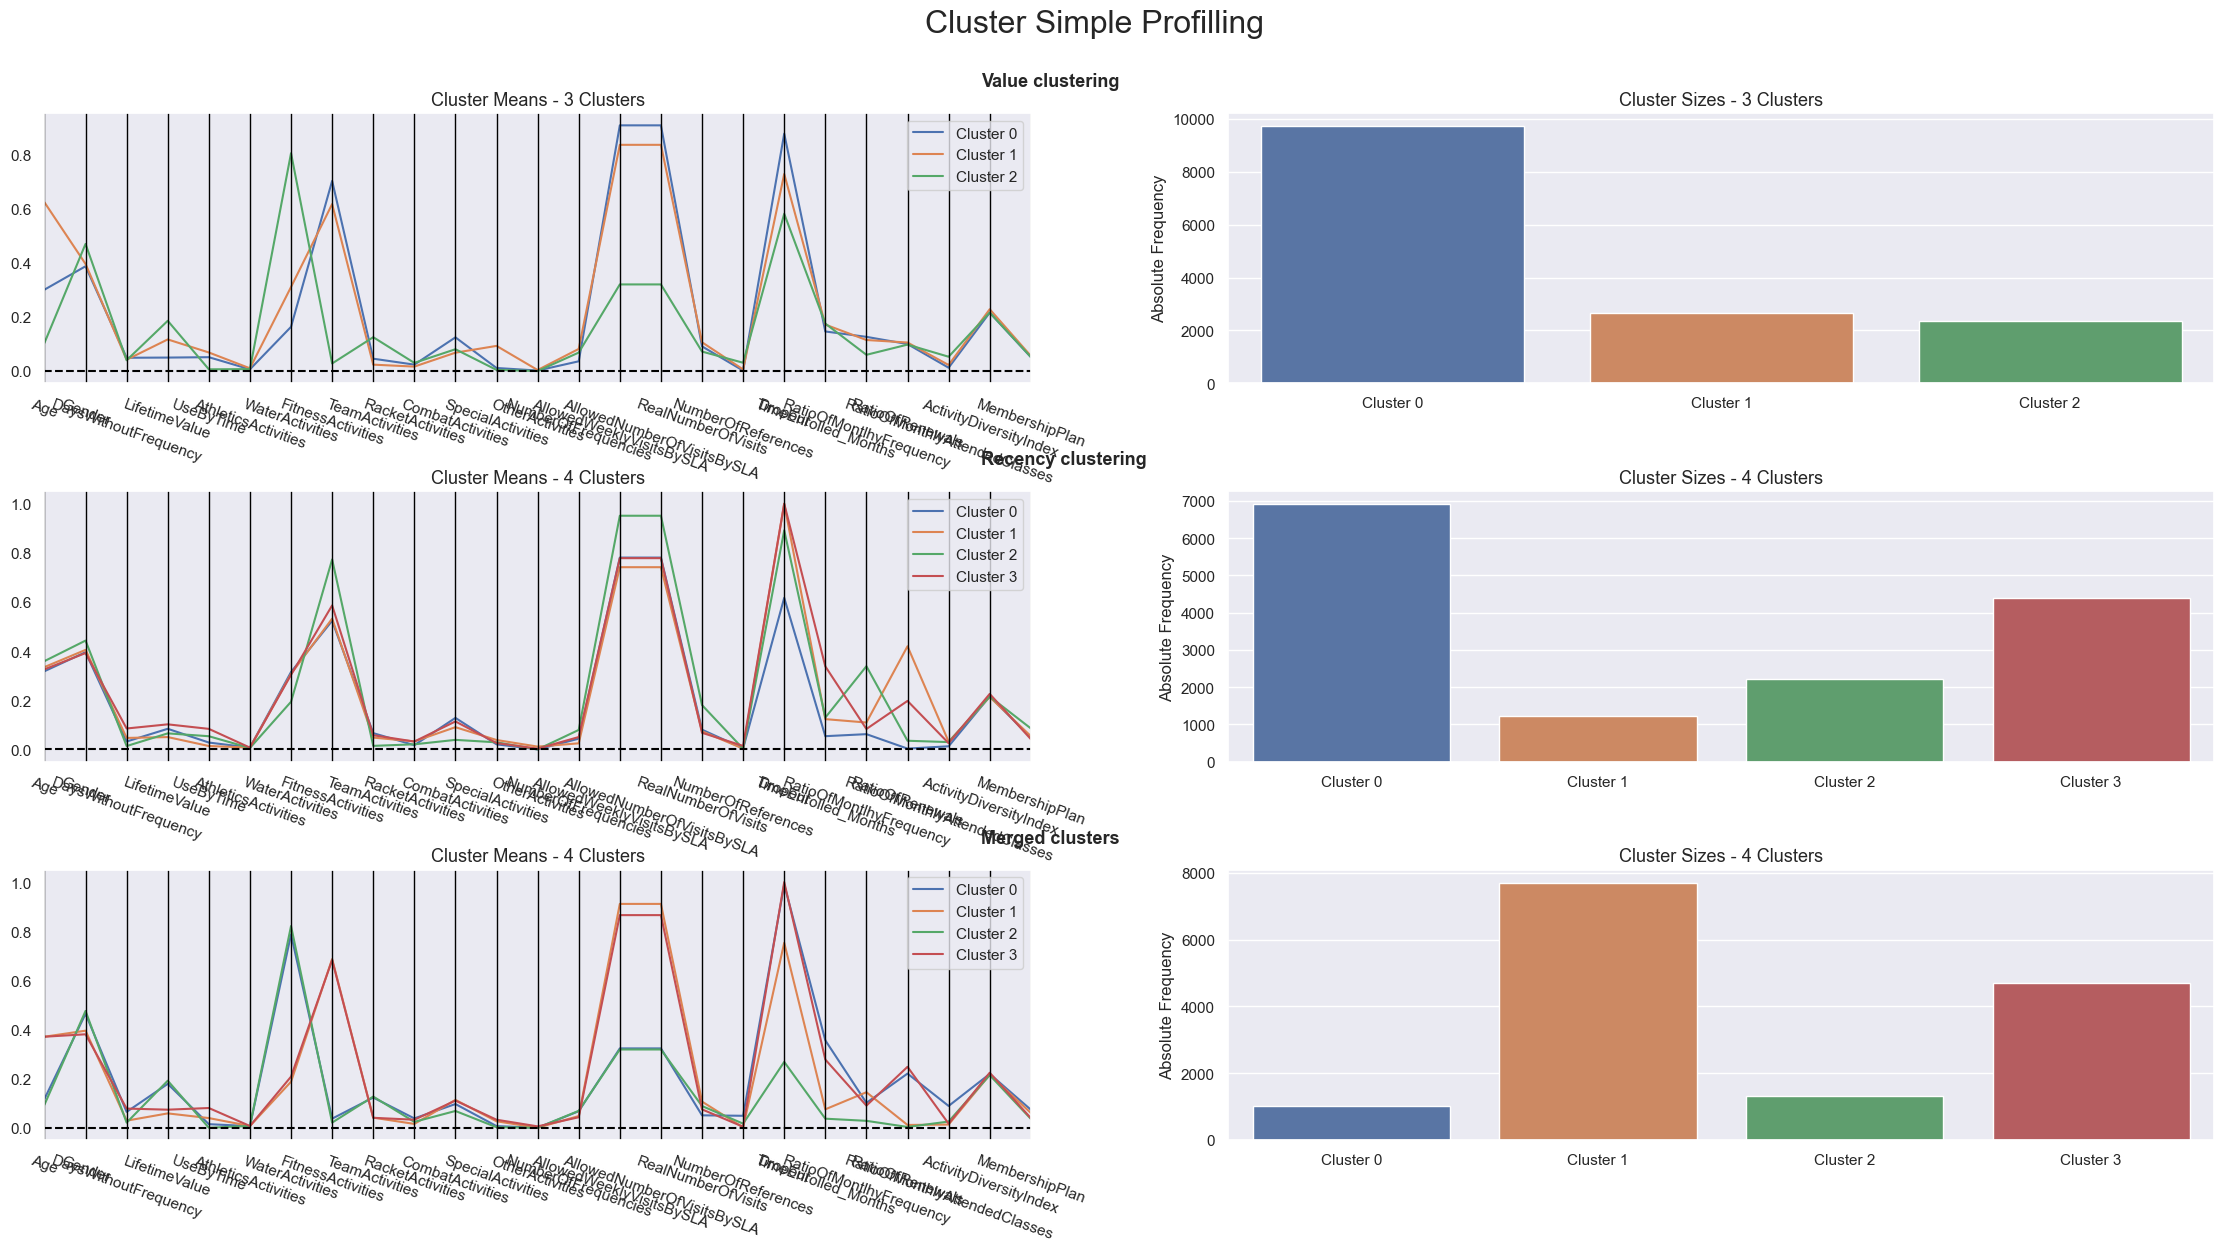

In [230]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df, 
    label_columns = ['Value_labels', 'Recency_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Value clustering", "Recency clustering", "Merged clusters"]
)

In [231]:
df_ca_analysis.columns

Index(['Age', 'Gender', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfReferences', 'Dropout',
       'TimeEnrolled_Months', 'RatioOfMontlhyFrequency', 'RatioOfRenewals',
       'RatioOfMonthlyAttendedClasses', 'ActivityDiversityIndex',
       'MembershipPlan', 'Value_labels', 'Recency_labels', 'merged_labels'],
      dtype='object')

In [232]:
df_ca_analysis.groupby('Value_labels').mean()

Age    Gender  DaysWithoutFrequency  LifetimeValue  \
Value_labels                                                             
0             23.790182  0.387799             85.790490     175.617634   
1             49.336712  0.396396             73.141892     410.562643   
2              8.210616  0.470488             69.725265     651.651890   

              UseByTime  AthleticsActivities  WaterActivities  \
Value_labels                                                    
0              0.051248             0.006367         0.163603   
1              0.068694             0.010135         0.311186   
2              0.006369             0.007219         0.806369   

              FitnessActivities  TeamActivities  RacketActivities  ...  \
Value_labels                                                       ...   
0                      0.703708        0.045702          0.023724  ...   
1                      0.617868        0.023649          0.016517  ...   
2                      0.028025        0.125265          0.030149  ...   

              NumberOfReferences   Dropout  TimeEnrolled_Months  \
Value_labels                                                      
0                       0.004519  0.878607             9.226045   
1                       0.017643  0.729354            10.834084   
2                       0.092144  0.582166            11.067941   

              RatioOfMontlhyFrequency  RatioOfRenewals  \
Value_labels                                             
0                            2.847401         0.049946   
1                             2.58472         0.052782   
2                            1.351493         0.048908   

              RatioOfMonthlyAttendedClasses  ActivityDiversityIndex  \
Value_labels                                                          
0                                  0.221780                1.080928   
1                                  0.401475                1.144144   
2                                  0.953526                1.081953   

              MembershipPlan  Recency_labels  merged_labels  
Value_labels                                                 
0                  21.086132        1.323611       1.759988  
1                  22.904267        1.260886       1.750000  
2                  21.449295        1.111253       1.130361  

[3 rows x 27 columns]

In [233]:
df_ca_analysis.groupby('Recency_labels').mean()
engagement_diversity_features = [
    'NumberOfReferences',
    'RatioOfRenewals',
    'RatioOfMontlhyFrequency',
    'RatioOfMonthlyAttendedClasses',
    'MembershipPlan'
    
]

In [234]:
df_act = df[['merged_labels','AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities' ]].groupby(['merged_labels']).sum()
df_act

AthleticsActivities  WaterActivities  FitnessActivities  \
merged_labels                                                            
0                              7.0            806.0               38.0   
1                             55.0           1444.0             5290.0   
2                             10.0           1093.0               28.0   
3                             34.0            978.0             3208.0   

               TeamActivities  RacketActivities  CombatActivities  \
merged_labels                                                       
0                       126.0              39.0              99.0   
1                       317.0             121.0             875.0   
2                       169.0              32.0              91.0   
3                       191.0             154.0             520.0   

               SpecialActivities  OtherActivities  
merged_labels                                      
0                            7.0              0.0  
1                          204.0              1.0  
2                            3.0              0.0  
3                          154.0             27.0

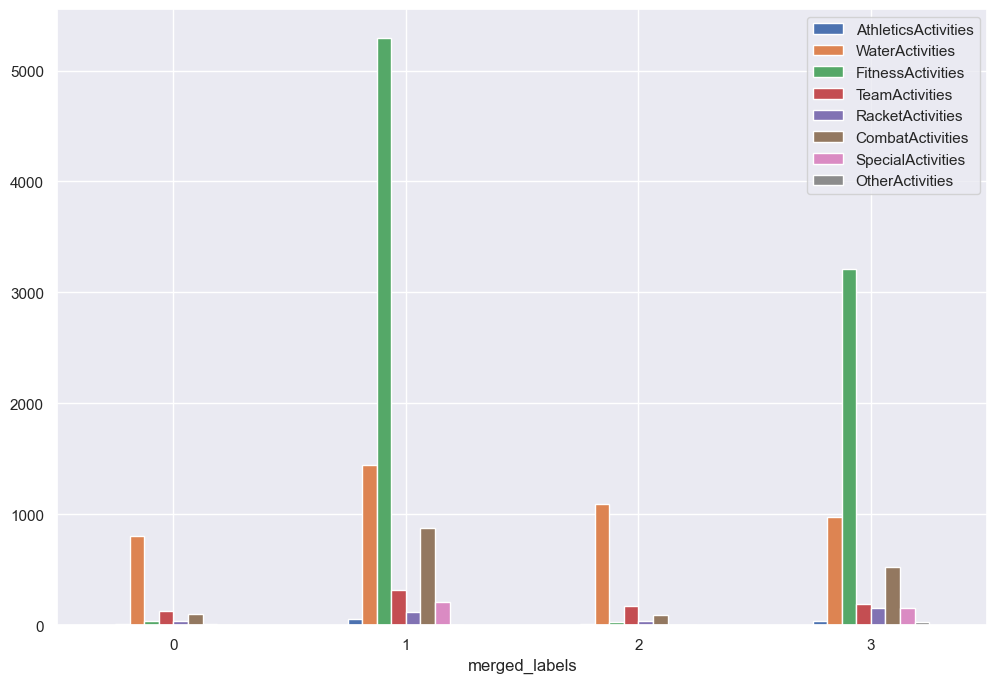

In [235]:
fig, ax = plt.subplots(figsize=(12,8))
df_act.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.show()

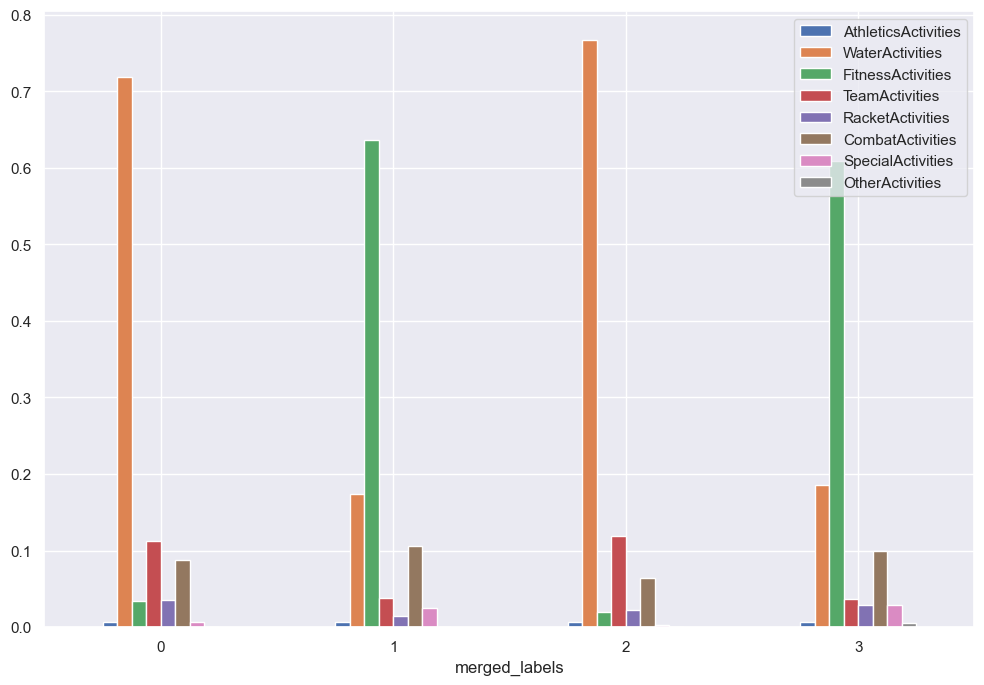

In [236]:
fig, ax = plt.subplots(figsize=(12,8))

df_act_pct = df_act.apply(lambda col: col/df_act.sum(axis=1))
df_act_pct.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)

plt.show()

In [237]:
df_act_pct

AthleticsActivities  WaterActivities  FitnessActivities  \
merged_labels                                                            
0                         0.006239         0.718360           0.033868   
1                         0.006621         0.173829           0.636812   
2                         0.007013         0.766480           0.019635   
3                         0.006457         0.185720           0.609191   

               TeamActivities  RacketActivities  CombatActivities  \
merged_labels                                                       
0                    0.112299          0.034759          0.088235   
1                    0.038161          0.014566          0.105333   
2                    0.118513          0.022440          0.063815   
3                    0.036270          0.029244          0.098747   

               SpecialActivities  OtherActivities  
merged_labels                                      
0                       0.006239         0.000000  
1                       0.024558         0.000120  
2                       0.002104         0.000000  
3                       0.029244         0.005127

In [238]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df)

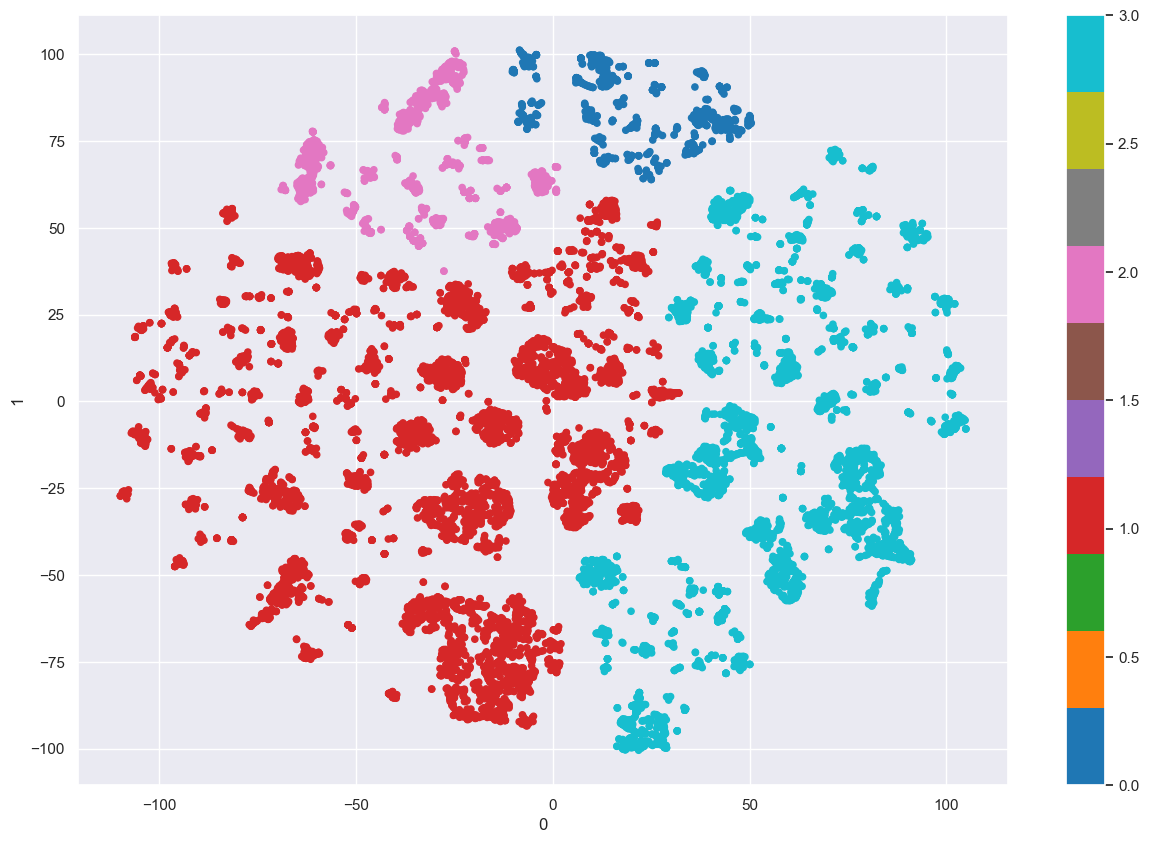

In [239]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## 14. Feature Importance

In [240]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  float64
 1   LifetimeValue                  14756 non-null  float64
 2   ActivityDiversityIndex         14756 non-null  float64
 3   NumberOfReferences             14756 non-null  float64
 4   RatioOfRenewals                14756 non-null  float64
 5   RatioOfMontlhyFrequency        14756 non-null  float64
 6   RatioOfMonthlyAttendedClasses  14756 non-null  float64
 7   MembershipPlan                 14756 non-null  float64
 8   Value_labels                   14756 non-null  int32  
 9   Recency_labels                 14756 non-null  int32  
 10  merged_labels                  14756 non-null  int64  
dtypes: float64(8), int32(2), int64(1)
memory usage: 1.1 MB


In [241]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [242]:
df_2.drop(['Value_labels', 'Recency_labels'], axis=1, inplace=True)
r2_variables(df_2, 'merged_labels').drop('merged_labels')

Age                              0.310402
LifetimeValue                    0.213847
ActivityDiversityIndex           0.003774
NumberOfReferences               0.051327
RatioOfRenewals                  0.665443
RatioOfMontlhyFrequency          0.088746
RatioOfMonthlyAttendedClasses    0.118101
MembershipPlan                   0.082889
dtype: float64

### Using a Decision Tree
We get the normalized total reduction of the criterion (gini or entropy) brought by that feature (also known as Gini importance).

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14756 entries, 0 to 14755
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            14756 non-null  float64
 1   Gender                         14756 non-null  float64
 2   DaysWithoutFrequency           14756 non-null  float64
 3   LifetimeValue                  14756 non-null  float64
 4   UseByTime                      14756 non-null  float64
 5   AthleticsActivities            14756 non-null  float64
 6   WaterActivities                14756 non-null  float64
 7   FitnessActivities              14756 non-null  float64
 8   TeamActivities                 14756 non-null  float64
 9   RacketActivities               14756 non-null  float64
 10  CombatActivities               14756 non-null  float64
 11  SpecialActivities              14756 non-null  float64
 12  OtherActivities                14756 non-null 

In [244]:
# Preparing the data
X = df.drop(columns=['Value_labels','Recency_labels','merged_labels'])
y = df.merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 95.16% of the customers correctly


In [245]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

Age                              0.373416
Gender                           0.000000
DaysWithoutFrequency             0.000000
LifetimeValue                    0.006779
UseByTime                        0.000000
AthleticsActivities              0.000000
WaterActivities                  0.000000
FitnessActivities                0.000000
TeamActivities                   0.000000
RacketActivities                 0.000000
CombatActivities                 0.000000
SpecialActivities                0.000000
OtherActivities                  0.000000
NumberOfFrequencies              0.000000
AllowedWeeklyVisitsBySLA         0.000000
AllowedNumberOfVisitsBySLA       0.000000
RealNumberOfVisits               0.000000
NumberOfReferences               0.000000
Dropout                          0.000000
TimeEnrolled_Months              0.000000
RatioOfMontlhyFrequency          0.061245
RatioOfRenewals                  0.558559
RatioOfMonthlyAttendedClasses    0.000000
ActivityDiversityIndex           0

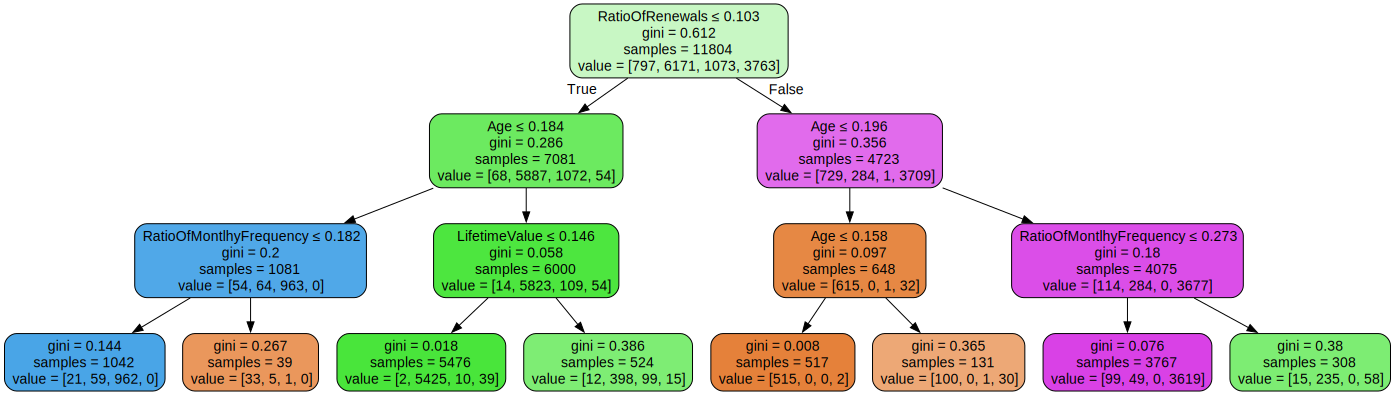

In [246]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)
g = graphviz.Source(dot_data)

g